In [23]:
import csv
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from utils import group_entropies_by_dialogue_id, group_sbs_data_by_dialogue_id

## Entropy Ideal dialogues GPT3

In [24]:
five_samples_data_path = "./data/generation/8_mcrae/sbs_entropy_k_five_cleaned.csv"
ten_samples_data_path = "./data/generation/8_mcrae/sbs_entropy_k_ten_cleaned.csv"
twenty_samples_data_path = "./data/generation/8_mcrae/sbs_entropy_k_twenty_cleaned.csv"
five_gpt4o_samples_data_path = "./data/generation/8_mcrae/sbs_entropy_k_five_gpt4o_apocalypse_cleaned.csv"
ten_gpt4o_samples_data_path = "./data/generation/8_mcrae/sbs_entropy_k_ten_gpt4o_apocalypse_cleaned.csv"

five_rf = open(five_samples_data_path, 'r', newline='')
ten_rf = open(ten_samples_data_path, 'r', newline='')
twenty_rf = open(twenty_samples_data_path, 'r', newline='')
five_gpt4o_rf = open(five_gpt4o_samples_data_path, 'r', newline='')
ten_gpt4o_rf = open(ten_gpt4o_samples_data_path, 'r', newline='')

five_reader = csv.DictReader(five_rf, delimiter=",")
ten_reader = csv.DictReader(ten_rf, delimiter=",")
twenty_reader = csv.DictReader(twenty_rf, delimiter=",")
five_gpt4o_reader = csv.DictReader(five_gpt4o_rf, delimiter=",")
ten_gpt4o_reader = csv.DictReader(ten_gpt4o_rf, delimiter=",")

five_entropies, max_dialogue_length = group_entropies_by_dialogue_id(five_reader)
ten_entropies, _ = group_entropies_by_dialogue_id(ten_reader)
twenty_entropies, _ = group_entropies_by_dialogue_id(twenty_reader)
five_gpt4o_entropies, _ = group_entropies_by_dialogue_id(five_gpt4o_reader)
ten_gpt4o_entropies, _ = group_entropies_by_dialogue_id(ten_gpt4o_reader)

five_rf.close()
ten_rf.close()
twenty_rf.close()
five_gpt4o_rf.close()
ten_gpt4o_rf.close()

In [25]:
five_samples_sbs_data_path = "./data/generation/8_mcrae/dialogues_sbs_k_five_distr_ver2.csv"
ten_samples_sbs_data_path = "./data/generation/8_mcrae/dialogues_sbs_k_ten_distr_ver2.csv"
twenty_samples_sbs_data_path = "./data/generation/8_mcrae/dialogues_sbs_k_twenty_distr.csv"
five_gpt4o_samples_sbs_data_path = "./data/generation/8_mcrae/dialogues_sbs_k_five_gpt4o.csv"
ten_gpt4o_samples_sbs_data_path = "./data/generation/8_mcrae/dialogues_sbs_k_ten_gpt4o.csv"

# grouping row together by dialogue id

five_rf = open(five_samples_sbs_data_path, 'r', newline='')
five_reader = csv.DictReader(five_rf, delimiter=",")
five_data = group_sbs_data_by_dialogue_id(five_reader)

ten_rf = open(ten_samples_sbs_data_path, 'r', newline='')
ten_reader = csv.DictReader(ten_rf, delimiter=",")
ten_data = group_sbs_data_by_dialogue_id(ten_reader)

twenty_rf = open(twenty_samples_sbs_data_path, 'r', newline='')
twenty_reader = csv.DictReader(twenty_rf, delimiter=",")
twenty_data = group_sbs_data_by_dialogue_id(twenty_reader)

five_gpt4o_rf = open(five_gpt4o_samples_sbs_data_path, 'r', newline='')
five_gpt4o_reader = csv.DictReader(five_gpt4o_rf, delimiter=",")
five_gpt4o_data = group_sbs_data_by_dialogue_id(five_gpt4o_reader)

ten_gpt4o_rf = open(ten_gpt4o_samples_sbs_data_path, 'r', newline='')
ten_gpt4o_reader = csv.DictReader(ten_gpt4o_rf, delimiter=",")
ten_gpt4o_data = group_sbs_data_by_dialogue_id(ten_gpt4o_reader)
# print(ten_gpt4o_data)

In [26]:
for dialogue_id, dialogue in enumerate(five_data):
    intra_dialogues = dialogue["intra_dialogues"]
    num_keys = 8
    for i in range(0, len(dialogue["intra_dialogues"])):
        # print((intra_dialogues[i]["p_distribuition"]).keys())
        num_keys = len((intra_dialogues[i]["p_distribuition"]).keys()) 
        print(len(dialogue["intra_dialogues"]))
        uniform_distribution = list({key: 1.0 / num_keys for key in (intra_dialogues[i]["p_distribuition"]).keys()}.values())
        print(uniform_distribution, sp.stats.entropy(uniform_distribution, base=2))


6
[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125] 3.0
6
[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125] 3.0
6
[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125] 3.0
6
[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125] 3.0
6
[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125] 3.0
6
[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125] 3.0
4
[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125] 3.0
4
[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125] 3.0
4
[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125] 3.0
4
[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125] 3.0
11
[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125] 3.0
11
[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125] 3.0
11
[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125] 3.0
11
[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125] 3.0
11
[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125] 3.0
11
[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.12

In [27]:
entropies_optimal = {'dialogue_id': [], 'intra_dialogue_id': [], 'entropy_op': []}
for dialogue_id, dialogue in enumerate(five_data):
    intra_dialogues = dialogue["intra_dialogues"]
    total_steps = len(intra_dialogues)
    initial_num_candidates = 8
    num_candidates = initial_num_candidates
    for i in range(total_steps):
        # num_candidates = max(1, initial_num_candidates - i * (initial_num_candidates - 1) // (total_steps - 1))
        num_candidates = max(1, int(num_candidates / 2))
        
        optimal_distribution = np.zeros(8)
        for j in range(0, num_candidates):
            optimal_distribution[j] = 1 / num_keys
        entropy_opt = sp.stats.entropy(optimal_distribution, base=2)
        entropies_optimal['dialogue_id'].append(dialogue_id)
        entropies_optimal['intra_dialogue_id'].append(i)
        entropies_optimal['entropy_op'].append(entropy_opt)
        print(f"Step {i}, Entropy: {entropy_opt}, num_candidate: {num_candidates}")
        
    print()
       

Step 0, Entropy: 2.0, num_candidate: 4
Step 1, Entropy: 1.0, num_candidate: 2
Step 2, Entropy: 0.0, num_candidate: 1
Step 3, Entropy: 0.0, num_candidate: 1
Step 4, Entropy: 0.0, num_candidate: 1
Step 5, Entropy: 0.0, num_candidate: 1

Step 0, Entropy: 2.0, num_candidate: 4
Step 1, Entropy: 1.0, num_candidate: 2
Step 2, Entropy: 0.0, num_candidate: 1
Step 3, Entropy: 0.0, num_candidate: 1

Step 0, Entropy: 2.0, num_candidate: 4
Step 1, Entropy: 1.0, num_candidate: 2
Step 2, Entropy: 0.0, num_candidate: 1
Step 3, Entropy: 0.0, num_candidate: 1
Step 4, Entropy: 0.0, num_candidate: 1
Step 5, Entropy: 0.0, num_candidate: 1
Step 6, Entropy: 0.0, num_candidate: 1
Step 7, Entropy: 0.0, num_candidate: 1
Step 8, Entropy: 0.0, num_candidate: 1
Step 9, Entropy: 0.0, num_candidate: 1
Step 10, Entropy: 0.0, num_candidate: 1

Step 0, Entropy: 2.0, num_candidate: 4
Step 1, Entropy: 1.0, num_candidate: 2
Step 2, Entropy: 0.0, num_candidate: 1
Step 3, Entropy: 0.0, num_candidate: 1

Step 0, Entropy: 2.0

In [28]:
current_dialogue_id = -1
max_length = 0
entropies_ideal = {}

for i in range(len(entropies_optimal['dialogue_id'])):
    dialogue_id = entropies_optimal['dialogue_id'][i]
    if(dialogue_id != ''):
      dialogue_id = int(dialogue_id)
      intra_dialogue_id = int(entropies_optimal['intra_dialogue_id'][i])

      if(dialogue_id != current_dialogue_id):
        entropies_ideal[dialogue_id] = []
        current_dialogue_id = dialogue_id
      
      entropies_ideal[dialogue_id].append(entropies_optimal['entropy_op'][i])
      
      if(intra_dialogue_id > max_length):
        max_length = intra_dialogue_id
print(entropies_ideal)
print(max_length+1)

{0: [2.0, 1.0, 0.0, 0.0, 0.0, 0.0], 1: [2.0, 1.0, 0.0, 0.0], 2: [2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 3: [2.0, 1.0, 0.0, 0.0], 4: [2.0, 1.0, 0.0, 0.0, 0.0], 5: [2.0, 1.0, 0.0, 0.0], 6: [2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 7: [2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 8: [2.0, 1.0, 0.0, 0.0, 0.0], 9: [2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 10: [2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 11: [2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 12: [2.0, 1.0, 0.0, 0.0, 0.0, 0.0], 13: [2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 14: [2.0, 1.0, 0.0, 0.0, 0.0], 15: [2.0, 1.0, 0.0, 0.0, 0.0, 0.0], 16: [2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 17: [2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 18: [2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 19: [2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 20: [2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 21: [2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 22: [2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 23: [2

In [29]:
def entropy_from_end(entropies_val):   
    entropies_op_by_distances = []

    for _ in range(0, max_dialogue_length, 1):
        entropies_op_by_distances.append([])

    for dialogue_entropy in entropies_val.values():
        dialogue_length = len(dialogue_entropy)
        for step_index, step_entropy in enumerate(dialogue_entropy):
            distance_from_end = dialogue_length - step_index - 1
            entropies_op_by_distances[distance_from_end].append(step_entropy)

    dic_entropies_op_by_distances_end = {}
    for (distance, entropies_by_distance) in enumerate(entropies_op_by_distances):
        std = np.std(entropies_by_distance)
        mean = np.mean(entropies_by_distance)
        dic_entropies_op_by_distances_end[distance+1] = mean
        print(distance, std, mean)

    return dic_entropies_op_by_distances_end
dic_entropies_op_by_distances_end = entropy_from_end(entropies_ideal)

0 0.0 0.0
1 0.18246560765962697 0.034482758620689655
2 0.4516524759629539 0.16091954022988506
3 0.6424160744396211 0.3333333333333333
4 0.7503461804938555 0.4473684210526316
5 0.7300403991389791 0.671875
6 0.9327526118120761 0.9814814814814815
7 0.818617905835453 0.6774193548387096
8 0.8779711460710616 0.75
9 0.7848037684780196 0.8235294117647058
10 0.9166442529086912 1.0769230769230769
11 0.8329931278350429 0.8571428571428571
12 0.8944271909999159 1.0
13 0.9428090415820634 0.6666666666666666
14 0.5 0.5
15 0.5 1.5
16 0.0 2.0


In [30]:
def get_mean(reader, key):
    mean = []
    for row in reader:
        mean.append(float(row[key]))
    return mean

In [31]:
# plot entropy mean by distance from end
k_five_statistics_end_gpt4o = "./data/generation/8_mcrae/entropy_k_five_gpt4o_statistics_from_dialogue_end_apocalypse_cleaned.csv"
k_ten_statistics_end_gpt4o = "./data/generation/8_mcrae/entropy_k_ten_gpt4o_statistics_from_dialogue_end_apocalypse_cleaned.csv"
k_five_sim_app_gpt4o = "./data/generation/8_mcrae/entropy(gpt3)_k_five_gpt4o_statistics_from_dialogue_end_apocalypse_cleaned.csv"


k_five_statistics_end_gpt3 = "./data/generation/8_mcrae/entropy_k_five_statistics_from_dialogue_end_cleaned.csv"
k_ten_statistics_end_gpt3 = "./data/generation/8_mcrae/entropy_k_ten_statistics_from_dialogue_end_cleaned.csv"
k_twenty_statistics_end_gpt3 = "./data/generation/8_mcrae/entropy_k_twenty_statistics_from_dialogue_end_cleaned.csv"
k_five_sim_app_gpt3 = "./data/generation/8_mcrae/entropy(gpt3)_k_five_gpt3_statistics_from_dialogue_end_apocalypse_cleaned.csv"

five_rf_gpt4o = open(k_five_statistics_end_gpt4o, 'r', newline='')
ten_rf_gpt4o = open(k_ten_statistics_end_gpt4o, 'r', newline='')
five_rf_gpt3 = open(k_five_statistics_end_gpt3, 'r', newline='')
ten_rf_gpt3 = open(k_ten_statistics_end_gpt3, 'r', newline='')
twenty_rf_gpt3 = open(k_twenty_statistics_end_gpt3, 'r', newline='')
five_rf_sim_app_gpt3 = open(k_five_sim_app_gpt3, 'r', newline='')
five_rf_sim_app_gpt4 = open(k_five_sim_app_gpt4o, 'r', newline='')

five_reader_gpt4o = csv.DictReader(five_rf_gpt4o, delimiter=",")
ten_reader_gpt4o = csv.DictReader(ten_rf_gpt4o, delimiter=",")
five_reader_gpt3 = csv.DictReader(five_rf_gpt3, delimiter=",")
ten_reader_gpt3 = csv.DictReader(ten_rf_gpt3, delimiter=",")
twenty_reader_gpt3 = csv.DictReader(twenty_rf_gpt3, delimiter=",")
five_reader_sim_app_gpt3 = csv.DictReader(five_rf_sim_app_gpt3, delimiter=",")
five_reader_sim_app_gpt4 = csv.DictReader(five_rf_sim_app_gpt4, delimiter=",")

five_mean_gpt40 = get_mean(five_reader_gpt4o, key='std')
ten_mean_gpt40 = get_mean(ten_reader_gpt4o, key='mean')
five_mean_gpt3 = get_mean(five_reader_gpt3, key='std')
ten_mean_gpt3 = get_mean(ten_reader_gpt3, key='std')
twenty_mean_gpt3 = get_mean(twenty_reader_gpt3, key='std')
five_mean_sim_app_gpt3 = get_mean(five_reader_sim_app_gpt3, key='mean')
five_mean_sim_app_gpt4 = get_mean(five_reader_sim_app_gpt4, key='mean')

five_rf_gpt4o.close()
ten_rf_gpt4o.close()
five_rf_gpt3.close()
ten_rf_gpt3.close()
twenty_rf_gpt3.close()
five_rf_sim_app_gpt3.close()
five_rf_sim_app_gpt4.close()

{1: 0.0, 2: 0.034482758620689655, 3: 0.16091954022988506, 4: 0.3333333333333333, 5: 0.4473684210526316, 6: 0.671875, 7: 0.9814814814814815, 8: 0.6774193548387096, 9: 0.75, 10: 0.8235294117647058, 11: 1.0769230769230769, 12: 0.8571428571428571, 13: 1.0, 14: 0.6666666666666666, 15: 0.5, 16: 1.5, 17: 2.0}


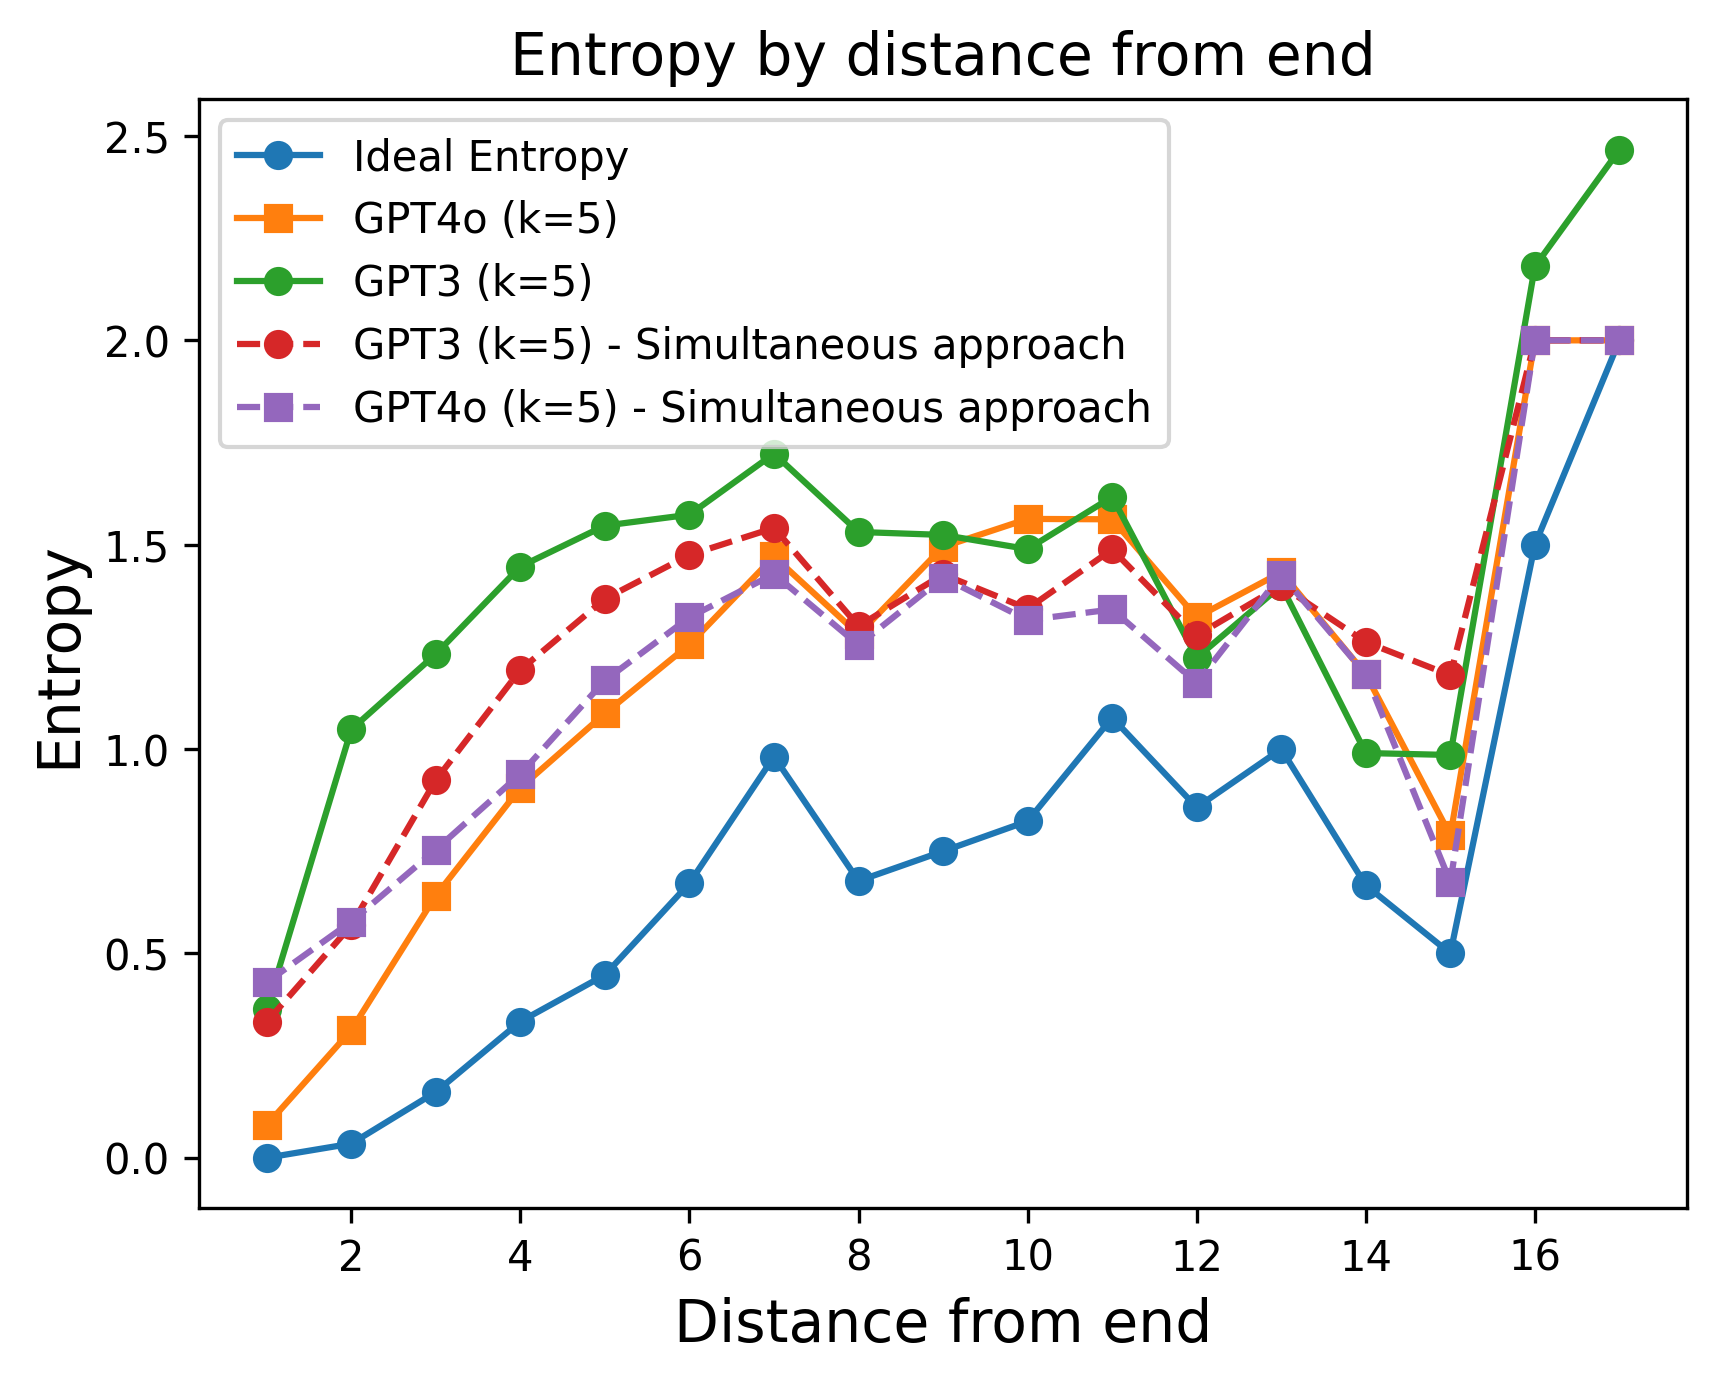

In [32]:
x_values = range(1, len(dic_entropies_op_by_distances_end) + 1)

print(dic_entropies_op_by_distances_end)

plt.figure(dpi=300)
plt.plot(x_values, dic_entropies_op_by_distances_end.values(),  marker = 'o')
plt.plot(x_values, five_mean_gpt40,  marker = 's')
# plt.plot(x_values, ten_mean_gpt40,  marker = 'o')
plt.plot(x_values, five_mean_gpt3,  marker = 'o')
# plt.plot(x_values, ten_mean_gpt3,  marker = 'o')
# plt.plot(x_values, twenty_mean_gpt3,  marker = 'o')
plt.plot(x_values, five_mean_sim_app_gpt3,  marker = 'o', linestyle='dashed')
plt.plot(x_values, five_mean_sim_app_gpt4,  marker = 's', linestyle='dashed')
plt.xlabel('Distance from end', fontsize=14)
plt.ylabel('Entropy', fontsize=14)
plt.title('Entropy by distance from end', fontsize=14)
plt.legend(['Ideal Entropy', 'GPT4o (k=5)', 'GPT3 (k=5)', 'GPT3 (k=5) - Simultaneous approach', 'GPT4o (k=5) - Simultaneous approach'])

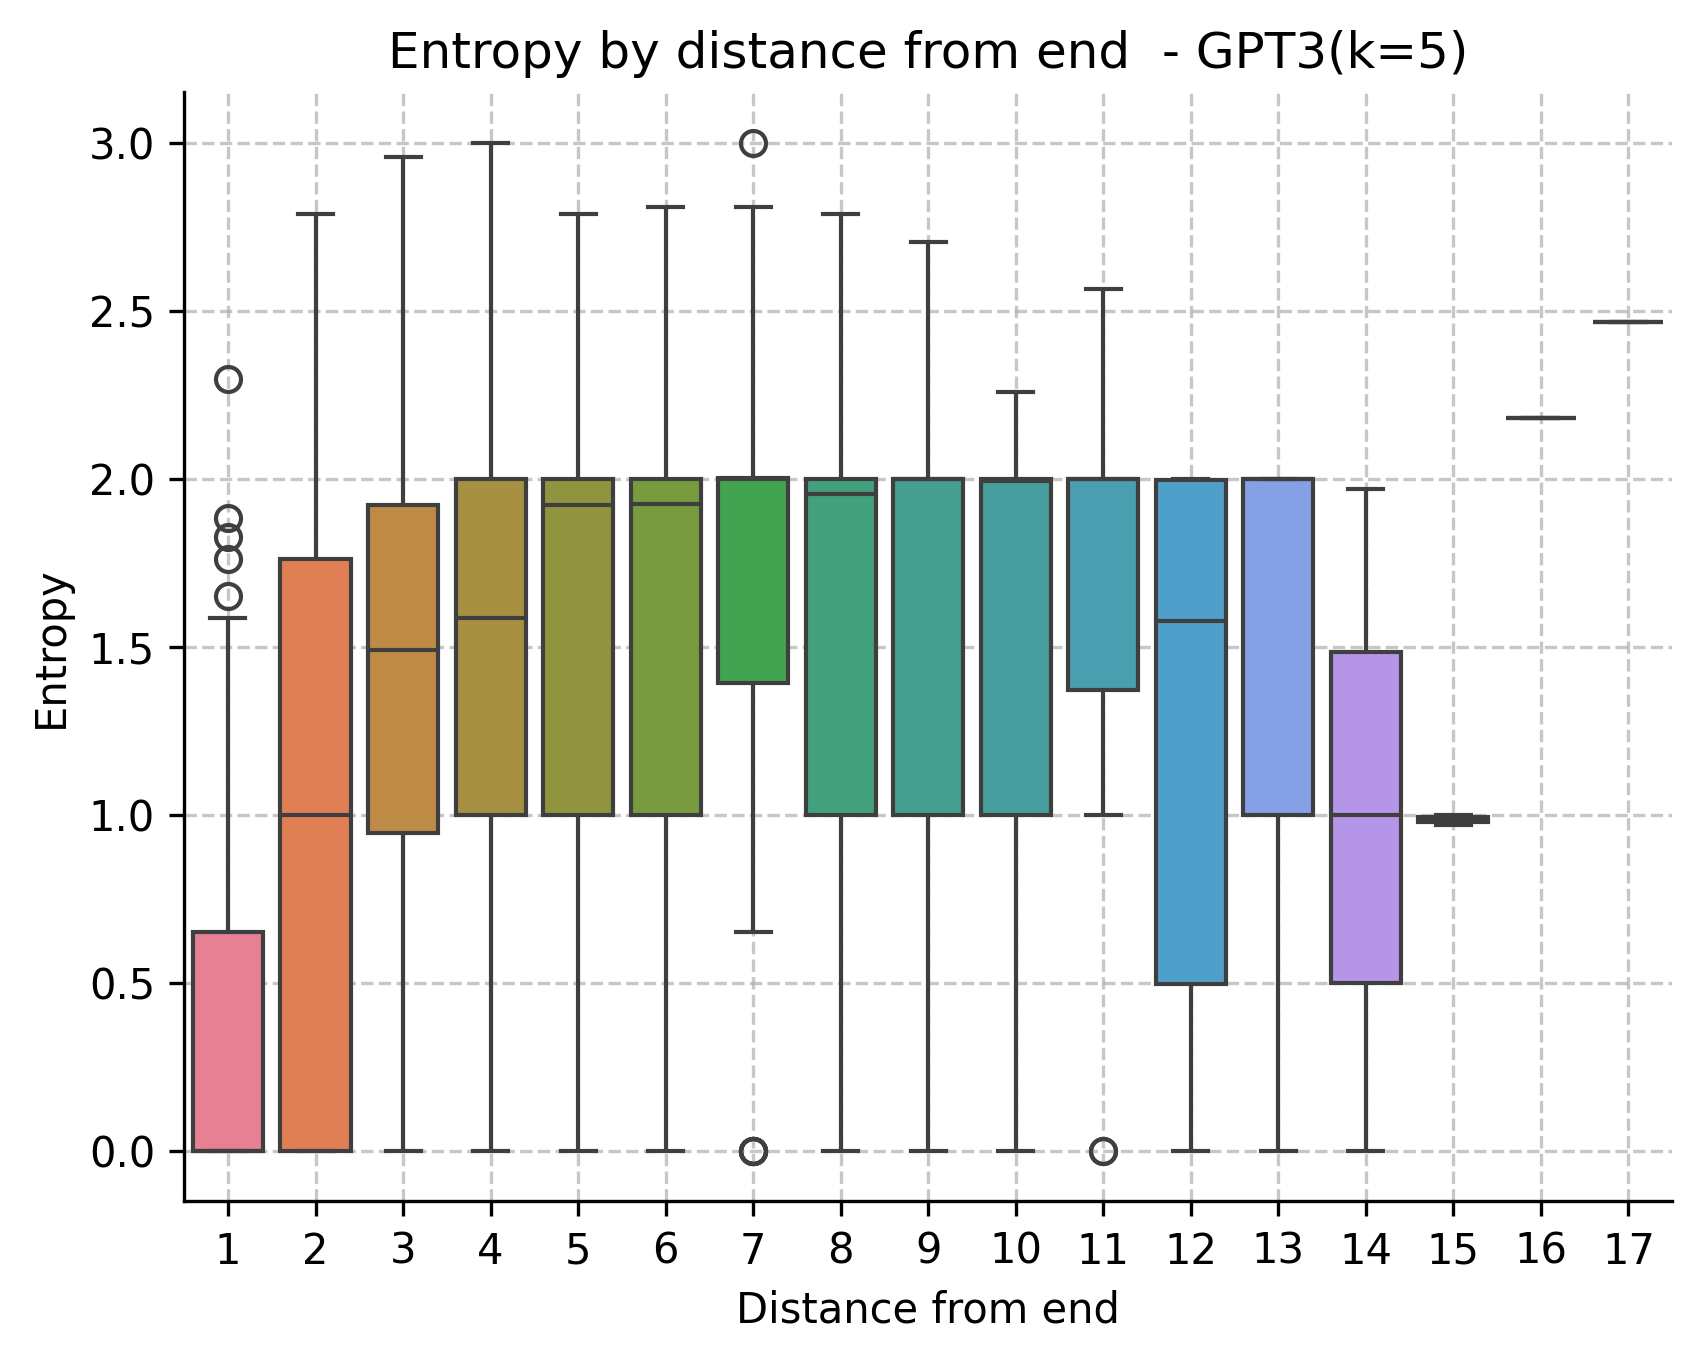

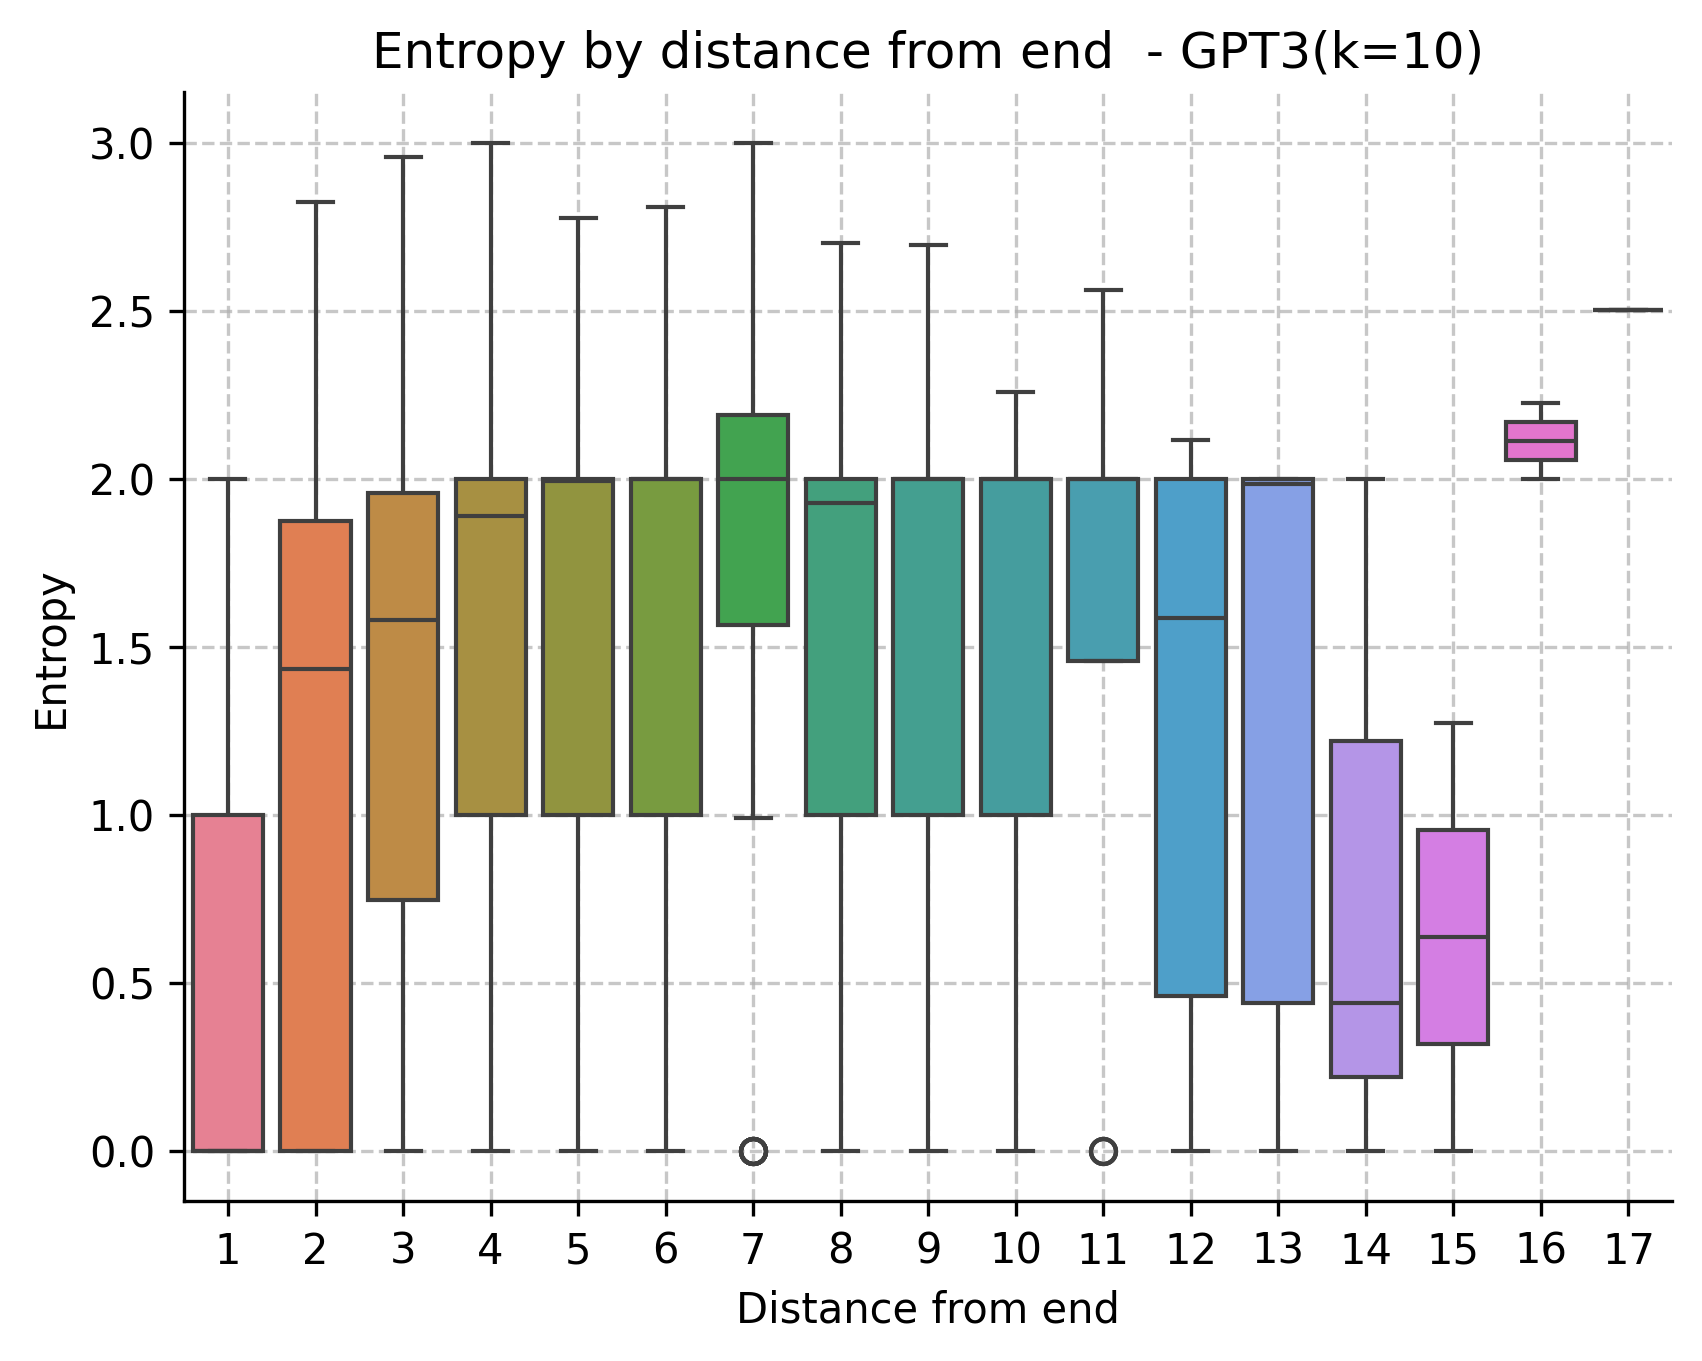

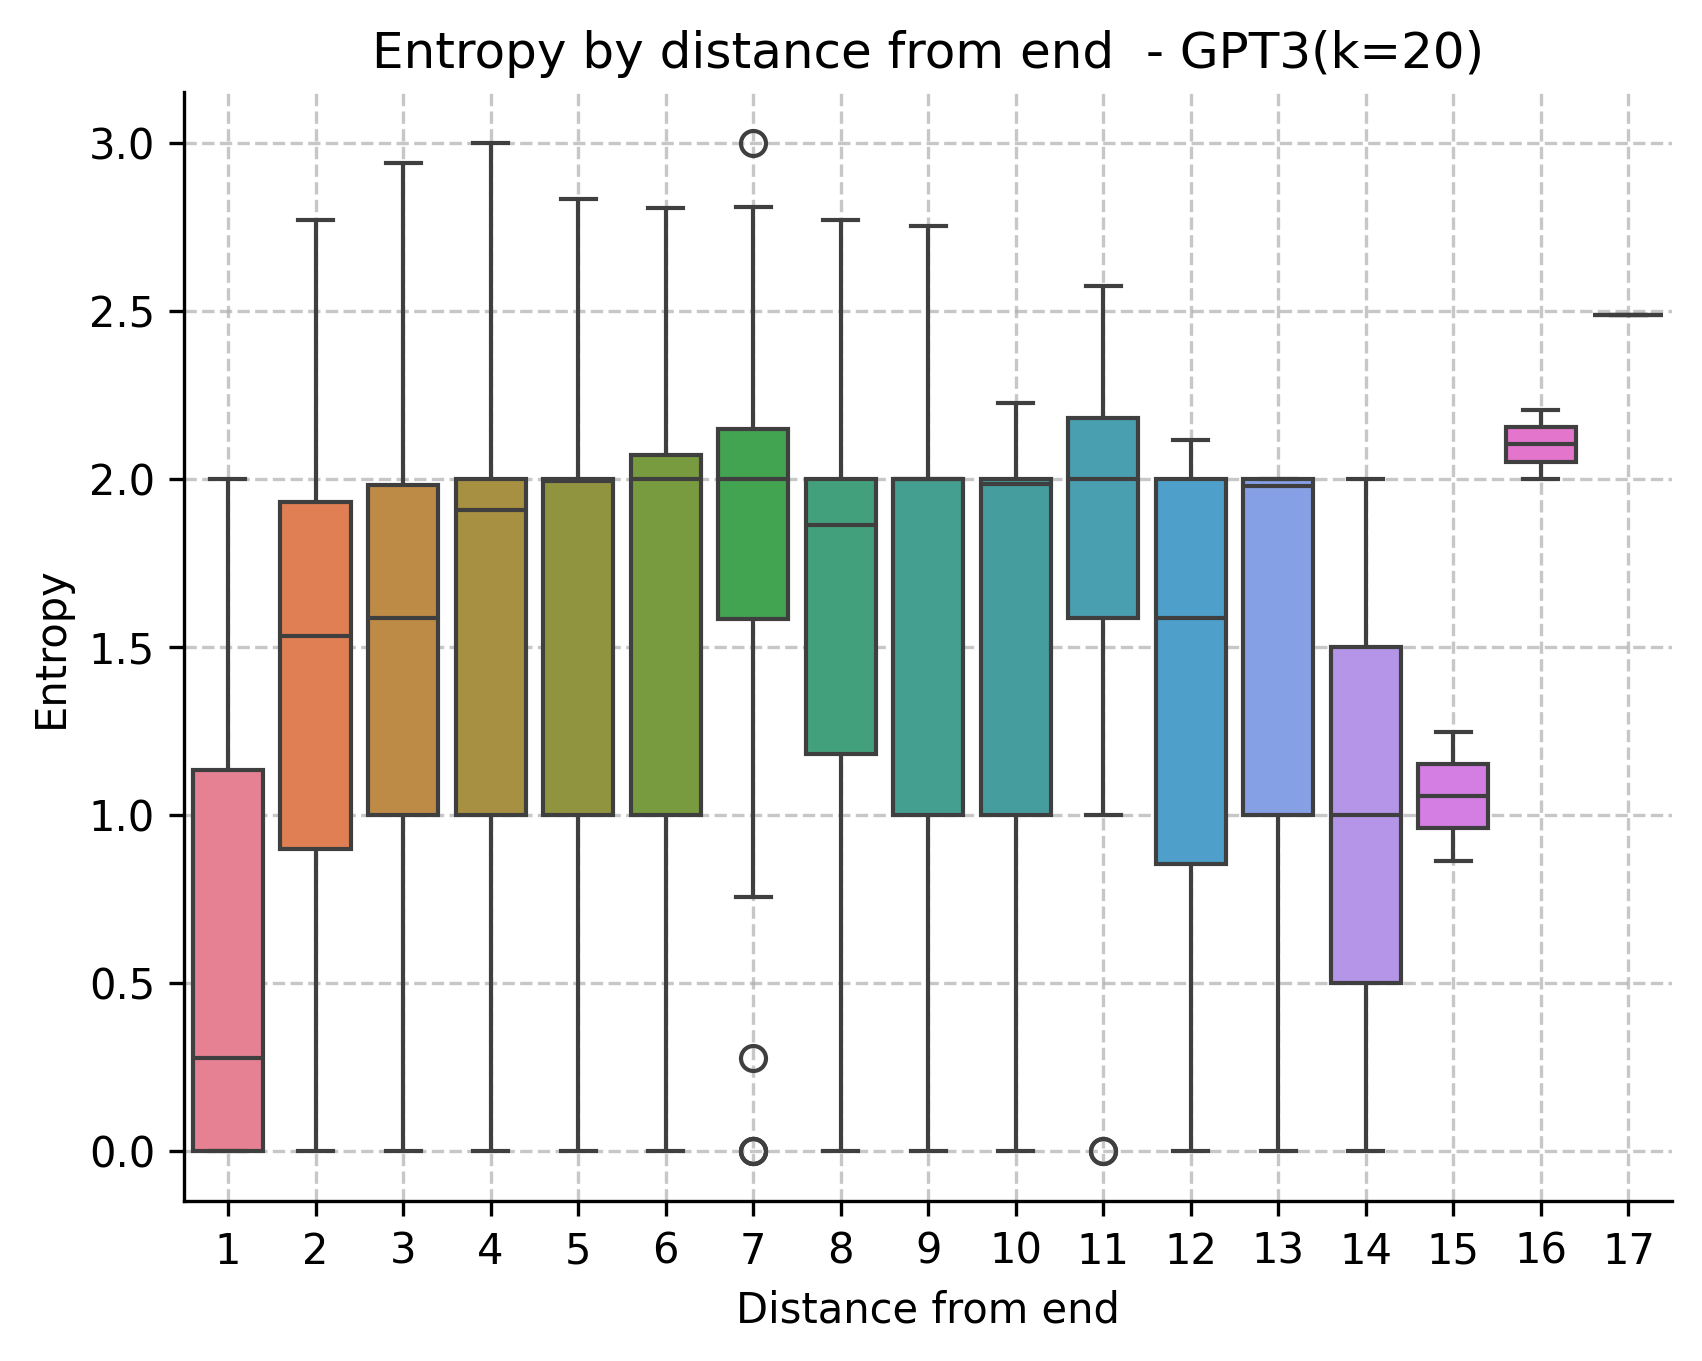

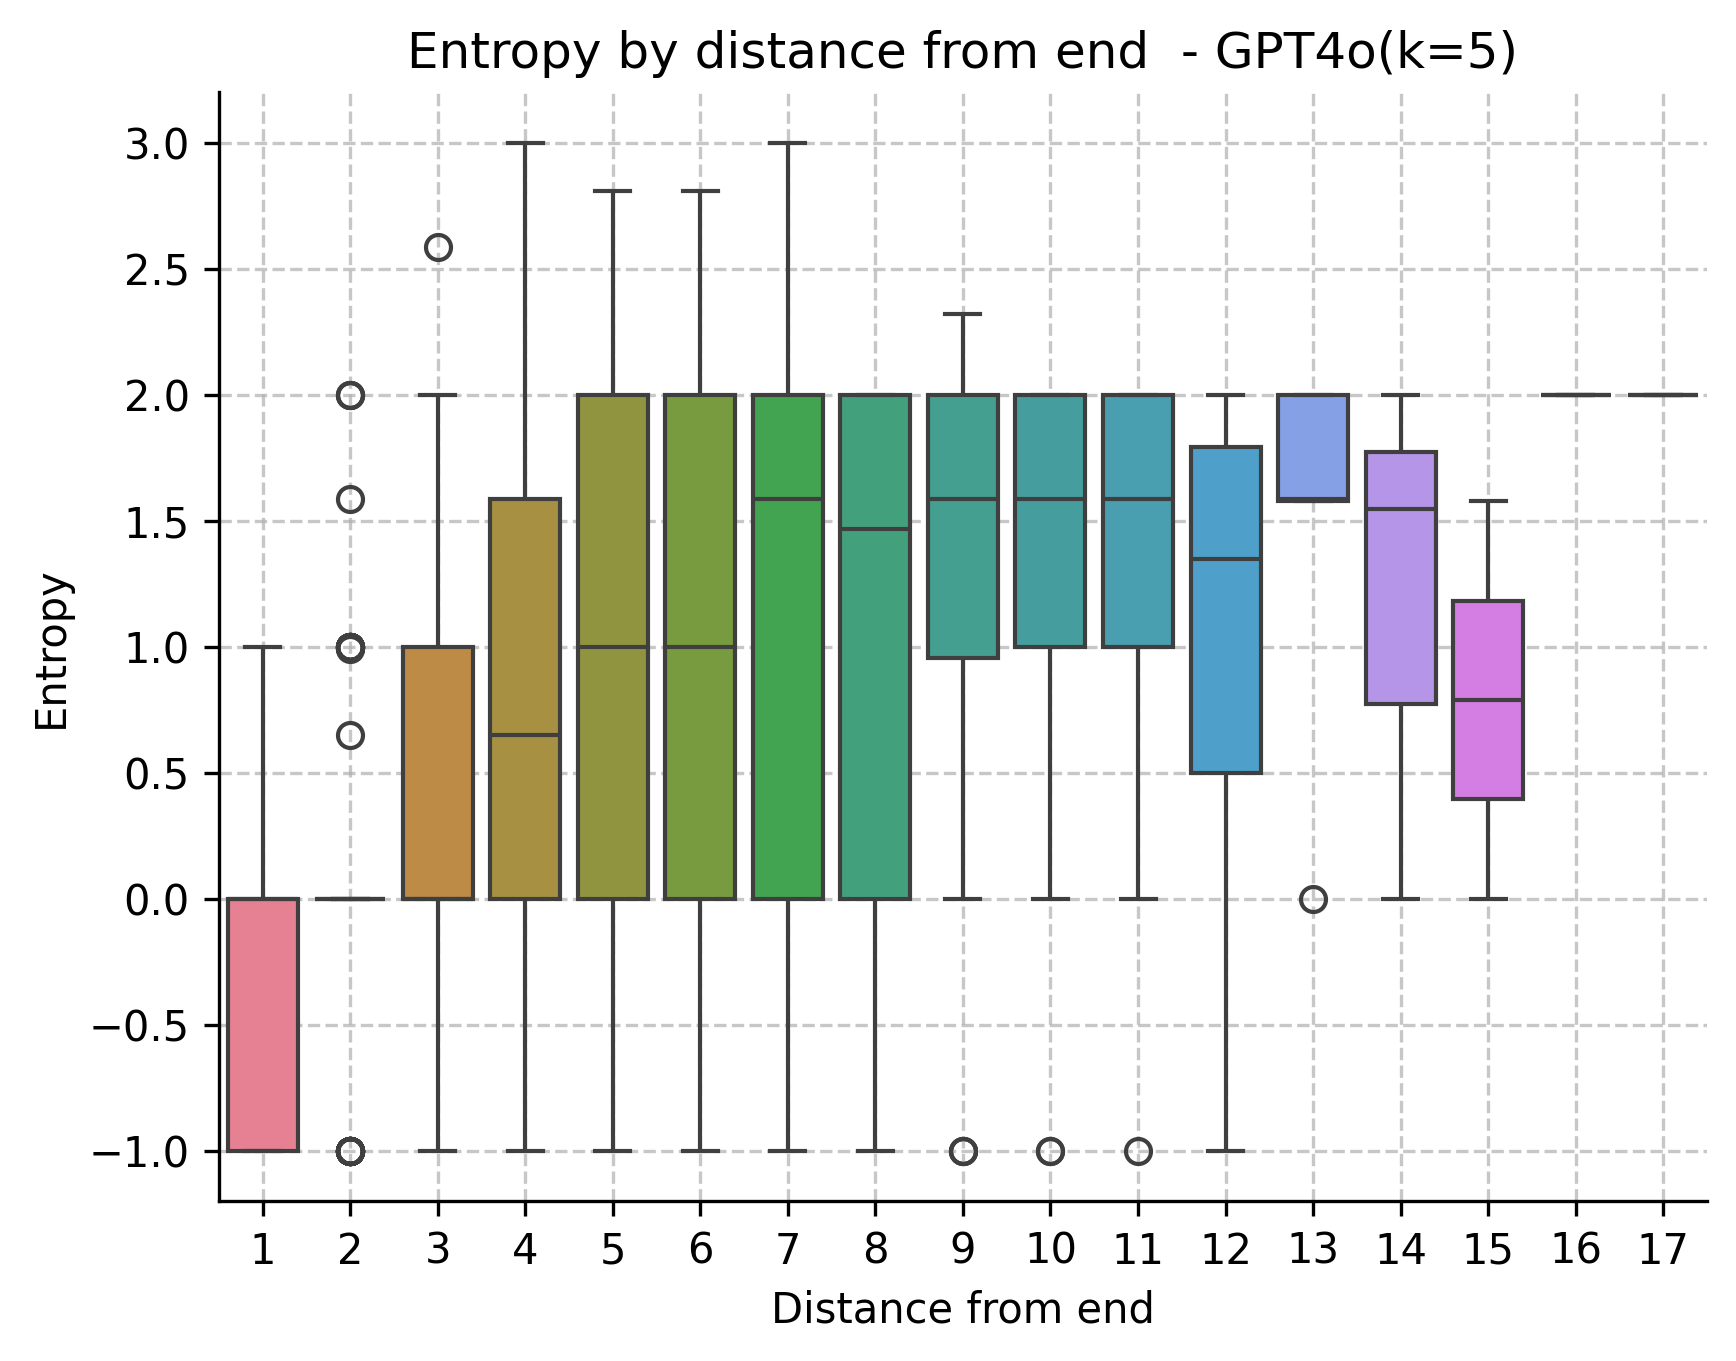

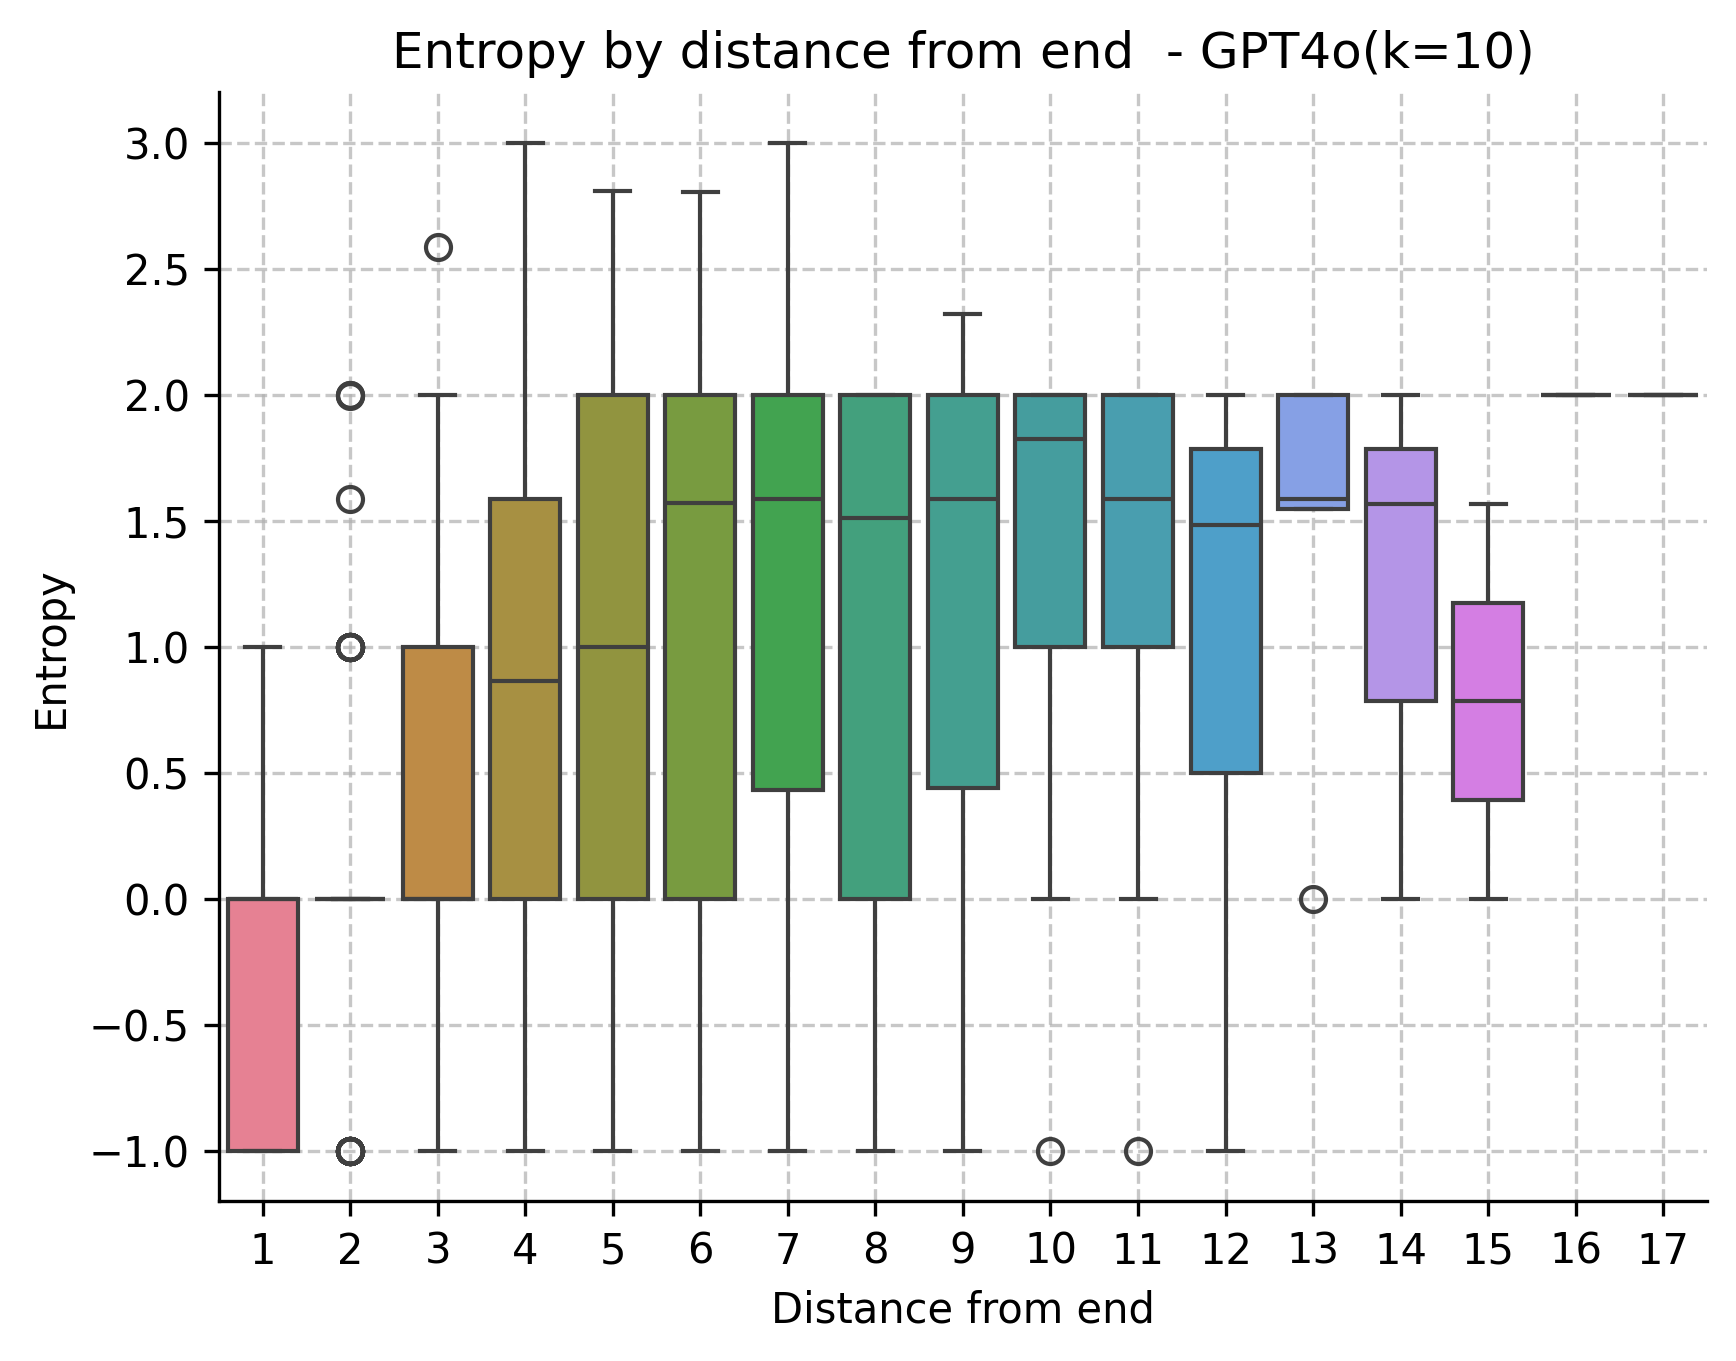

In [33]:
list_entropies = [five_entropies, ten_entropies, twenty_entropies, five_gpt4o_entropies, ten_gpt4o_entropies]
labels = ['GPT3(k=5)', 'GPT3(k=10)', 'GPT3(k=20)', 'GPT4o(k=5)', 'GPT4o(k=10)']

for i, entropies in enumerate(list_entropies):
    entropies_by_distances = []
    for _ in range(0, max_dialogue_length, 1):
        entropies_by_distances.append([])

    for dialogue_entropy in entropies.values():
        dialogue_length = len(dialogue_entropy)
        for step_index, step_entropy in enumerate(dialogue_entropy):
            distance_from_end = dialogue_length - step_index - 1
            entropies_by_distances[distance_from_end].append(step_entropy)

    # print(entropies_by_distances[0])
    # Creiamo il box plot usando seaborn
    plt.figure(dpi=300)
    sns.boxplot(data=entropies_by_distances)

    # Modifichiamo le etichette dell'asse x per partire da 1
    plt.xlabel('Distance from end')
    plt.ylabel('Entropy')
    plt.title(f'Entropy by distance from end  - {labels[i]}')

    # Impostiamo i tick dell'asse x per partire da 1 invece che da 0
    plt.xticks(ticks=range(len(entropies_by_distances)), labels=range(1, len(entropies_by_distances) + 1))

    # Miglioriamo l'estetica generale del grafico
    sns.despine()  # Rimuove le spine del grafico per un aspetto più pulito
    plt.grid(True, linestyle='--', alpha=0.7)  # Aggiunge una griglia per una migliore leggibilità

    # Mostriamo il grafico
    plt.show()

In [34]:
entropies_op_by_distances = []
  
for _ in range(0, max_dialogue_length, 1):
    entropies_op_by_distances.append([])

for dialogue_entropy in entropies_ideal.values():
    for step_index, step_entropy in enumerate(dialogue_entropy):
        # filter invalid entropy values
        if step_entropy != -1.0:
            entropies_op_by_distances[step_index].append(step_entropy)
      
dic_entropies_op_by_distances_beginnig = {}
for (distance, entropies_by_distance) in enumerate(entropies_op_by_distances):
    std = np.std(entropies_by_distance)
    mean = np.mean(entropies_by_distance)
    dic_entropies_op_by_distances_beginnig[distance] = mean
    print(distance, std, mean)

0 0.0 2.0
1 0.0 1.0
2 0.0 0.0
3 0.0 0.0
4 0.0 0.0
5 0.0 0.0
6 0.0 0.0
7 0.0 0.0
8 0.0 0.0
9 0.0 0.0
10 0.0 0.0
11 0.0 0.0
12 0.0 0.0
13 0.0 0.0
14 0.0 0.0
15 0.0 0.0
16 0.0 0.0


{0: 2.0, 1: 1.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0}


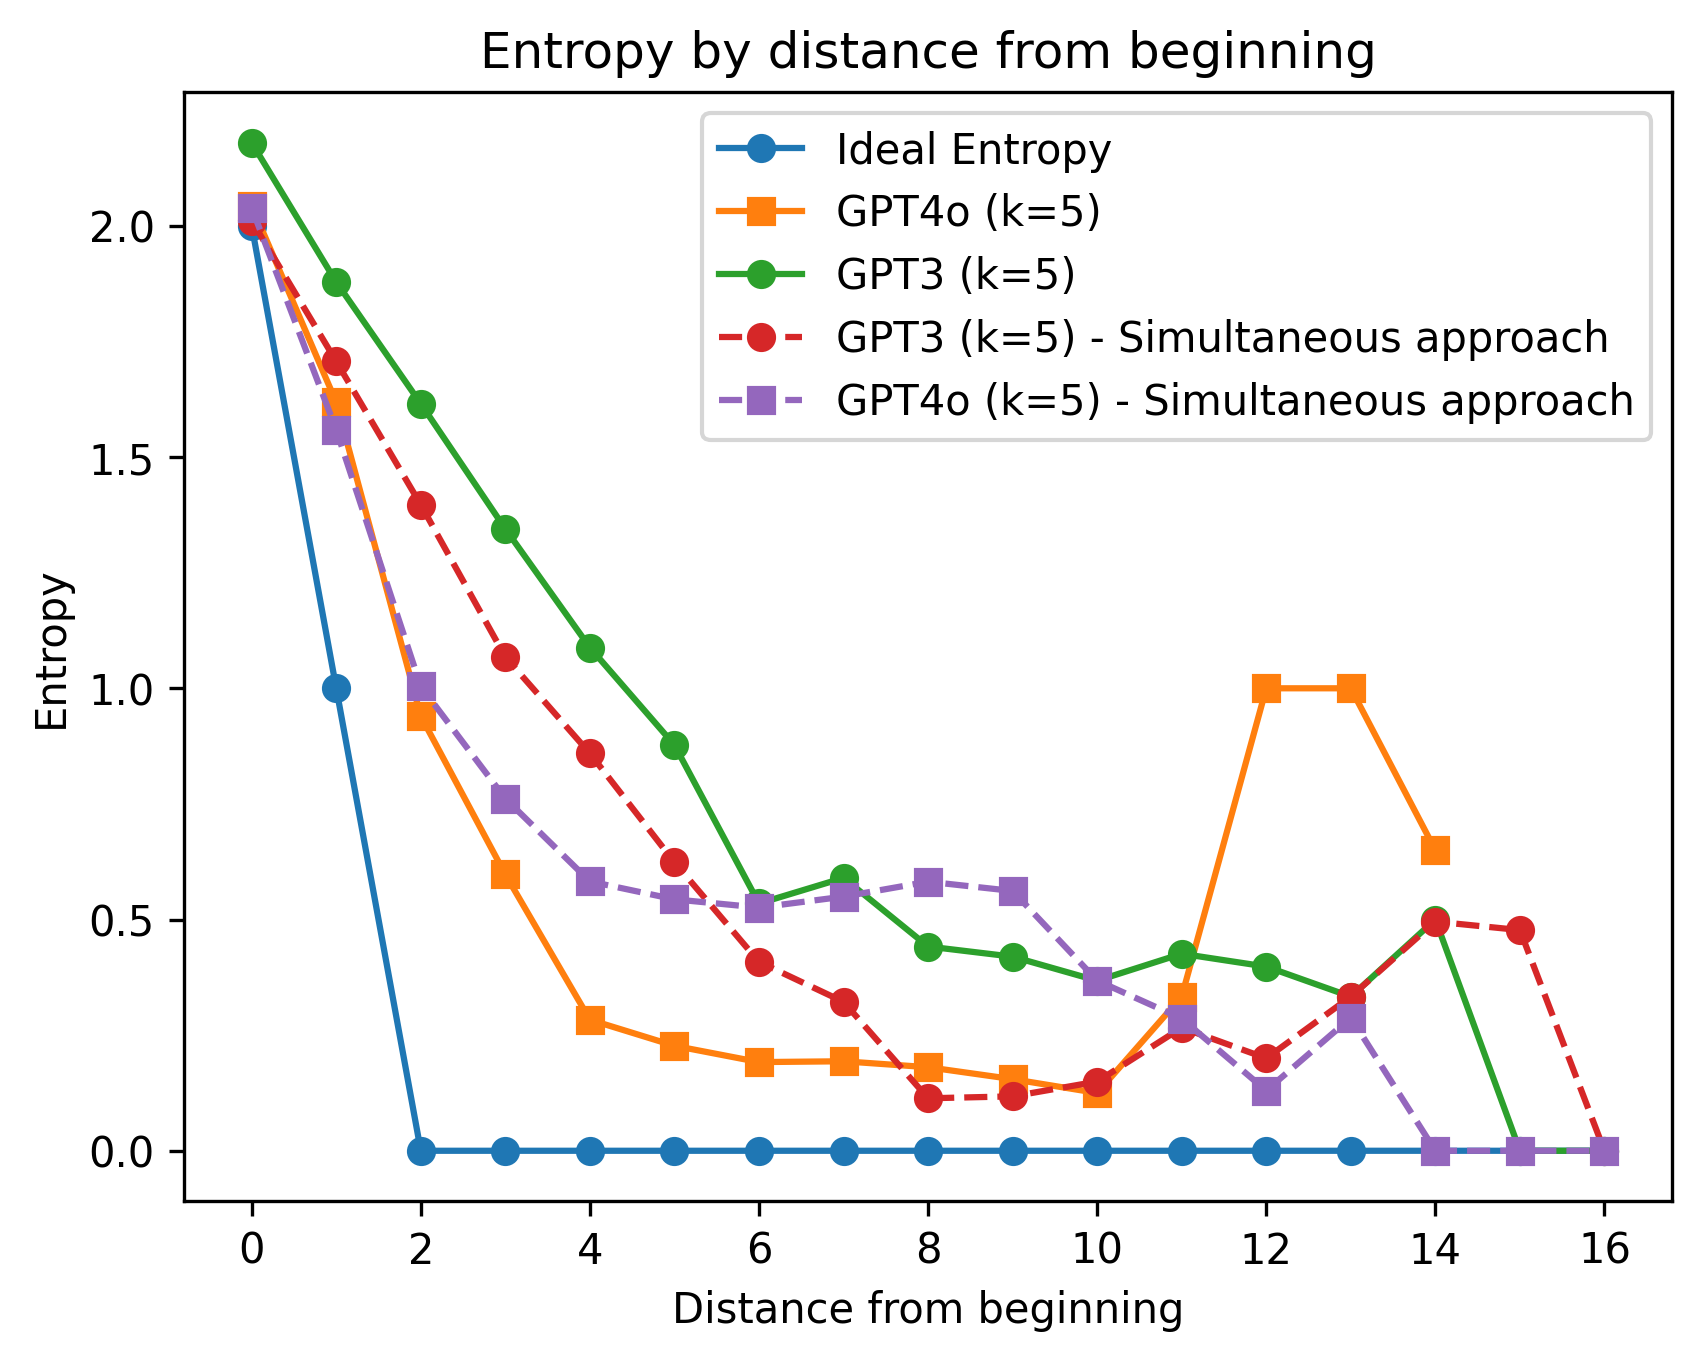

In [35]:
k_five_statistics_beginning_gpt4o = "./data/generation/8_mcrae/entropy_k_five_gpt4o_statistics_from_dialogue_beginning_apocalypse_cleaned.csv"
k_ten_statistics_beginning_gpt4o = "./data/generation/8_mcrae/entropy_k_ten_gpt4o_statistics_from_dialogue_beginning_apocalypse_cleaned.csv"
k_five_sim_app_beginning_gpt4o = "./data/generation/8_mcrae/entropy(gpt3)_k_five_gpt4o_statistics_from_dialogue_beginning_apocalypse_cleaned.csv"

k_five_statistics_beginning_gpt3 = "./data/generation/8_mcrae/entropy_k_five_statistics_from_dialogue_beginning_cleaned.csv"
k_ten_statistics_beginning_gpt3 = "./data/generation/8_mcrae/entropy_k_ten_statistics_from_dialogue_beginning_cleaned.csv"
k_twenty_statistics_beginning_gpt3 = "./data/generation/8_mcrae/entropy_k_twenty_statistics_from_dialogue_beginning_cleaned.csv"
k_five_sim_app_beginning_gpt3 = "./data/generation/8_mcrae/entropy(gpt3)_k_five_gpt3_statistics_from_dialogue_beginning_apocalypse_cleaned.csv"

five_rf_gpt4o = open(k_five_statistics_beginning_gpt4o, 'r', newline='')
ten_rf_gpt4o = open(k_ten_statistics_beginning_gpt4o, 'r', newline='')
five_rf_gpt3 = open(k_five_statistics_beginning_gpt3, 'r', newline='')
ten_rf_gpt3 = open(k_ten_statistics_beginning_gpt3, 'r', newline='')
twenty_rf_gpt3 = open(k_twenty_statistics_beginning_gpt3, 'r', newline='')
five_rf_sim_app_gpt3 = open(k_five_sim_app_beginning_gpt3, 'r', newline='')
five_rf_sim_app_gpt4 = open(k_five_sim_app_beginning_gpt4o, 'r', newline='')

five_reader_gpt4o = csv.DictReader(five_rf_gpt4o, delimiter=",")
ten_reader_gpt4o = csv.DictReader(ten_rf_gpt4o, delimiter=",")
five_reader_gpt3 = csv.DictReader(five_rf_gpt3, delimiter=",")
ten_reader_gpt3 = csv.DictReader(ten_rf_gpt3, delimiter=",")
twenty_reader_gpt3 = csv.DictReader(twenty_rf_gpt3, delimiter=",")
five_reader_sim_app_gpt3 = csv.DictReader(five_rf_sim_app_gpt3, delimiter=",")
five_reader_sim_app_gpt4 = csv.DictReader(five_rf_sim_app_gpt4, delimiter=",")

five_mean_gpt40 = get_mean(five_reader_gpt4o, key='std')
ten_mean_gpt40 = get_mean(ten_reader_gpt4o, key='mean')
five_mean_gpt3 = get_mean(five_reader_gpt3, key='std')
ten_mean_gpt3 = get_mean(ten_reader_gpt3, key='std')
twenty_mean_gpt3 = get_mean(twenty_reader_gpt3, key='std')
five_mean_sim_app_gpt3 = get_mean(five_reader_sim_app_gpt3, key='mean')
five_mean_sim_app_gpt4 = get_mean(five_reader_sim_app_gpt4, key='mean')

five_rf_gpt4o.close()
ten_rf_gpt4o.close()
five_rf_gpt3.close()
ten_rf_gpt3.close()
twenty_rf_gpt3.close()
five_rf_sim_app_gpt3.close()
five_rf_sim_app_gpt4.close()

print(dic_entropies_op_by_distances_beginnig)
plt.figure(dpi=300)
plt.plot(dic_entropies_op_by_distances_beginnig.values(),  marker = 'o')
plt.plot(five_mean_gpt40,  marker = 's')
# plt.plot(ten_mean_gpt40,  marker = 'o')
plt.plot(five_mean_gpt3,  marker = 'o')
# plt.plot(ten_mean_gpt3,  marker = 'o')
# plt.plot(twenty_mean_gpt3,  marker = 'o')
plt.plot(five_mean_sim_app_gpt3,  marker = 'o', linestyle='dashed')
plt.plot(five_mean_sim_app_gpt4,  marker = 's', linestyle='dashed')
plt.xlabel('Distance from beginning')
plt.ylabel('Entropy')
plt.title('Entropy by distance from beginning')
plt.legend(['Ideal Entropy', 'GPT4o (k=5)', 'GPT3 (k=5)', 'GPT3 (k=5) - Simultaneous approach', 'GPT4o (k=5) - Simultaneous approach'])

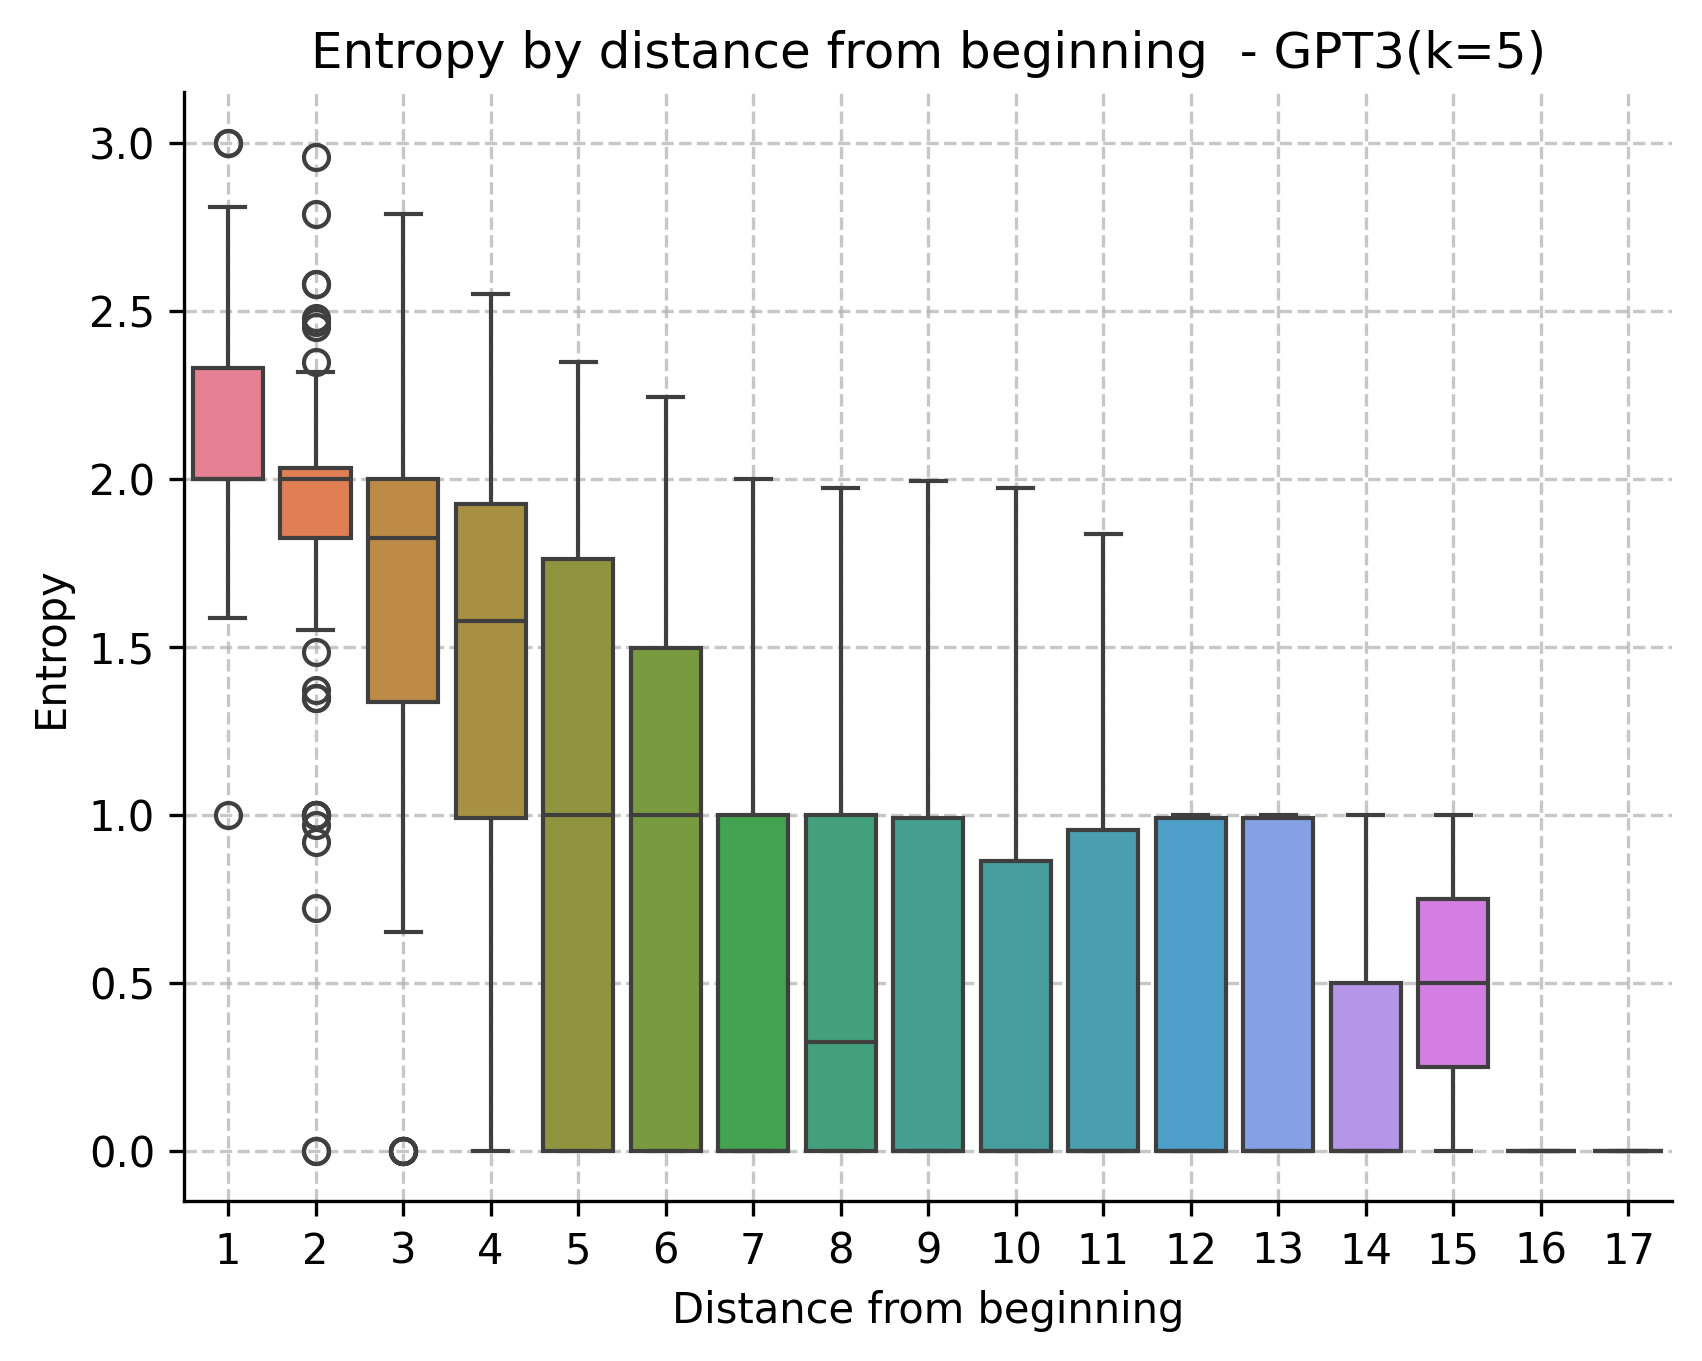

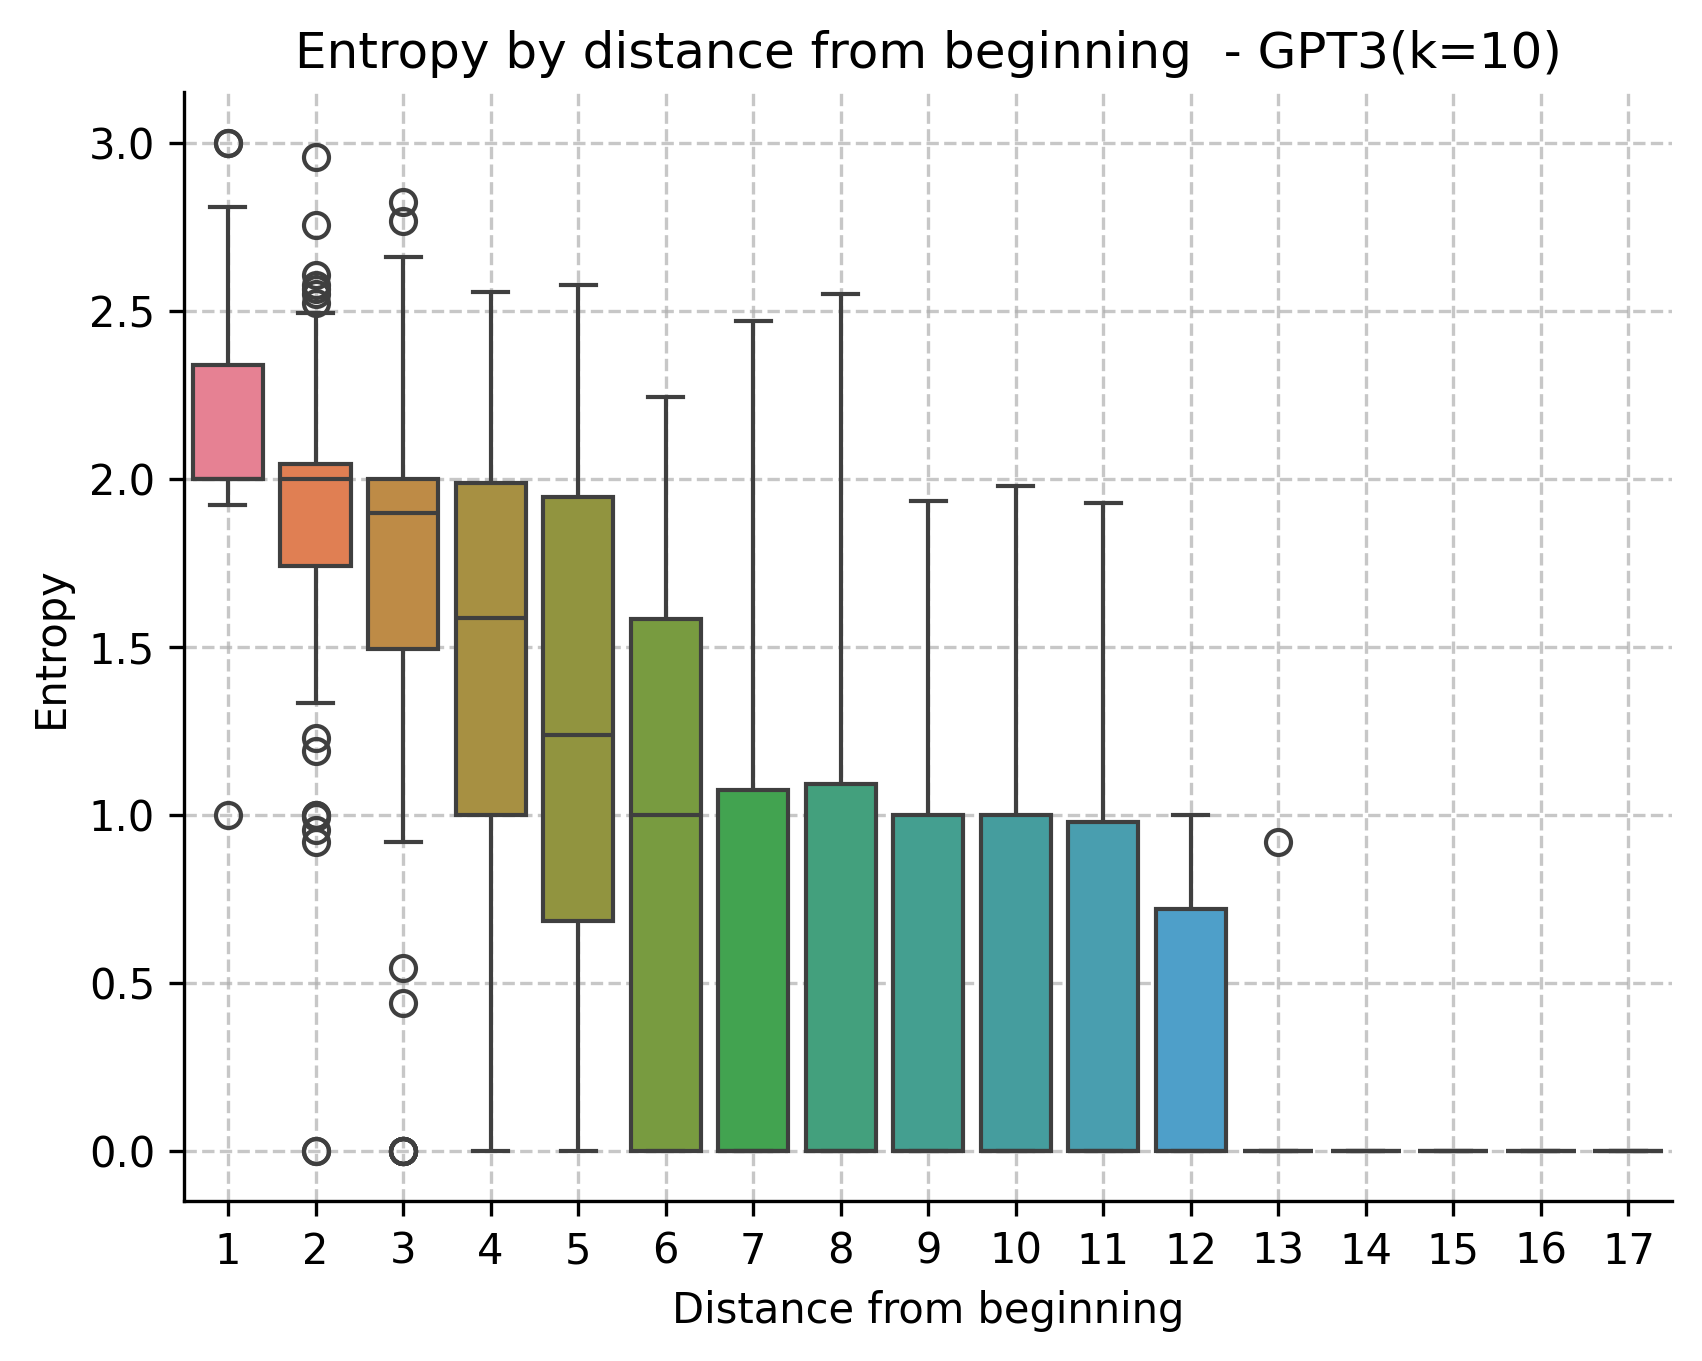

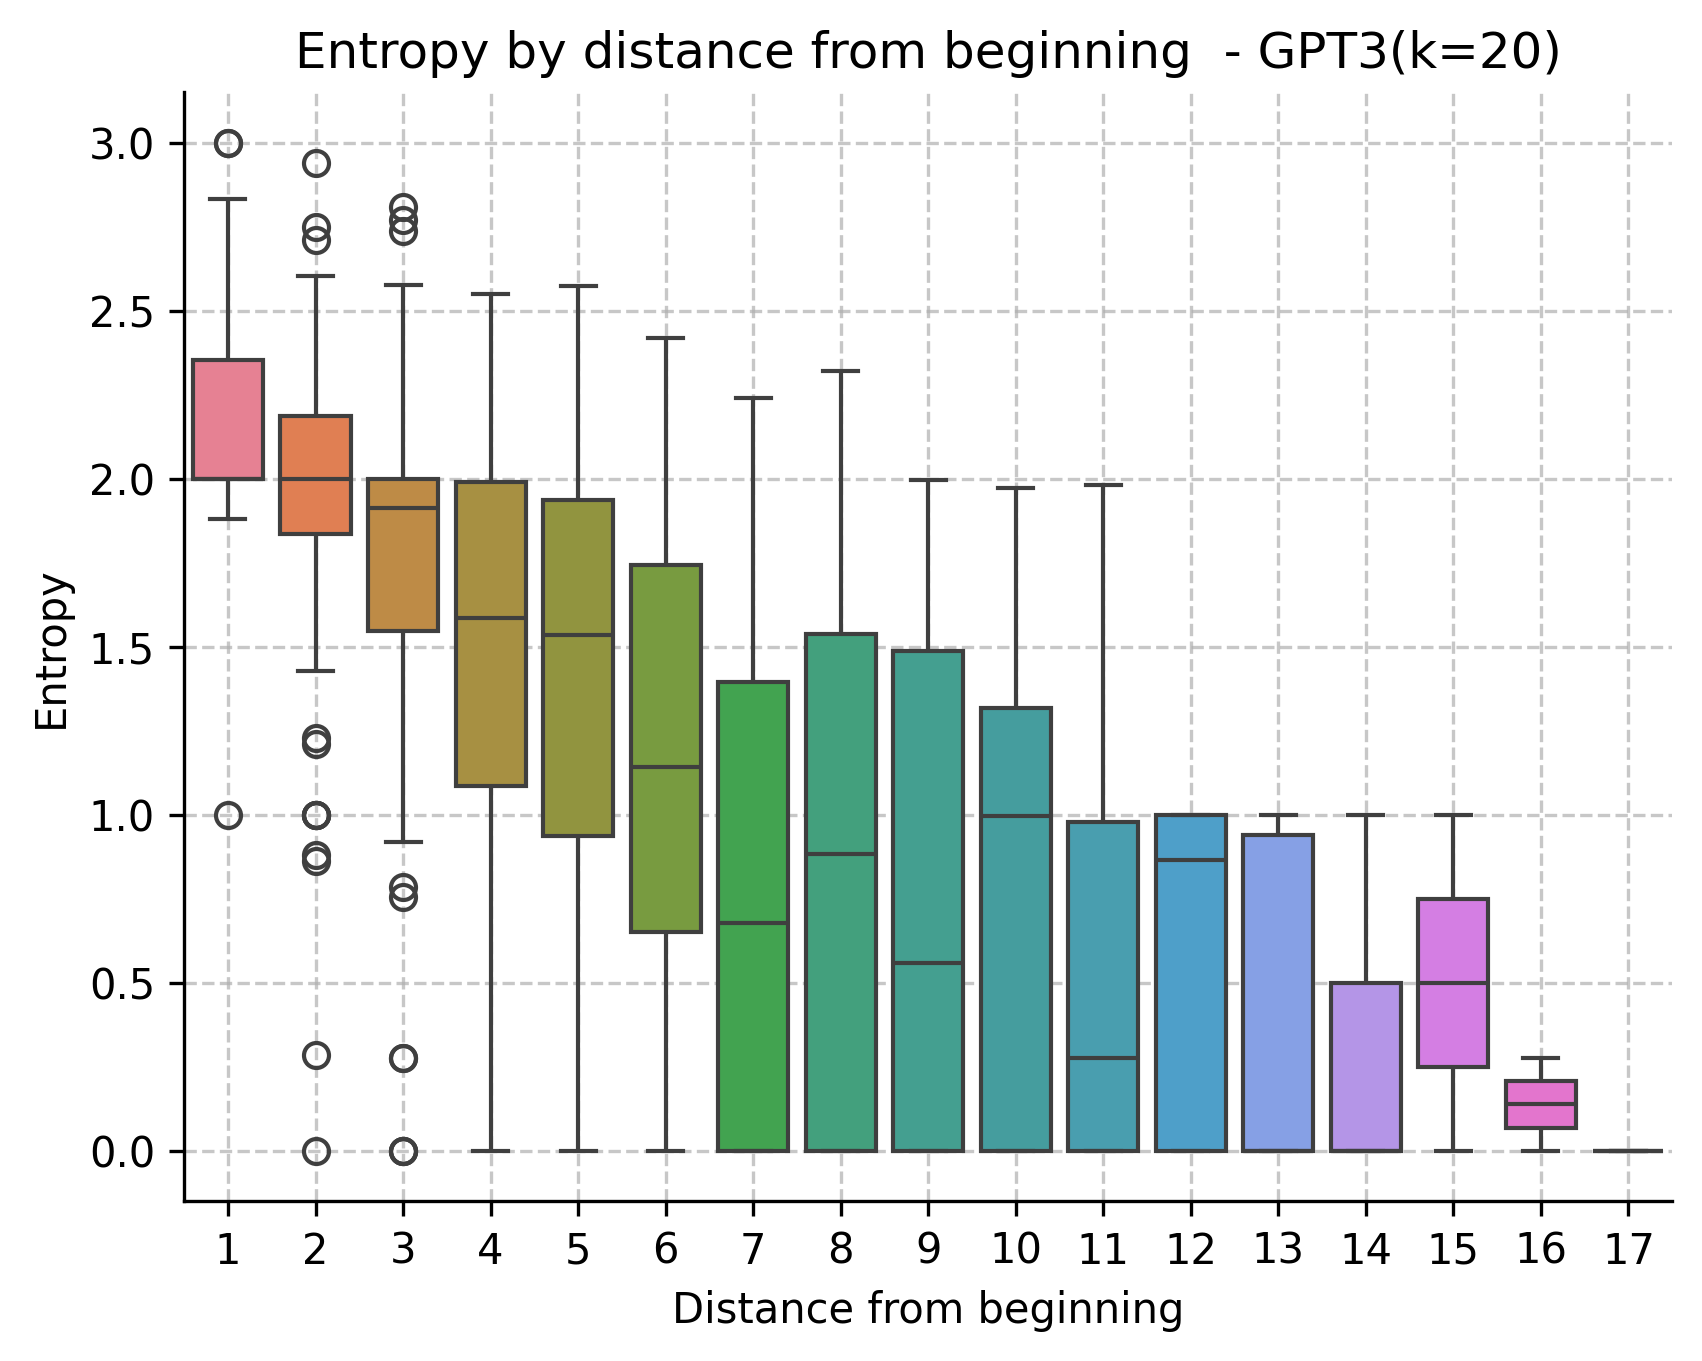

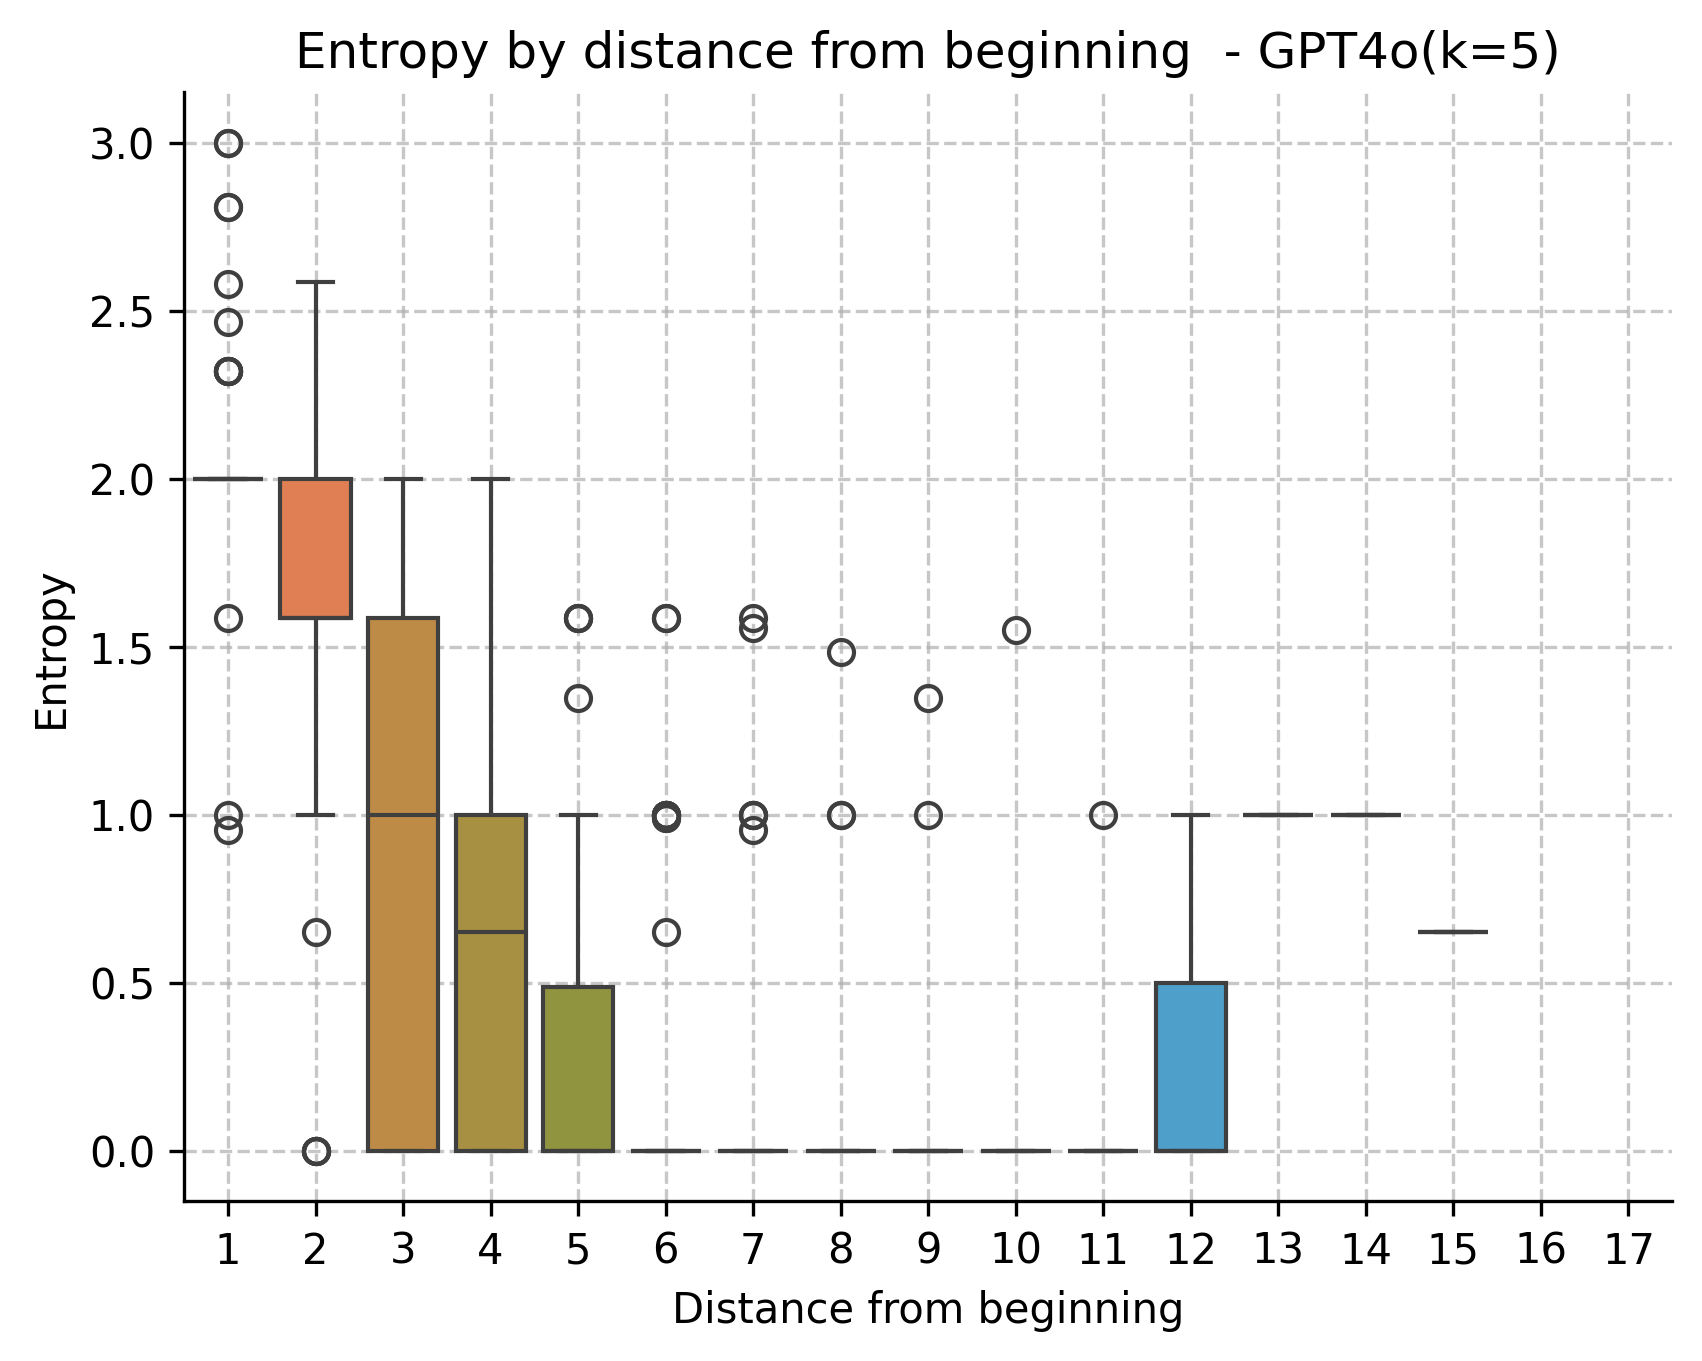

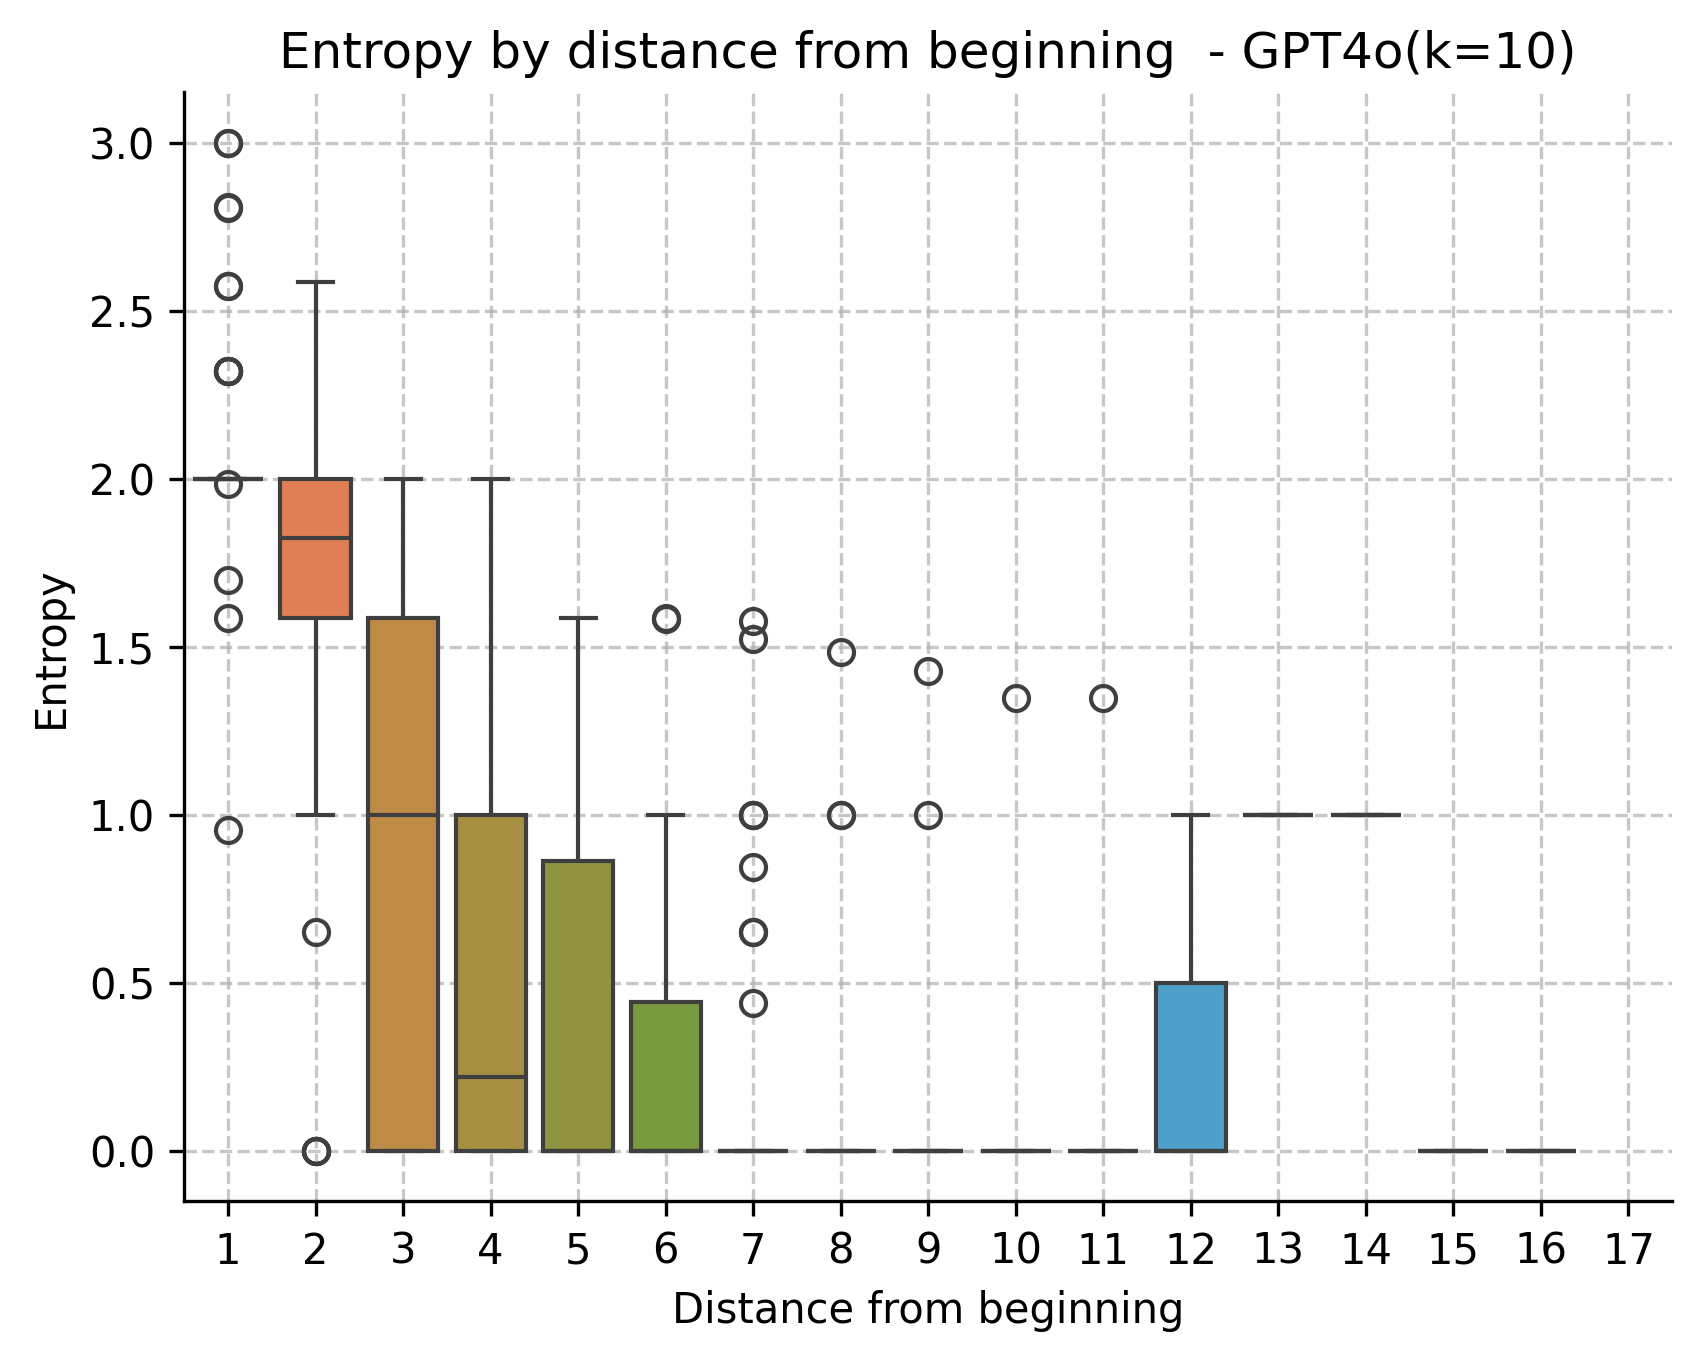

In [13]:
list_entropies = [five_entropies, ten_entropies, twenty_entropies, five_gpt4o_entropies, ten_gpt4o_entropies]
labels = ['GPT3(k=5)', 'GPT3(k=10)', 'GPT3(k=20)', 'GPT4o(k=5)', 'GPT4o(k=10)']

for i, entropies in enumerate(list_entropies):
    entropies_by_distances = []
    for _ in range(0, max_dialogue_length, 1):
        entropies_by_distances.append([])

    for dialogue_entropy in entropies.values():
        for step_index, step_entropy in enumerate(dialogue_entropy):
            # filter invalid entropy values
            if step_entropy != -1.0:
                entropies_by_distances[step_index].append(step_entropy)

    # print(entropies_by_distances[0])
    # Creiamo il box plot usando seaborn
    plt.figure(dpi=300)
    sns.boxplot(data=entropies_by_distances)

    # Modifichiamo le etichette dell'asse x per partire da 1
    plt.xlabel('Distance from beginning')
    plt.ylabel('Entropy')
    plt.title(f'Entropy by distance from beginning  - {labels[i]}')

    # Impostiamo i tick dell'asse x per partire da 1 invece che da 0
    plt.xticks(ticks=range(len(entropies_by_distances)), labels=range(1, len(entropies_by_distances) + 1))

    # Miglioriamo l'estetica generale del grafico
    sns.despine()  # Rimuove le spine del grafico per un aspetto più pulito
    plt.grid(True, linestyle='--', alpha=0.7)  # Aggiunge una griglia per una migliore leggibilità

    # Mostriamo il grafico
    plt.show()


## Entropy Ideal dialogues GPT4o

In [70]:
k_five_v_c_gpt3_end = "./data/generation/8_mcrae/entropy(gpt4o)_k_five_gpt3_statistics_from_dialogue_end_sim_app_apocalypse_cleaned.csv"
k_five_v_c_gpt4_end = "./data/generation/8_mcrae/entropy(gpt4o)_k_five_gpt4o_statistics_from_dialogue_end_sim_app_apocalypse_cleaned.csv"
k_five_end = "./data/generation/8_mcrae/entropy(gpt4o)_k_five_gpt4o_statistics_from_dialogue_end_apocalypse_cleaned.csv"

k_five_v_c_begining_gpt4 = "./data/generation/8_mcrae/entropy(gpt4o)_k_five_gpt4o_statistics_from_dialogue_beginning_sim_app_apocalypse_cleaned.csv"
k_five_v_c_begining_gpt3 = "./data/generation/8_mcrae/entropy(gpt4o)_k_five_gpt3_statistics_from_dialogue_beginning_sim_app_apocalypse_cleaned.csv"
k_five_beginning = "./data/generation/8_mcrae/entropy(gpt4o)_k_five_gpt4o_statistics_from_dialogue_beginning_apocalypse_cleaned.csv"

k_five_entropy_gpt3 = "./data/generation/8_mcrae/sbs_entropy(gpt4o)_k_five_gpt3_sim_app.csv"
k_five_entropy_gpt4 = "./data/generation/8_mcrae/sbs_entropy(gpt4o)_k_five_gpt4o_sim_app.csv"

five_rf_gpt3_v_c = open(k_five_v_c_gpt3_end, 'r', newline='')
five_rf_gpt4_v_c = open(k_five_v_c_gpt4_end, 'r', newline='')
k_five_dial_gpt4_end_rf = open(k_five_end, 'r', newline='')
five_rf_gpt4_begining_v_c = open(k_five_v_c_begining_gpt4, 'r', newline='')
five_rf_gpt3_begining_v_c = open(k_five_v_c_begining_gpt3, 'r', newline='')
k_five_dial_gpt4_beginning_rf = open(k_five_beginning, 'r', newline='')

k_five_entropy_gpt3_rf = open(k_five_entropy_gpt3, 'r', newline='')
k_five_entropy_gpt4_rf = open(k_five_entropy_gpt4, 'r', newline='')

K_five_dial_gpt4_end_reader = csv.DictReader(k_five_dial_gpt4_end_rf, delimiter=",")
k_five_dial_gpt4_beginning_reader = csv.DictReader(k_five_dial_gpt4_beginning_rf, delimiter=",")
five_reader_gpt3_v_c = csv.DictReader(five_rf_gpt3_v_c, delimiter=",")
five_reader_gpt4_v_c = csv.DictReader(five_rf_gpt4_v_c, delimiter=",")
five_reader_gpt4_begining_v_c = csv.DictReader(five_rf_gpt4_begining_v_c, delimiter=",")
five_reader_gpt3_begining_v_c = csv.DictReader(five_rf_gpt3_begining_v_c, delimiter=",")

k_five_entropy_gpt3_reader = csv.DictReader(k_five_entropy_gpt3_rf, delimiter=",")
k_five_entropy_gpt4_reader = csv.DictReader(k_five_entropy_gpt4_rf, delimiter=",")

five_mean_gpt3_v_c = get_mean(five_reader_gpt3_v_c, key='mean')
five_mean_gpt4_v_c = get_mean(five_reader_gpt4_v_c, key='mean')
k_five_mean_gpt4_end = get_mean(K_five_dial_gpt4_end_reader, key='mean')
k_five_mean_gpt4_begining = get_mean(k_five_dial_gpt4_beginning_reader, key='mean')
five_mean_gpt4_begining_v_c = get_mean(five_reader_gpt4_begining_v_c, key='mean')
five_mean_gpt3_begining_v_c = get_mean(five_reader_gpt3_begining_v_c, key='mean')

five_entropies_2_gpt3, max_dialogue_length = group_entropies_by_dialogue_id(k_five_entropy_gpt3_reader)
five_entropies_2_gpt4, _ = group_entropies_by_dialogue_id(k_five_entropy_gpt4_reader)

five_rf_gpt3_v_c.close()
five_rf_gpt4_v_c.close()
five_rf_gpt4_begining_v_c.close()
five_rf_gpt3_begining_v_c.close()
k_five_entropy_gpt3_rf.close()
k_five_entropy_gpt4_rf.close()

In [59]:
five_dialog_gpt4o_samples_sbs_gpt4o_data_path = "./data/generation/8_mcrae/dialogues(gpt4o)_sbs_k_five_gpt4o.csv"

five_dial_gpt4o_samples_gpt4o_rf = open(five_dialog_gpt4o_samples_sbs_gpt4o_data_path, 'r', newline='')
five_dial_gpt4o_samples_gpt4o_reader = csv.DictReader(five_dial_gpt4o_samples_gpt4o_rf, delimiter=",")
five_dial_gpt4o_samples_gpt4o_data = group_sbs_data_by_dialogue_id(five_dial_gpt4o_samples_gpt4o_reader)

In [60]:
def group_sbs_data_by_dialogue_id(reader: csv.DictReader):
  
  dialogues = []
  dialogue_steps = []
  
  current_dialogue_id = 0
  for row in reader:
    dialogue_id = row["dialogue_id"]
    
    if(dialogue_id != ''):
      dialogue_id = int(dialogue_id)
      intra_dialogue_id = int(row["intra_dialogue_id"])
      
      if(dialogue_id != current_dialogue_id):
        dialogues.append({
          "dialogue_id" : current_dialogue_id,
          "intra_dialogues" : dialogue_steps
        })
        
        current_dialogue_id = dialogue_id
        dialogue_steps = []
      
      dialogue_steps.append({
        "intra_dialogue_id" : intra_dialogue_id,
        "target" : row["target"],
        "question" : row["question"],
        "answer" : row["answer"],
      })
    
  return dialogues

In [61]:
dialogues_gpt4 = "./data/generation/8_mcrae/gpt-dialogues-gpt4.csv"

dialogues_gpt4_rf = open(dialogues_gpt4, 'r', newline='')
dialogues_gpt4_reader = csv.DictReader(dialogues_gpt4_rf, delimiter=",")
dialogues_gpt4_data = group_sbs_data_by_dialogue_id(dialogues_gpt4_reader)
dialogues_gpt4_rf.close()

In [62]:
entropies_optimal_gpt4o = {'dialogue_id': [], 'intra_dialogue_id': [], 'entropy_op': []}
for dialogue_id, dialogue in enumerate(dialogues_gpt4_data):
    intra_dialogues = dialogue["intra_dialogues"]
    total_steps = len(intra_dialogues)
    initial_num_candidates = 8
    num_candidates = initial_num_candidates
    for i in range(total_steps):
        # num_candidates = max(1, initial_num_candidates - i * (initial_num_candidates - 1) // (total_steps - 1))
        num_candidates = max(1, int(num_candidates / 2))
        
        optimal_distribution = np.zeros(8)
        for j in range(0, num_candidates):
            optimal_distribution[j] = 1 / num_keys
        entropy_opt = sp.stats.entropy(optimal_distribution, base=2)
        entropies_optimal_gpt4o['dialogue_id'].append(dialogue_id)
        entropies_optimal_gpt4o['intra_dialogue_id'].append(i)
        entropies_optimal_gpt4o['entropy_op'].append(entropy_opt)
        print(f"Step {i}, Entropy: {entropy_opt}, num_candidate: {num_candidates}")
        
    print()
       

Step 0, Entropy: 2.0, num_candidate: 4
Step 1, Entropy: 1.0, num_candidate: 2
Step 2, Entropy: 0.0, num_candidate: 1
Step 3, Entropy: 0.0, num_candidate: 1
Step 4, Entropy: 0.0, num_candidate: 1
Step 5, Entropy: 0.0, num_candidate: 1
Step 6, Entropy: 0.0, num_candidate: 1
Step 7, Entropy: 0.0, num_candidate: 1
Step 8, Entropy: 0.0, num_candidate: 1

Step 0, Entropy: 2.0, num_candidate: 4
Step 1, Entropy: 1.0, num_candidate: 2
Step 2, Entropy: 0.0, num_candidate: 1
Step 3, Entropy: 0.0, num_candidate: 1

Step 0, Entropy: 2.0, num_candidate: 4
Step 1, Entropy: 1.0, num_candidate: 2
Step 2, Entropy: 0.0, num_candidate: 1
Step 3, Entropy: 0.0, num_candidate: 1
Step 4, Entropy: 0.0, num_candidate: 1
Step 5, Entropy: 0.0, num_candidate: 1

Step 0, Entropy: 2.0, num_candidate: 4
Step 1, Entropy: 1.0, num_candidate: 2
Step 2, Entropy: 0.0, num_candidate: 1
Step 3, Entropy: 0.0, num_candidate: 1
Step 4, Entropy: 0.0, num_candidate: 1
Step 5, Entropy: 0.0, num_candidate: 1

Step 0, Entropy: 2.0,

In [63]:
current_dialogue_id = -1
max_length = 0
entropies_ideal = {}

for i in range(len(entropies_optimal_gpt4o['dialogue_id'])):
    dialogue_id = entropies_optimal_gpt4o['dialogue_id'][i]
    if(dialogue_id != ''):
      dialogue_id = int(dialogue_id)
      intra_dialogue_id = int(entropies_optimal_gpt4o['intra_dialogue_id'][i])

      if(dialogue_id != current_dialogue_id):
        entropies_ideal[dialogue_id] = []
        current_dialogue_id = dialogue_id
      
      entropies_ideal[dialogue_id].append(entropies_optimal_gpt4o['entropy_op'][i])
      
      if(intra_dialogue_id > max_length):
        max_length = intra_dialogue_id
print(entropies_ideal)
print(max_length+1)

{0: [2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 1: [2.0, 1.0, 0.0, 0.0], 2: [2.0, 1.0, 0.0, 0.0, 0.0, 0.0], 3: [2.0, 1.0, 0.0, 0.0, 0.0, 0.0], 4: [2.0, 1.0, 0.0, 0.0, 0.0], 5: [2.0, 1.0, 0.0], 6: [2.0, 1.0, 0.0, 0.0], 7: [2.0, 1.0, 0.0, 0.0], 8: [2.0, 1.0, 0.0, 0.0], 9: [2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 10: [2.0, 1.0, 0.0, 0.0, 0.0], 11: [2.0, 1.0, 0.0, 0.0, 0.0, 0.0], 12: [2.0, 1.0, 0.0, 0.0, 0.0], 13: [2.0, 1.0, 0.0], 14: [2.0, 1.0, 0.0, 0.0], 15: [2.0, 1.0, 0.0, 0.0], 16: [2.0, 1.0, 0.0, 0.0], 17: [2.0, 1.0, 0.0, 0.0], 18: [2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 19: [2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 20: [2.0, 1.0, 0.0, 0.0, 0.0], 21: [2.0, 1.0, 0.0, 0.0, 0.0, 0.0], 22: [2.0, 1.0, 0.0, 0.0], 23: [2.0, 1.0, 0.0], 24: [2.0, 1.0, 0.0, 0.0, 0.0], 25: [2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 26: [2.0, 1.0, 0.0, 0.0, 0.0, 0.0], 27: [2.0, 1.0, 0.0], 28: [2.0, 1.0, 0.0, 0.0], 29: [2.0, 1.0, 0.0], 30: [2.0, 1.0, 0.0, 0.0, 0.0], 31: [2.0, 1.0, 0.0, 0.0], 32: [2.0, 1.0, 0.0], 3

In [64]:
def entropy_from_end(entropies_val):   
    entropies_op_by_distances = []

    for _ in range(0, max_dialogue_length, 1):
        entropies_op_by_distances.append([])

    for dialogue_entropy in entropies_val.values():
        dialogue_length = len(dialogue_entropy)
        for step_index, step_entropy in enumerate(dialogue_entropy):
            distance_from_end = dialogue_length - step_index - 1
            entropies_op_by_distances[distance_from_end].append(step_entropy)

    dic_entropies_op_by_distances_end = {}
    for (distance, entropies_by_distance) in enumerate(entropies_op_by_distances):
        std = np.std(entropies_by_distance)
        mean = np.mean(entropies_by_distance)
        dic_entropies_op_by_distances_end[distance+1] = mean
        print(distance, std, mean)

    return dic_entropies_op_by_distances_end
dic_entropies_op_by_distances_end = entropy_from_end(entropies_ideal)

0 0.18047616184504506 0.033707865168539325
1 0.4851018684252338 0.21348314606741572
2 0.7357810241654127 0.6046511627906976
3 0.8357287146668296 1.0136986301369864
4 0.8414348907780931 1.1914893617021276
5 0.7756287771866126 1.28
6 0.910166120476864 1.3076923076923077
7 0.6324555320336759 1.0
8 0.8660254037844386 1.5
9 0.0 0.0
10 0.0 1.0
11 0.0 2.0


In [65]:
entropies_op_by_distances = []
  
for _ in range(0, max_dialogue_length, 1):
    entropies_op_by_distances.append([])

for dialogue_entropy in entropies_ideal.values():
    for step_index, step_entropy in enumerate(dialogue_entropy):
        # filter invalid entropy values
        if step_entropy != -1.0:
            entropies_op_by_distances[step_index].append(step_entropy)
      
dic_entropies_op_by_distances_beginnig = {}
for (distance, entropies_by_distance) in enumerate(entropies_op_by_distances):
    std = np.std(entropies_by_distance)
    mean = np.mean(entropies_by_distance)
    dic_entropies_op_by_distances_beginnig[distance] = mean
    print(distance, std, mean)

0 0.0 2.0
1 0.0 1.0
2 0.0 0.0
3 0.0 0.0
4 0.0 0.0
5 0.0 0.0
6 0.0 0.0
7 0.0 0.0
8 0.0 0.0
9 0.0 0.0
10 0.0 0.0
11 0.0 0.0


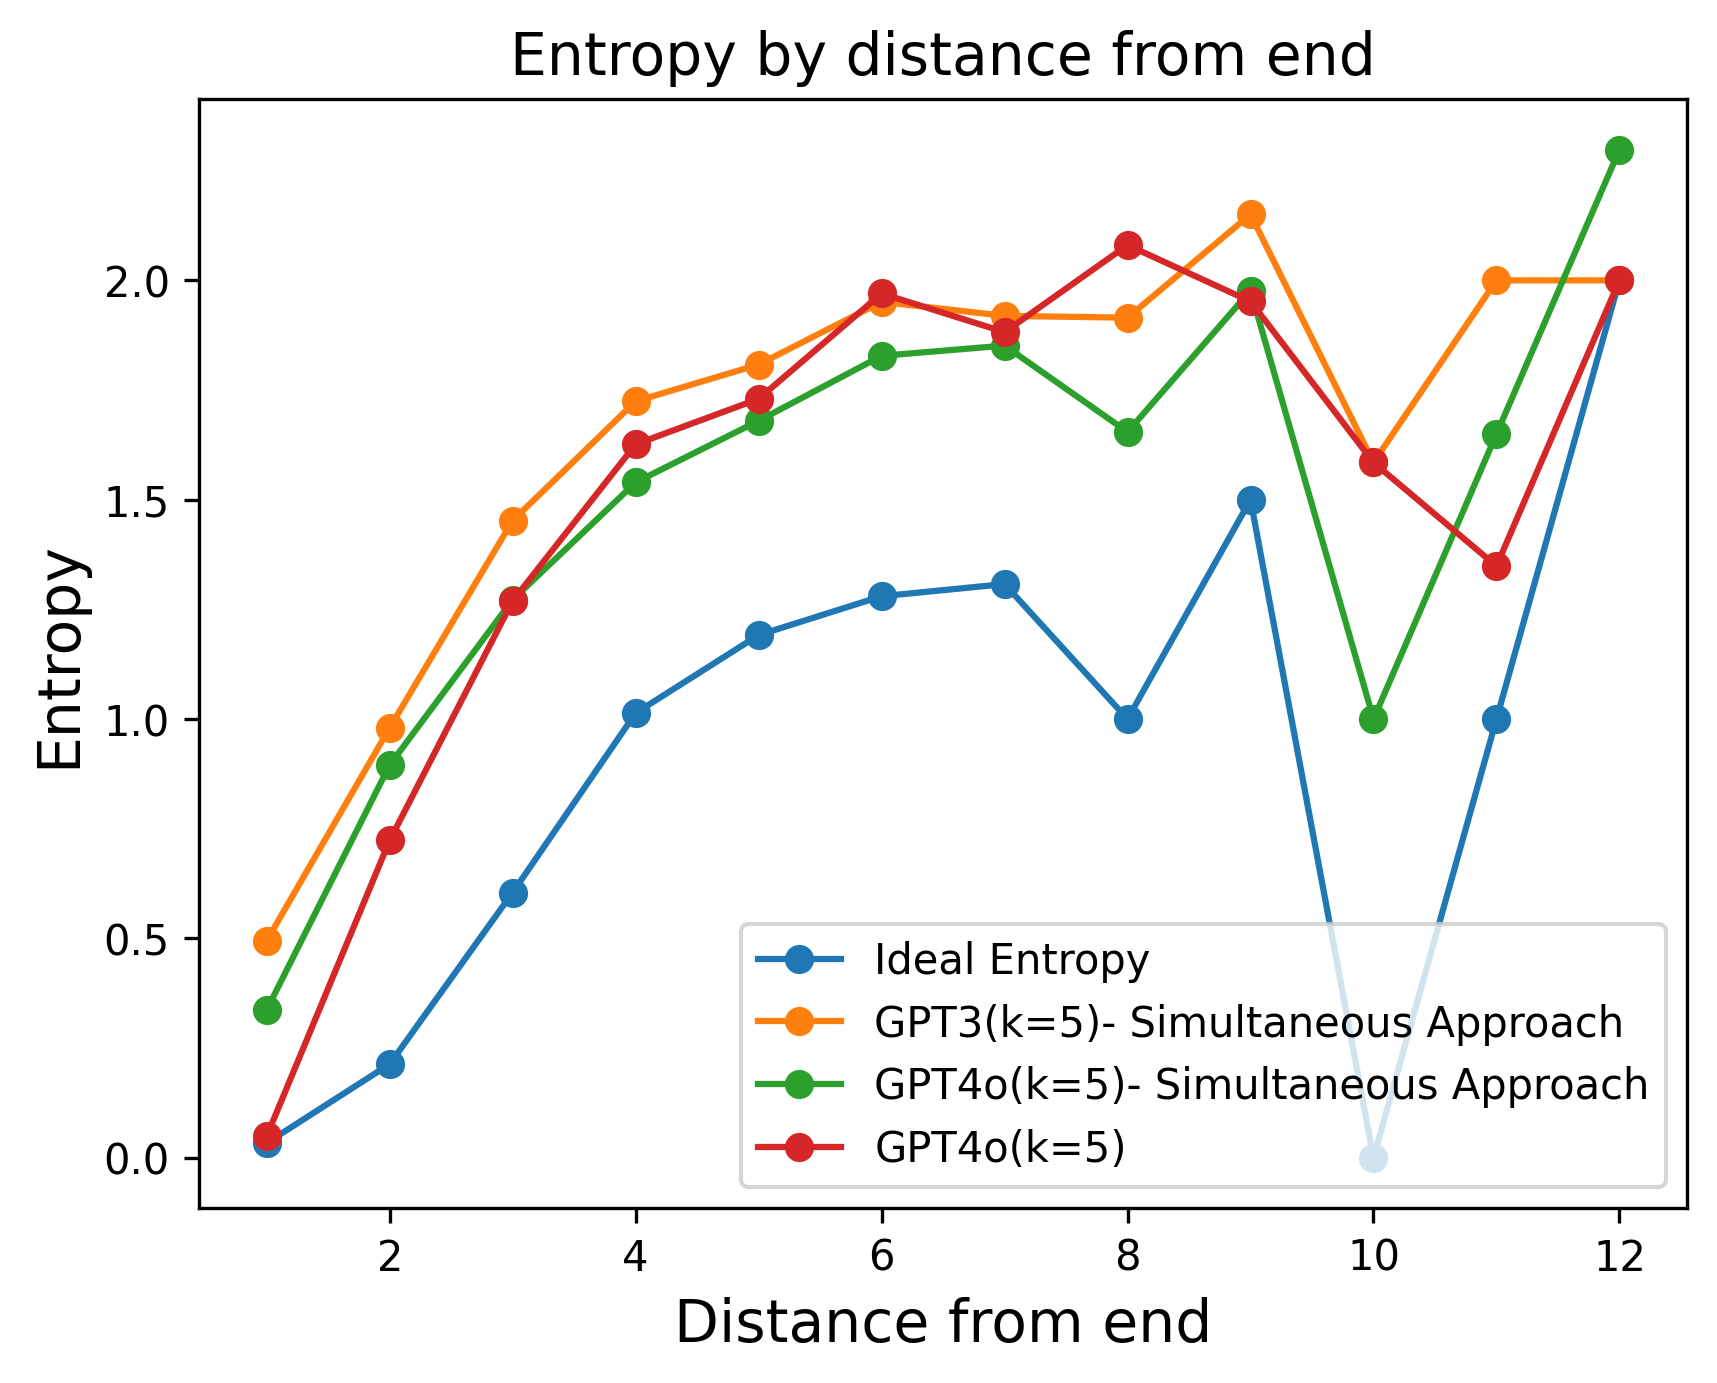

In [74]:
k_five_v_c_gpt3_end = "./data/generation/8_mcrae/entropy(gpt4o)_k_five_gpt3_statistics_from_dialogue_end_sim_app_apocalypse_cleaned.csv"
k_five_v_c_gpt4_end = "./data/generation/8_mcrae/entropy(gpt4o)_k_five_gpt4o_statistics_from_dialogue_end_sim_app_apocalypse_cleaned.csv"
k_five_end = "./data/generation/8_mcrae/entropy(gpt4o)_k_five_gpt4o_statistics_from_dialogue_end_apocalypse_cleaned.csv"

five_rf_gpt3_v_c = open(k_five_v_c_gpt3_end, 'r', newline='')
five_rf_gpt4_v_c = open(k_five_v_c_gpt4_end, 'r', newline='')
k_five_dial_gpt4_end_rf = open(k_five_end, 'r', newline='')

K_five_dial_gpt4_end_reader = csv.DictReader(k_five_dial_gpt4_end_rf, delimiter=",")
five_reader_gpt3_v_c = csv.DictReader(five_rf_gpt3_v_c, delimiter=",")
five_reader_gpt4_v_c = csv.DictReader(five_rf_gpt4_v_c, delimiter=",")

five_mean_gpt3_v_c = get_mean(five_reader_gpt3_v_c, key='mean')
five_mean_gpt4_v_c = get_mean(five_reader_gpt4_v_c, key='mean')
k_five_mean_gpt4_end = get_mean(K_five_dial_gpt4_end_reader, key='mean')

five_rf_gpt3_v_c.close()
five_rf_gpt4_v_c.close()
k_five_dial_gpt4_end_rf.close()

x_values_v_c = range(1, max_dialogue_length + 1)

plt.figure(dpi=300)
plt.plot(x_values_v_c, dic_entropies_op_by_distances_end.values(),  marker = 'o')
plt.plot(x_values_v_c, five_mean_gpt3_v_c,  marker = 'o')
plt.plot(x_values_v_c, five_mean_gpt4_v_c,  marker = 'o')
plt.plot(x_values_v_c, k_five_mean_gpt4_end,  marker = 'o')
plt.xlabel('Distance from end', fontsize=14)
plt.ylabel('Entropy', fontsize=14)
plt.title('Entropy by distance from end', fontsize=14)
plt.legend(['Ideal Entropy', 'GPT3(k=5)- Simultaneous Approach', 'GPT4o(k=5)- Simultaneous Approach', 'GPT4o(k=5)'])

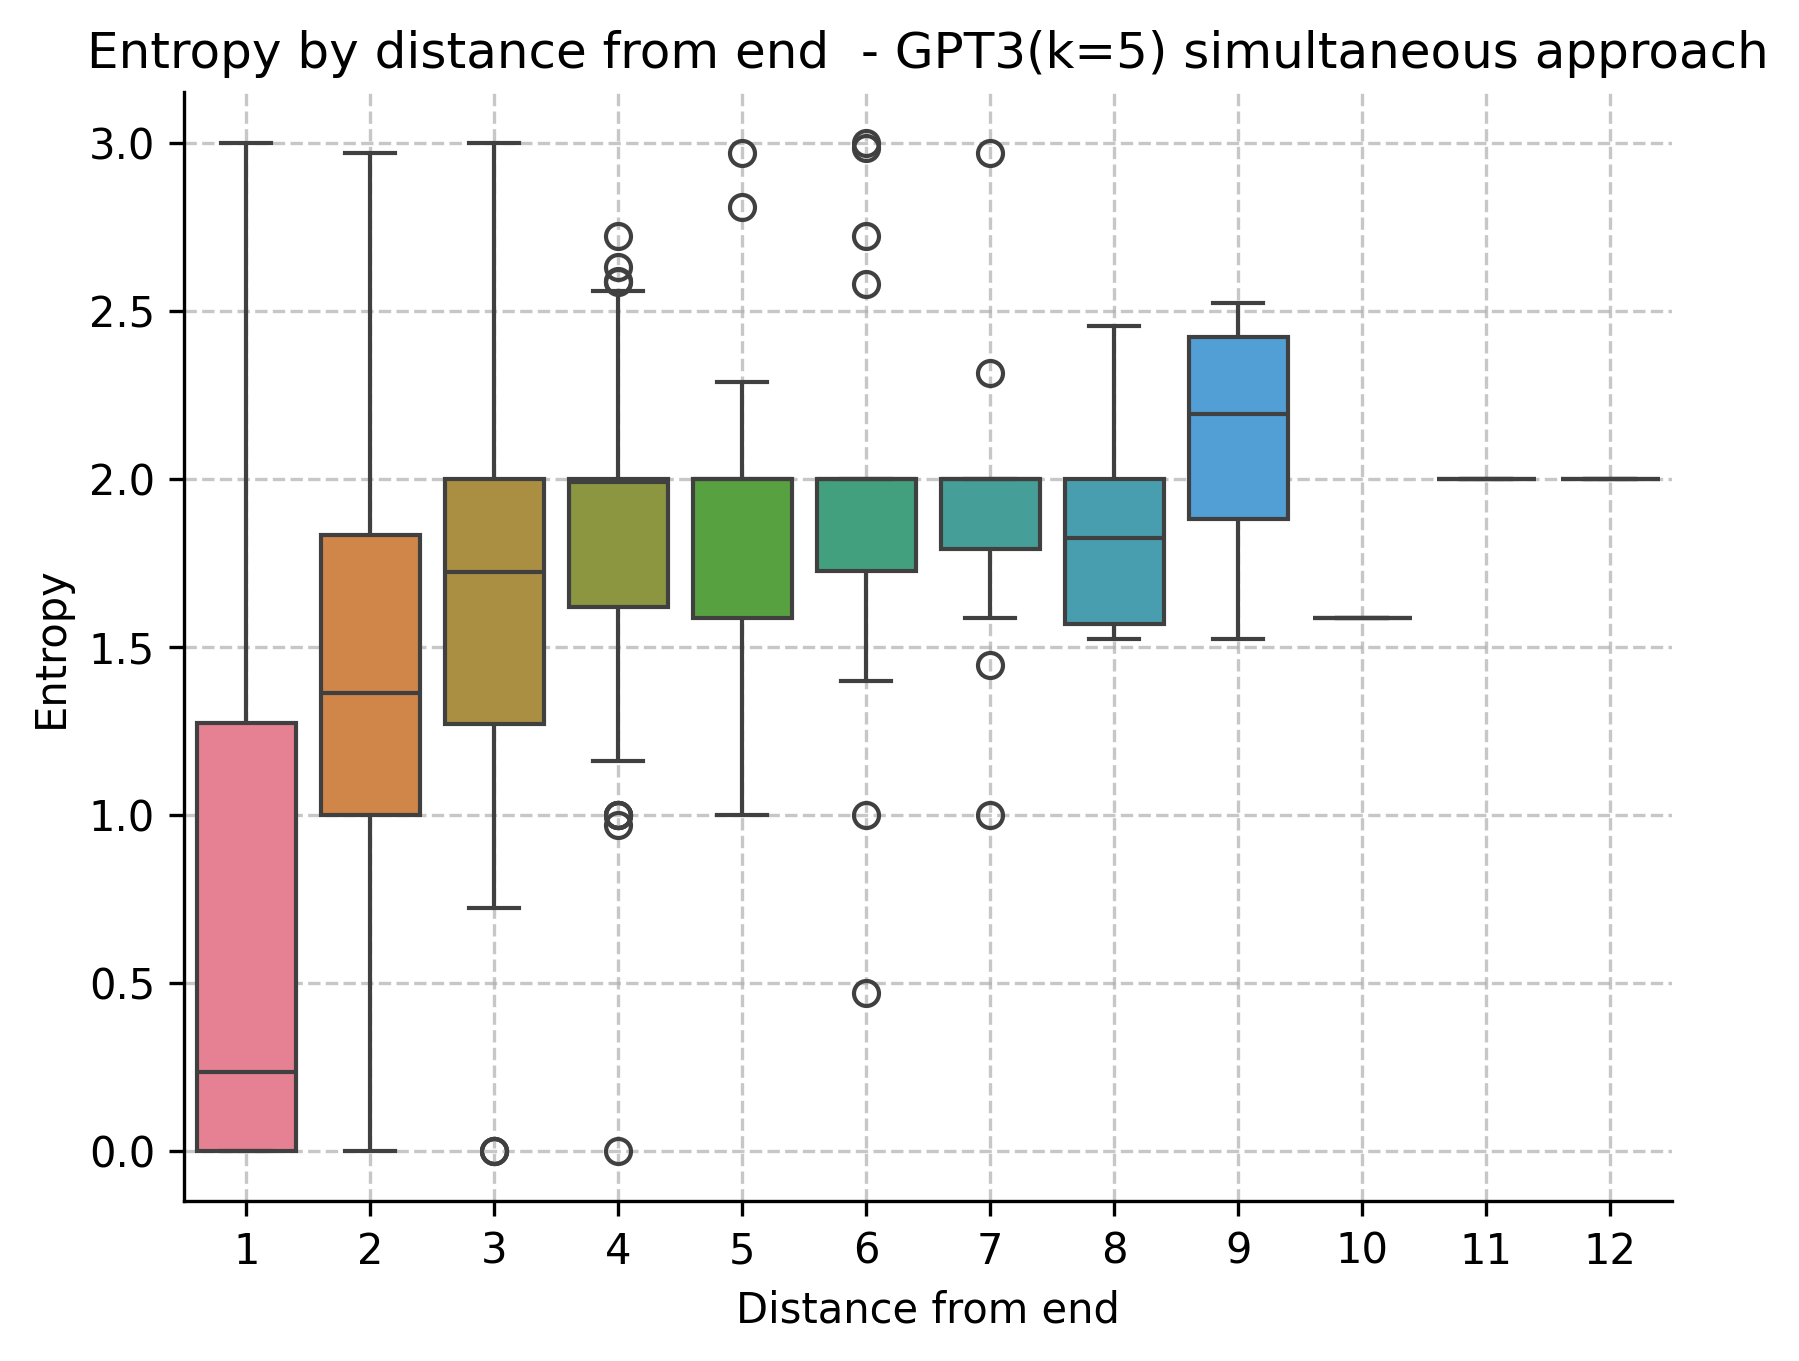

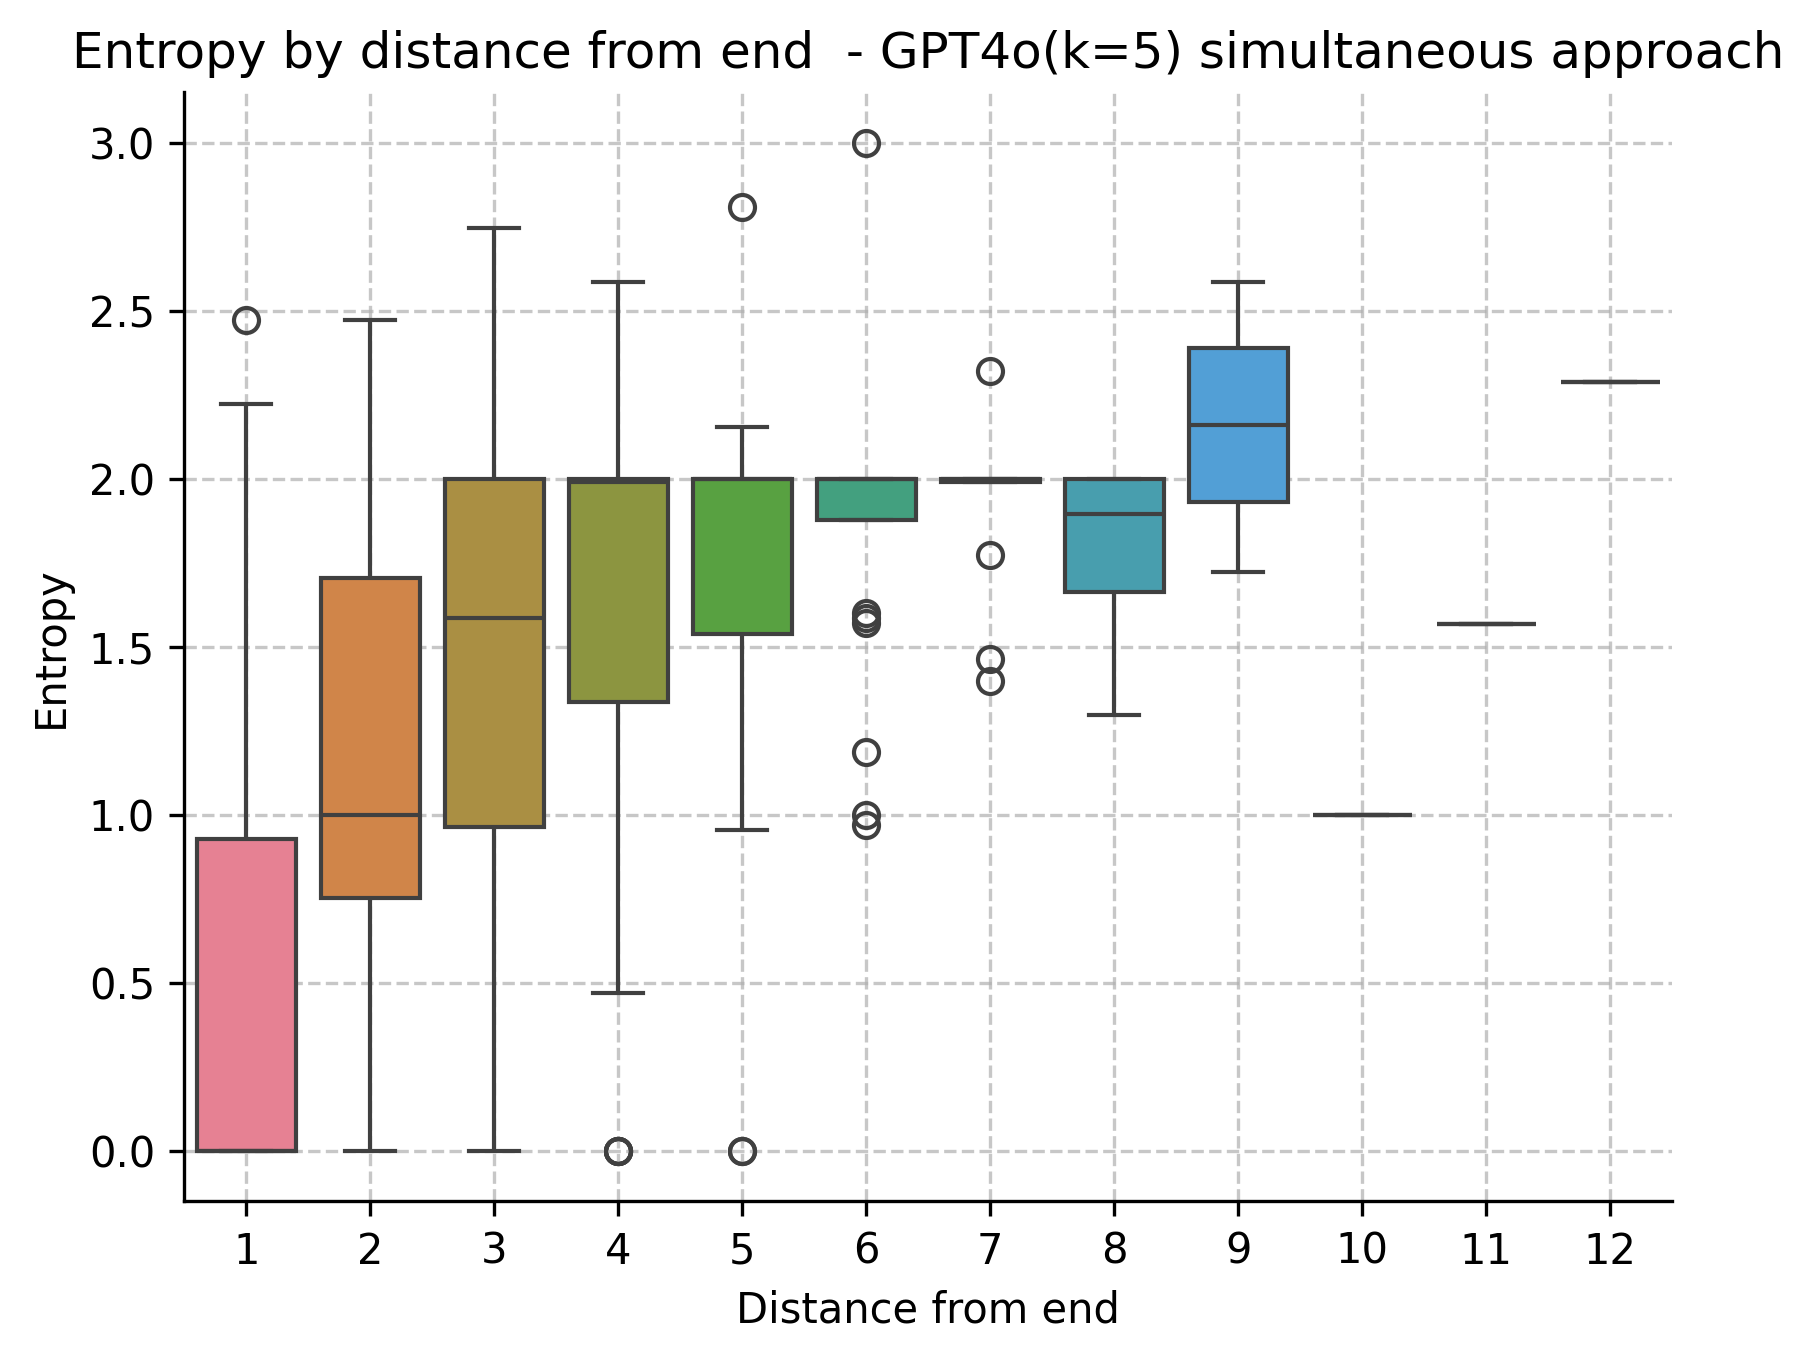

In [138]:
list_entropies = [five_entropies_2_gpt3, five_entropies_2_gpt4]
labels = ['GPT3(k=5) simultaneous approach', 'GPT4o(k=5) simultaneous approach']
for i, entropies in enumerate(list_entropies):
    entropies_by_distances = []
    for _ in range(0, max_dialogue_length, 1):
        entropies_by_distances.append([])

    for dialogue_entropy in entropies.values():
        dialogue_length = len(dialogue_entropy)
        for step_index, step_entropy in enumerate(dialogue_entropy):
            distance_from_end = dialogue_length - step_index - 1
            entropies_by_distances[distance_from_end].append(step_entropy)

    # print(entropies_by_distances[0])
    # Creiamo il box plot usando seaborn
    plt.figure(dpi=300)
    sns.boxplot(data=entropies_by_distances)

    # Modifichiamo le etichette dell'asse x per partire da 1
    plt.xlabel('Distance from end')
    plt.ylabel('Entropy')
    plt.title(f'Entropy by distance from end  - {labels[i]}')

    # Impostiamo i tick dell'asse x per partire da 1 invece che da 0
    plt.xticks(ticks=range(len(entropies_by_distances)), labels=range(1, len(entropies_by_distances) + 1))

    # Miglioriamo l'estetica generale del grafico
    sns.despine()  # Rimuove le spine del grafico per un aspetto più pulito
    plt.grid(True, linestyle='--', alpha=0.7)  # Aggiunge una griglia per una migliore leggibilità

    # Mostriamo il grafico
    plt.show()

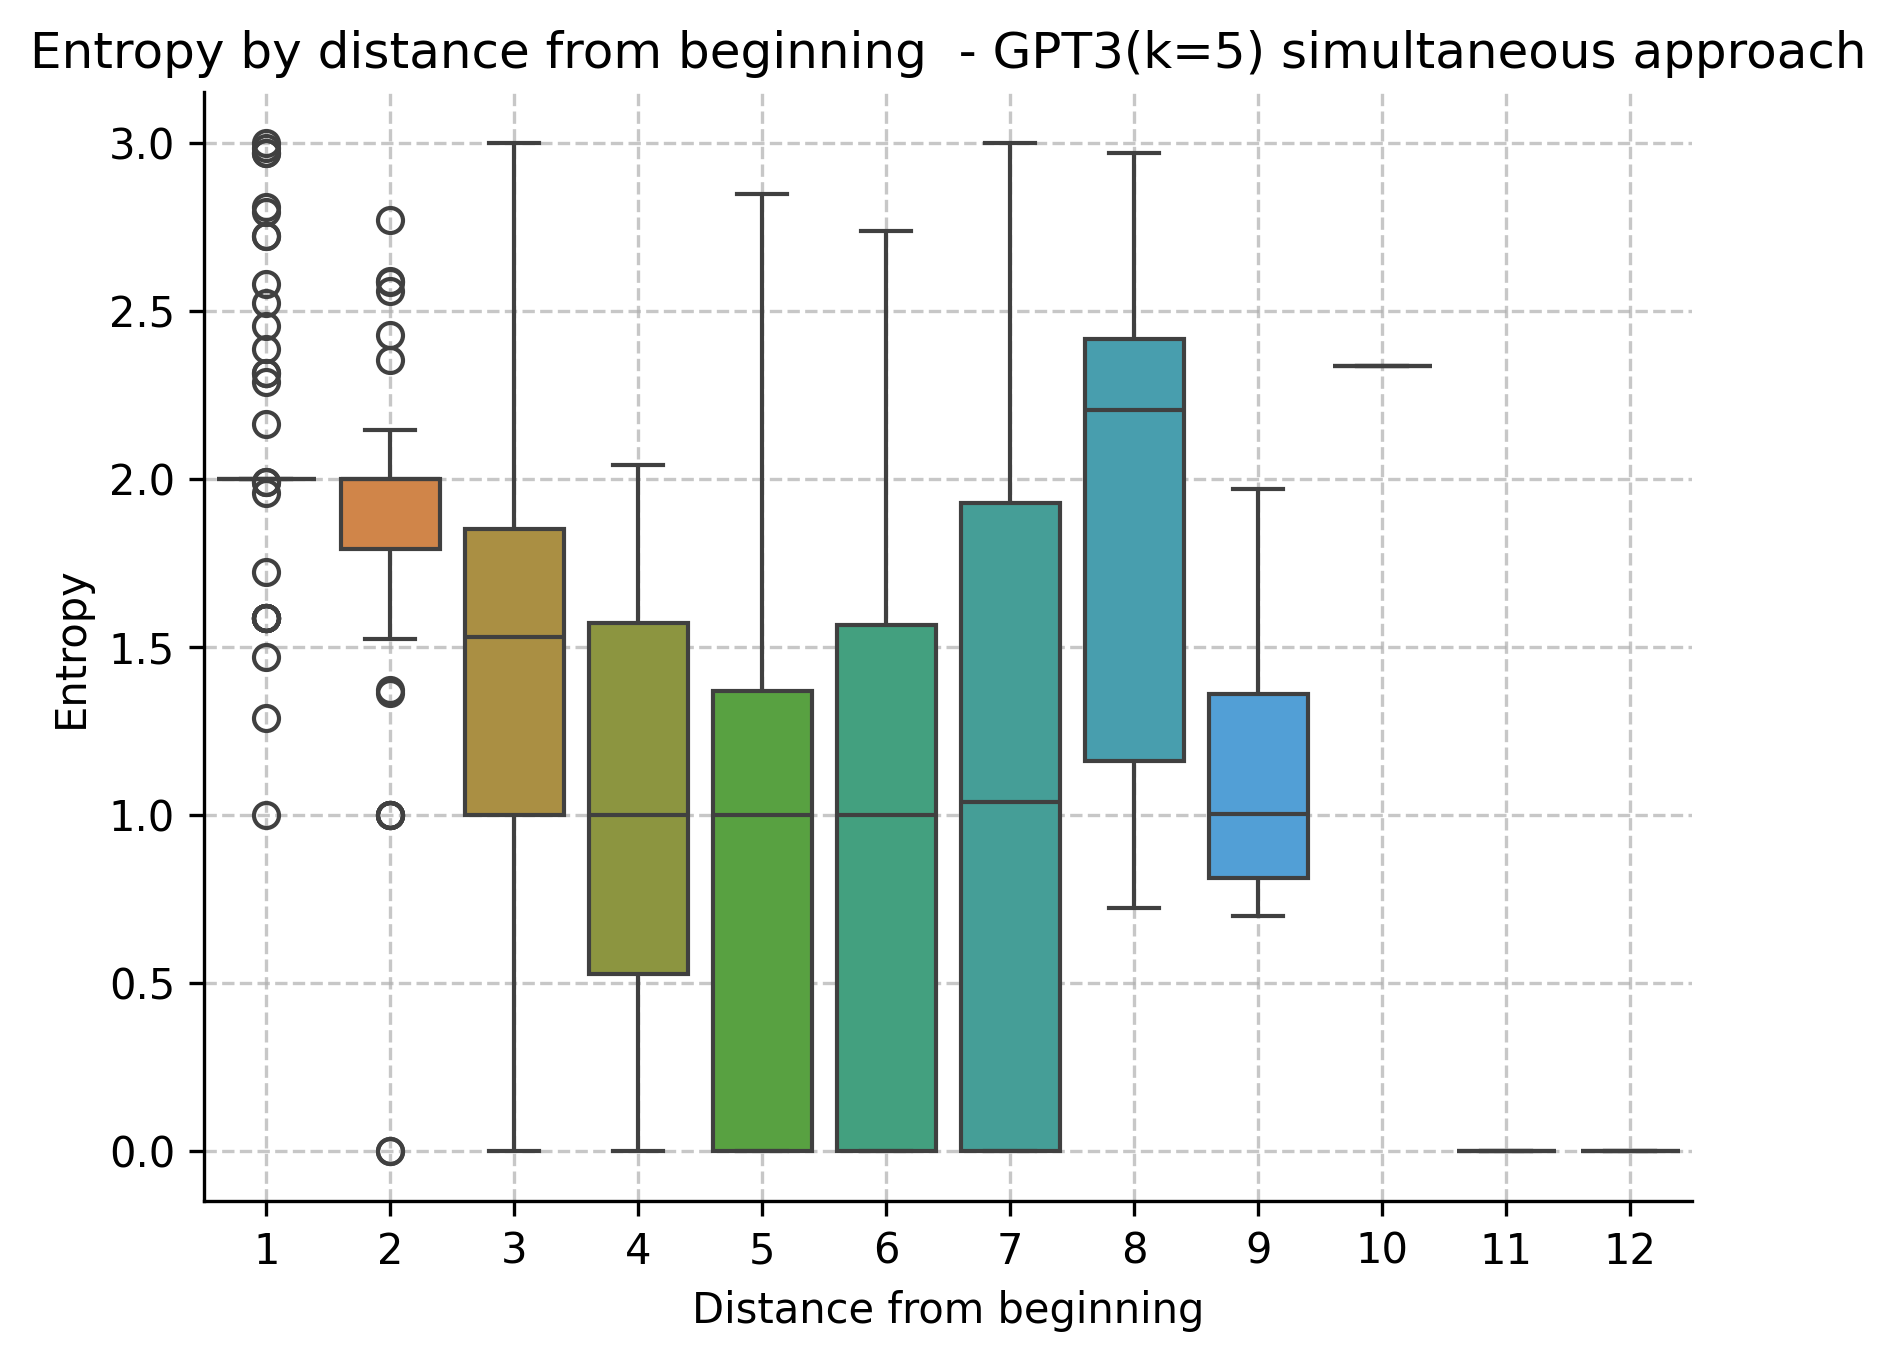

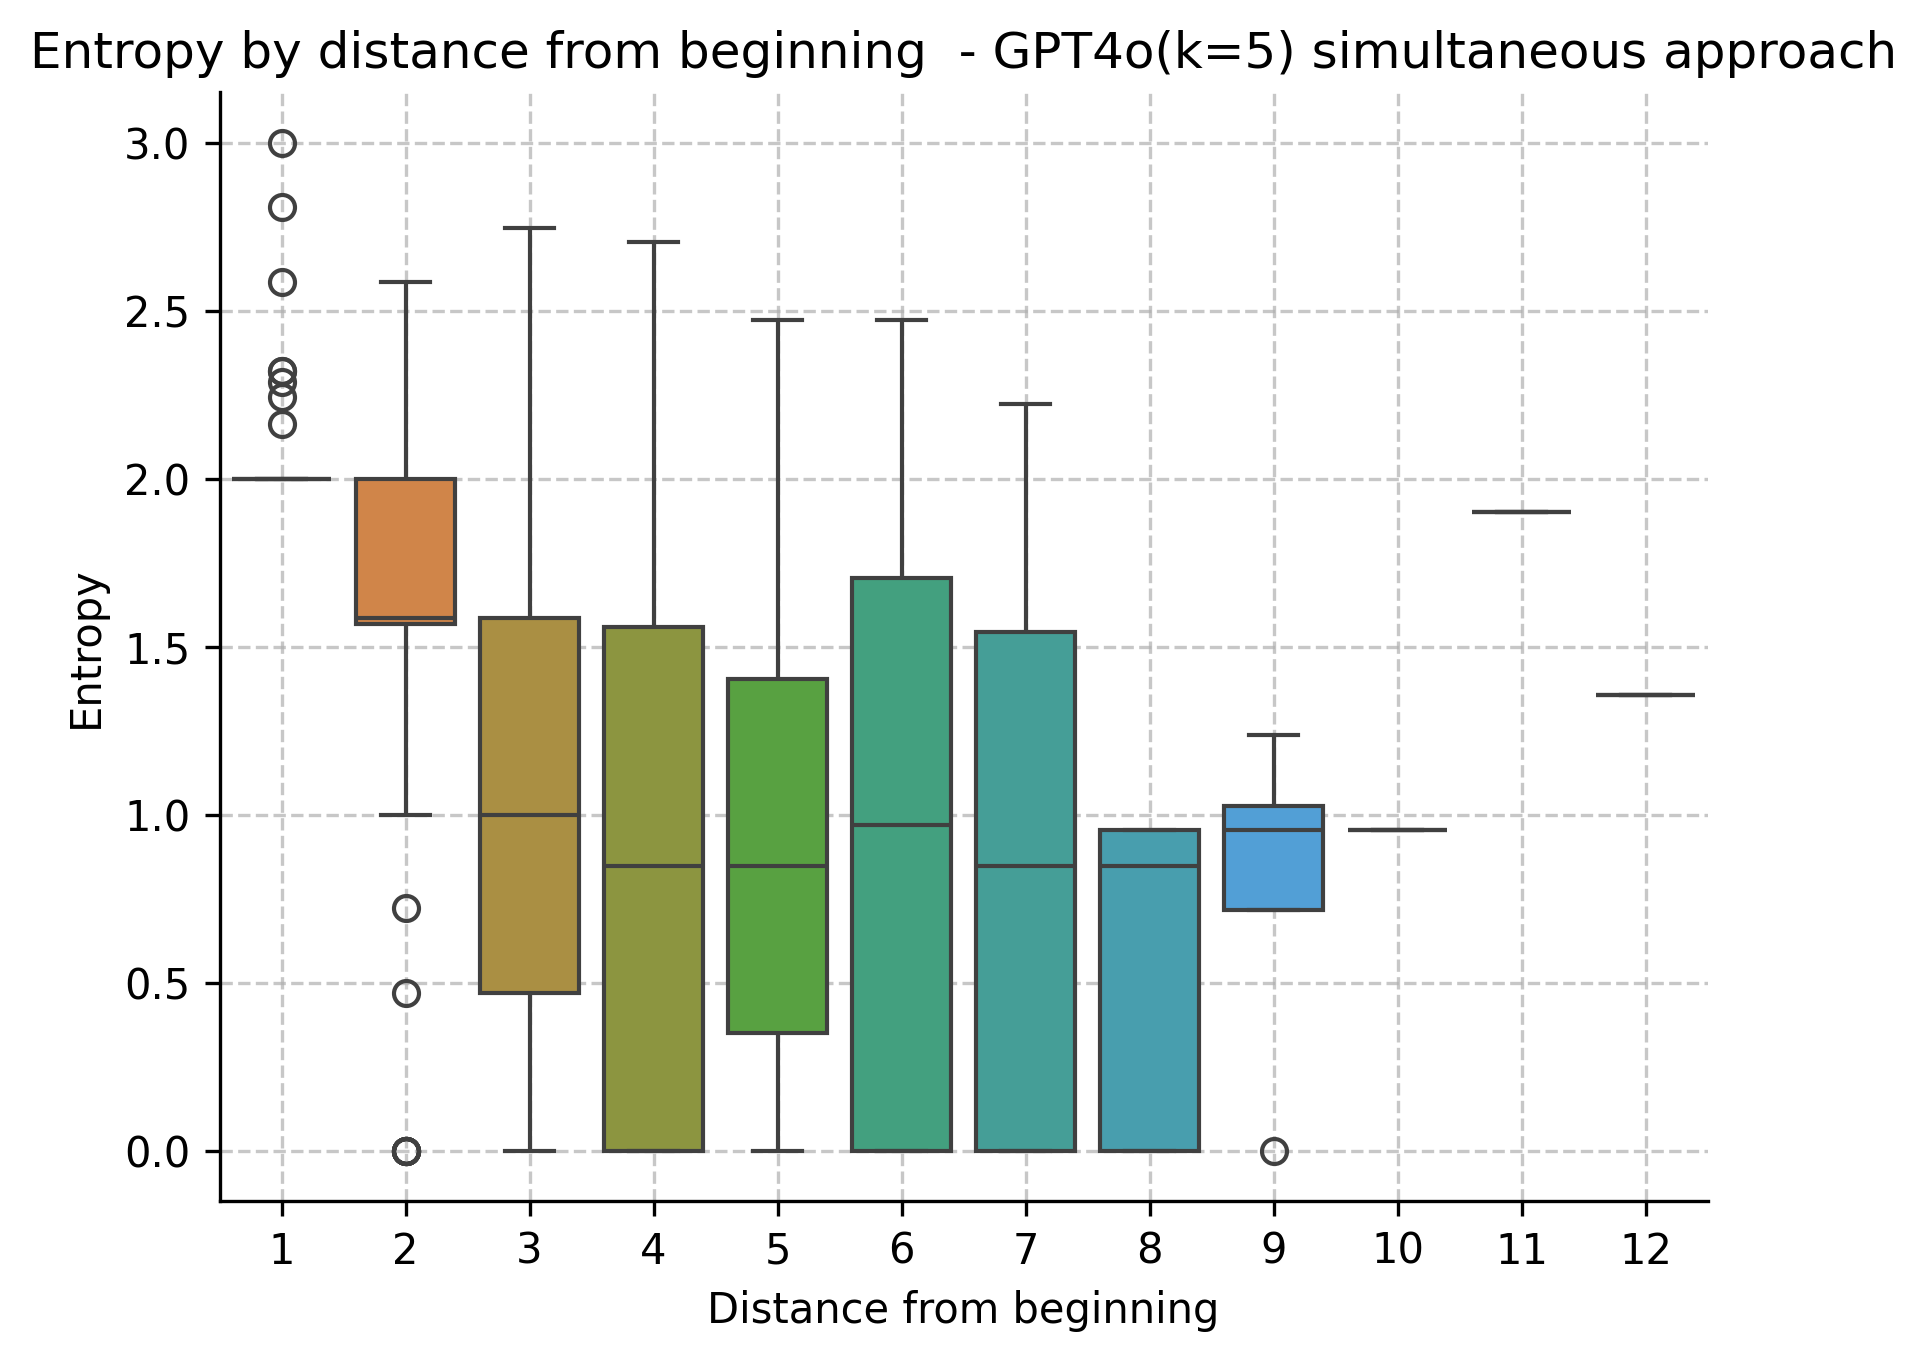

In [139]:
for i, entropies in enumerate(list_entropies):
    entropies_by_distances = []
    for _ in range(0, max_dialogue_length, 1):
        entropies_by_distances.append([])

    for dialogue_entropy in entropies.values():
        for step_index, step_entropy in enumerate(dialogue_entropy):
            # filter invalid entropy values
            if step_entropy != -1.0:
                entropies_by_distances[step_index].append(step_entropy)

    # print(entropies_by_distances[0])
    # Creiamo il box plot usando seaborn
    plt.figure(dpi=300)
    sns.boxplot(data=entropies_by_distances)

    # Modifichiamo le etichette dell'asse x per partire da 1
    plt.xlabel('Distance from beginning')
    plt.ylabel('Entropy')
    plt.title(f'Entropy by distance from beginning  - {labels[i]}')

    # Impostiamo i tick dell'asse x per partire da 1 invece che da 0
    plt.xticks(ticks=range(len(entropies_by_distances)), labels=range(1, len(entropies_by_distances) + 1))

    # Miglioriamo l'estetica generale del grafico
    sns.despine()  # Rimuove le spine del grafico per un aspetto più pulito
    plt.grid(True, linestyle='--', alpha=0.7)  # Aggiunge una griglia per una migliore leggibilità

    # Mostriamo il grafico
    plt.show()

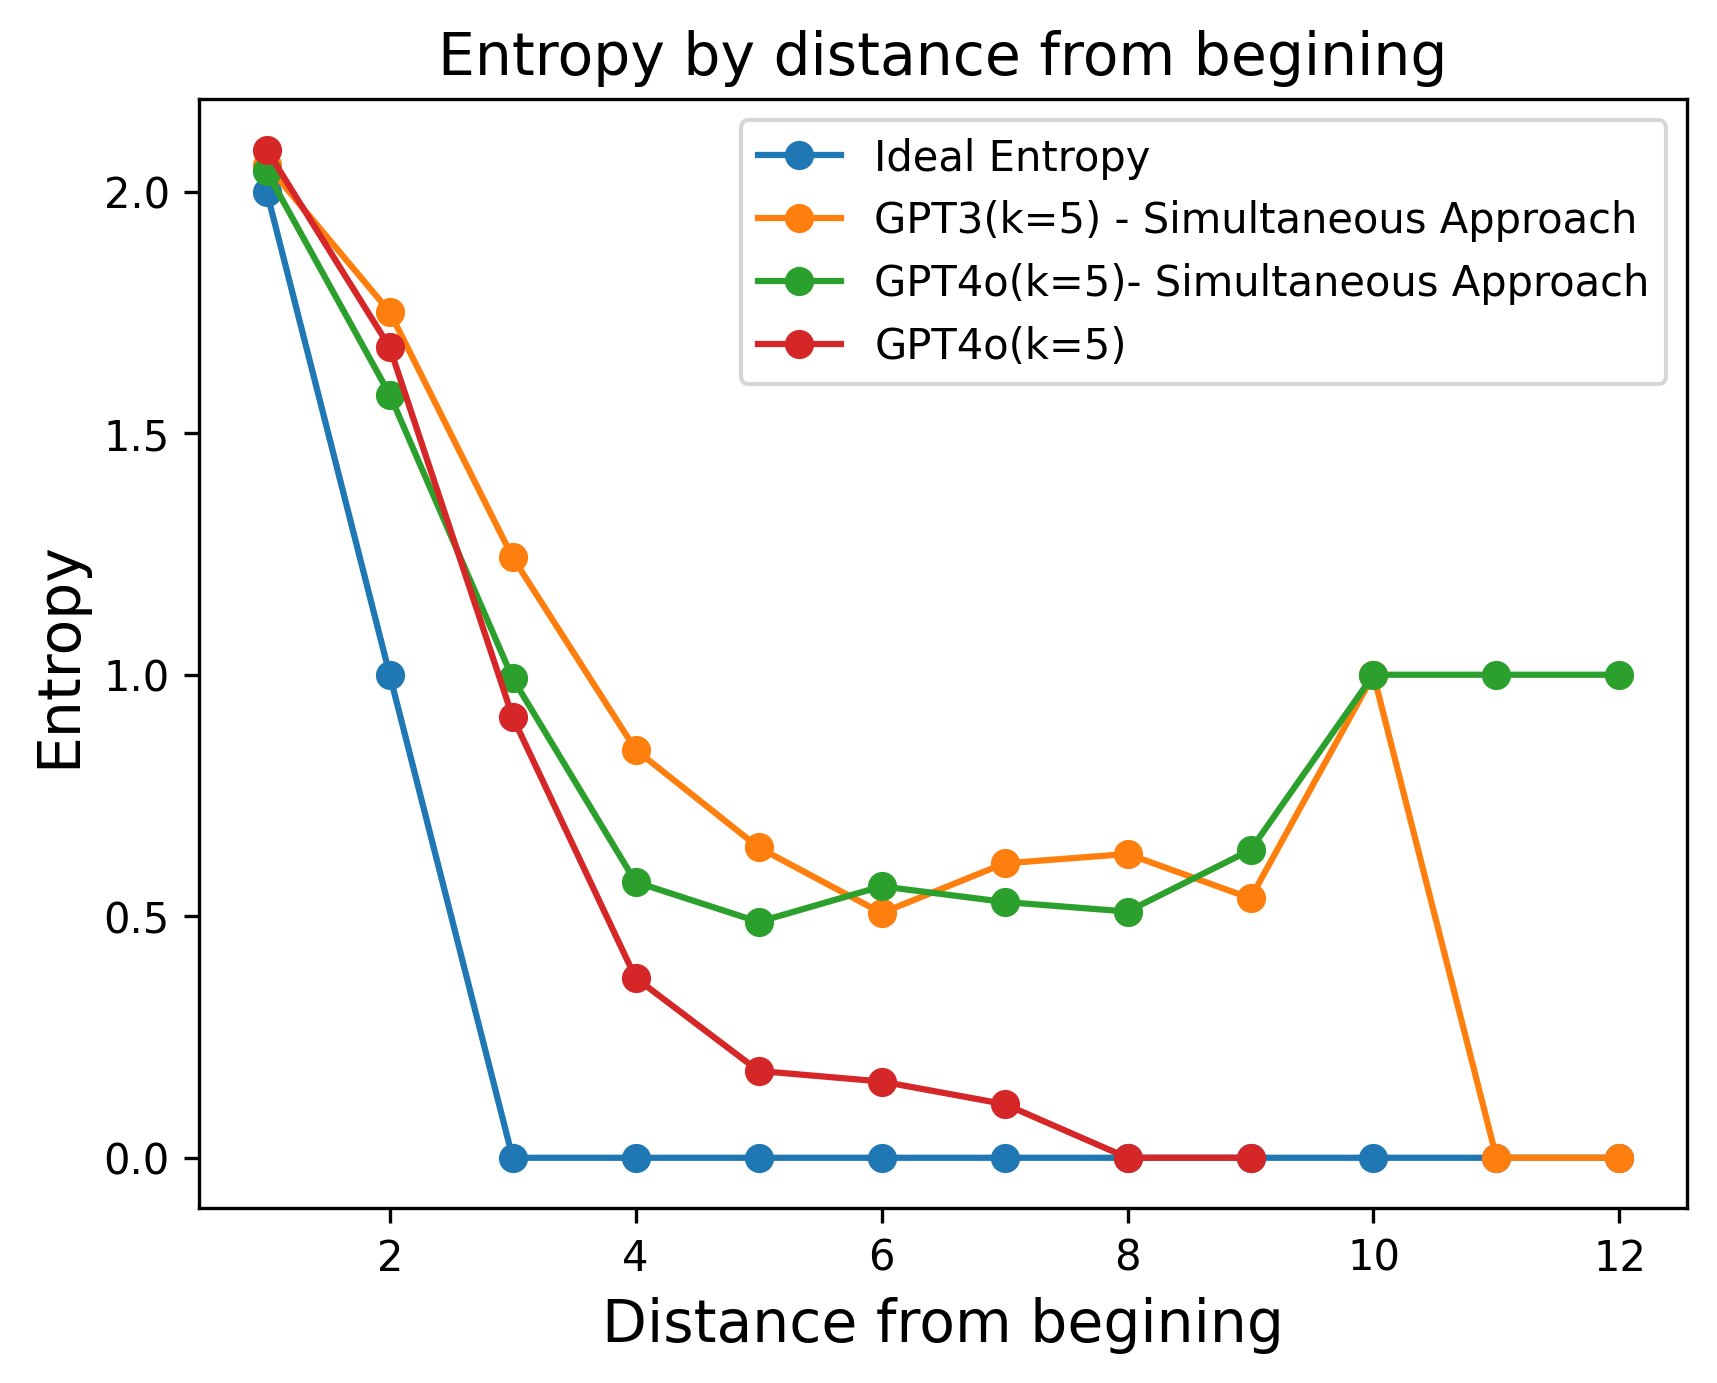

In [75]:
x_values_v_c = range(1, max_dialogue_length + 1)

plt.figure(dpi=300)
plt.plot(x_values_v_c, dic_entropies_op_by_distances_beginnig.values(),  marker = 'o')
plt.plot(x_values_v_c, five_mean_gpt3_begining_v_c,  marker = 'o')
plt.plot(x_values_v_c, five_mean_gpt4_begining_v_c,  marker = 'o')
plt.plot(x_values_v_c, k_five_mean_gpt4_begining,  marker = 'o')
plt.xlabel('Distance from begining', fontsize=14)
plt.ylabel('Entropy', fontsize=14)
plt.title('Entropy by distance from begining', fontsize=14)
plt.legend(['Ideal Entropy', 'GPT3(k=5) - Simultaneous Approach', 'GPT4o(k=5)- Simultaneous Approach', 'GPT4o(k=5)'])

Text(0.5, 1.0, 'Entropy by distance from beginning - comparison two state estimation approaches')

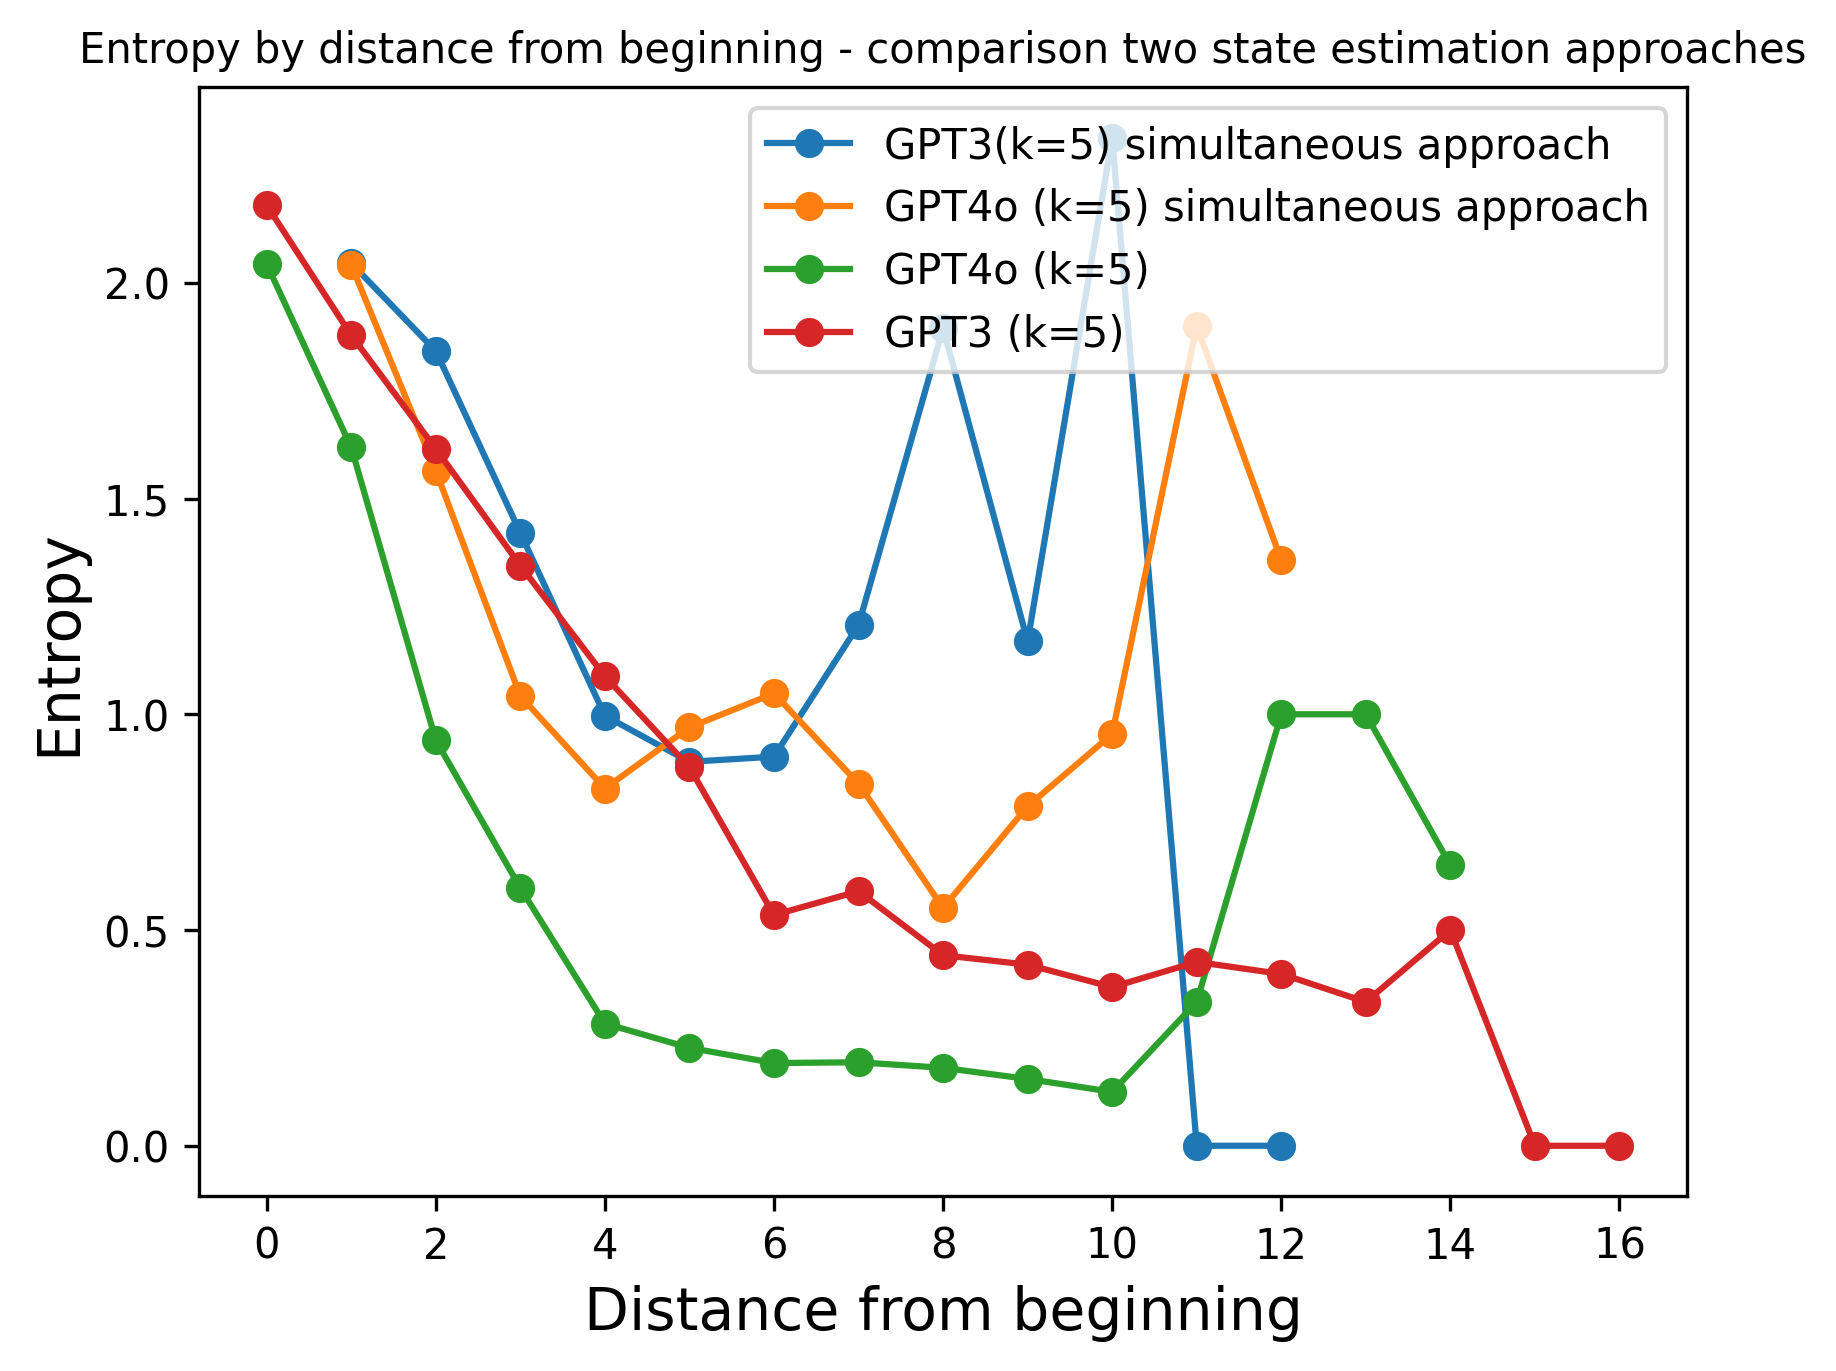

In [132]:
#  comparison two state estimation approaches beginning
plt.figure(dpi=300)
plt.plot(x_values_v_c, five_mean_gpt3_begining_v_c,  marker = 'o')
plt.plot(x_values_v_c, five_mean_gpt4_begining_v_c,  marker = 'o')
plt.plot(five_mean_gpt40,  marker = 'o')
plt.plot(five_mean_gpt3,  marker = 'o') 
plt.xlabel('Distance from beginning', fontsize=14)
plt.ylabel('Entropy', fontsize=14)
plt.legend(['GPT3(k=5) simultaneous approach', 'GPT4o (k=5) simultaneous approach', 'GPT4o (k=5)', 'GPT3 (k=5)'])
plt.title('Entropy by distance from beginning - comparison two state estimation approaches', fontsize=10)

Counter({7: 23, 5: 12, 6: 10, 4: 8, 8: 7, 9: 7, 11: 6, 10: 4, 3: 3, 13: 2, 12: 2, 14: 1, 17: 1, 16: 1})


Text(0.5, 1.0, 'Number of dialogues by length')

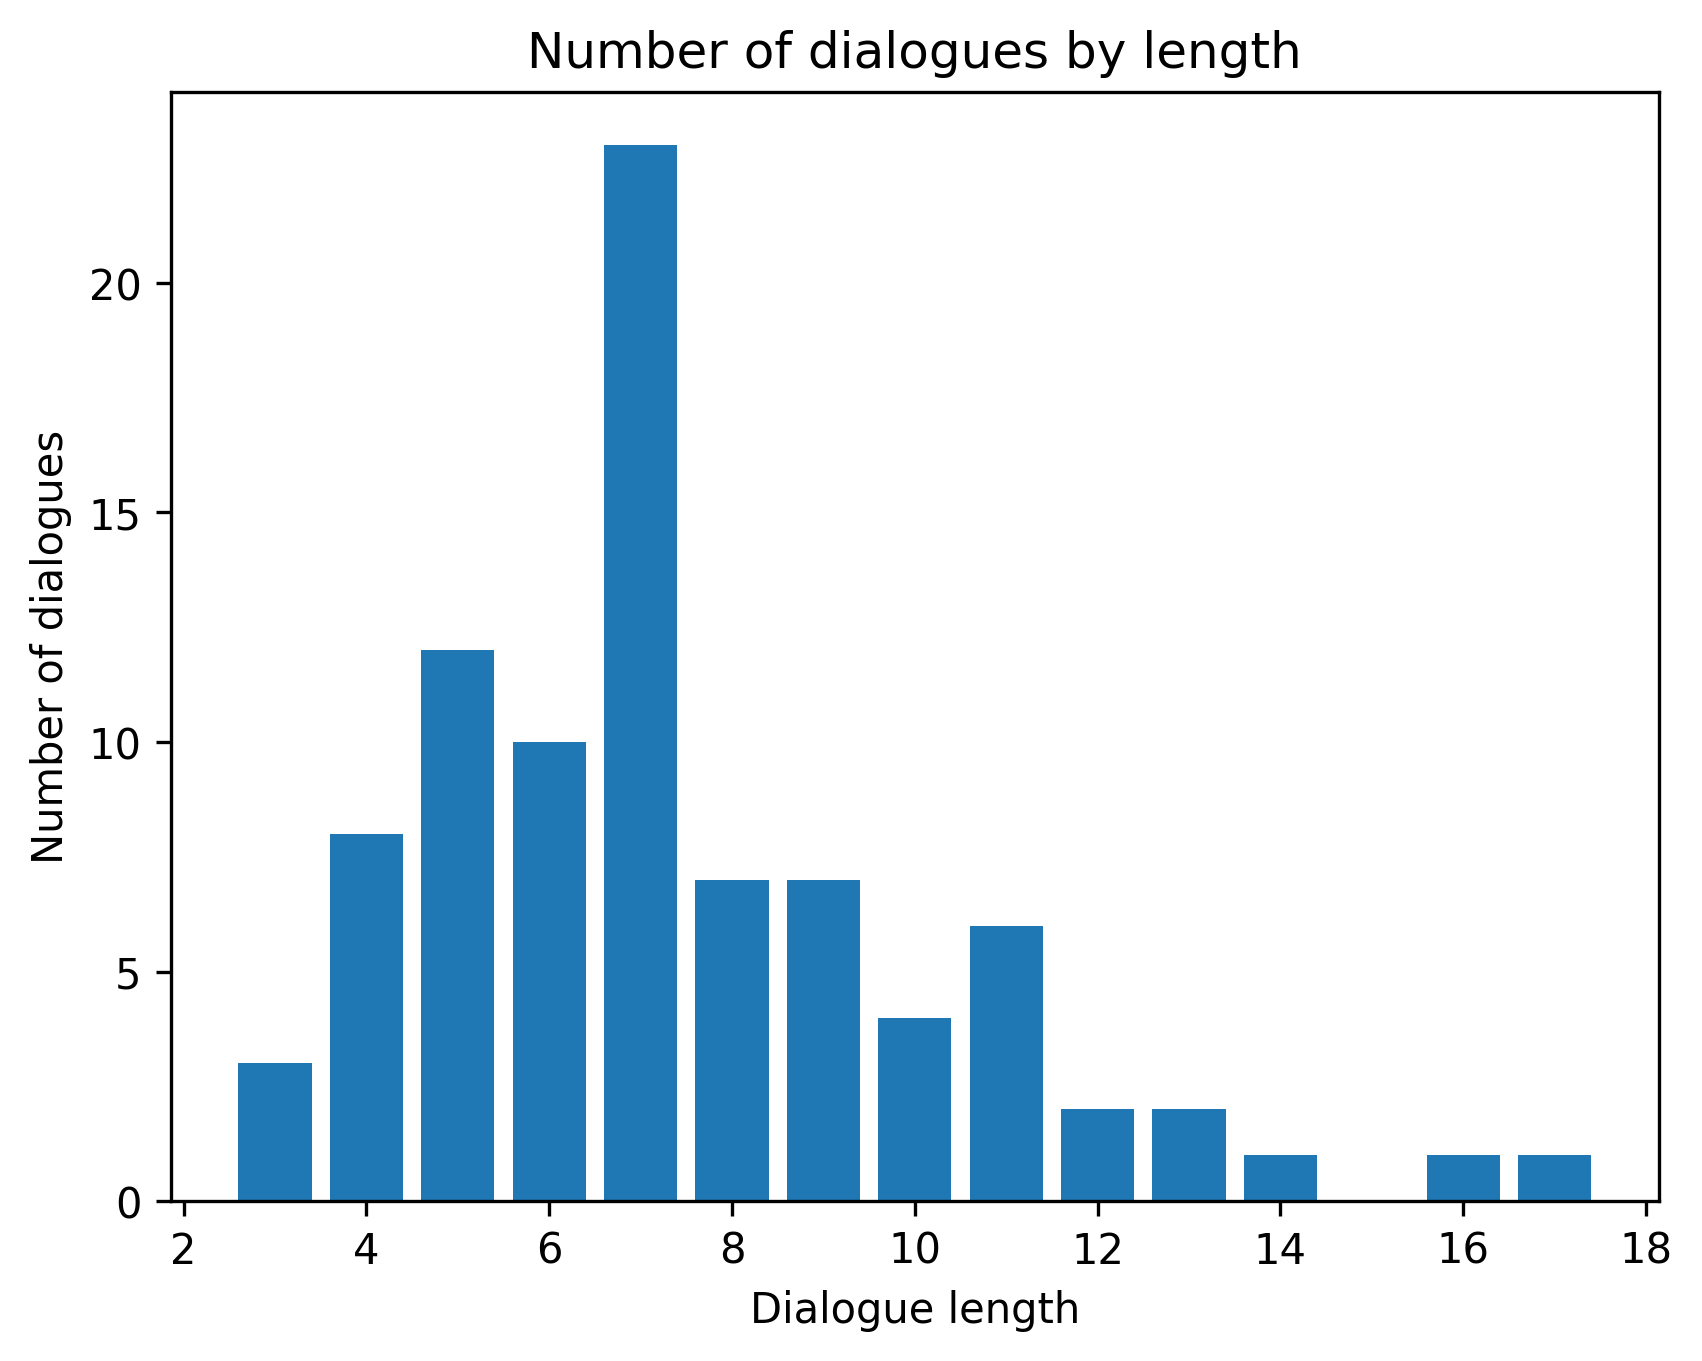

In [14]:
dialogue_lengths = [len(dialogue["intra_dialogues"]) for dialogue in five_data]
counter = Counter(dialogue_lengths)
print(counter)

# display counter in a bar plot
plt.figure(dpi=300)
plt.bar(counter.keys(), counter.values())
plt.xlabel('Dialogue length')
plt.ylabel('Number of dialogues')
plt.title('Number of dialogues by length')

## Resurected

In [22]:
five_samples_sbs_data_path = "./data/generation/8_mcrae/dialogues_sbs_k_five_distr_ver2.csv"
ten_samples_sbs_data_path = "./data/generation/8_mcrae/dialogues_sbs_k_ten_distr_ver2.csv"
twenty_samples_sbs_data_path = "./data/generation/8_mcrae/dialogues_sbs_k_twenty_distr.csv"
five_gpt4o_samples_sbs_data_path = "./data/generation/8_mcrae/dialogues_sbs_k_five_gpt4o.csv"
ten_gpt4o_samples_sbs_data_path = "./data/generation/8_mcrae/dialogues_sbs_k_ten_gpt4o.csv"

# grouping row together by dialogue id

five_rf = open(five_samples_sbs_data_path, 'r', newline='')
five_reader = csv.DictReader(five_rf, delimiter=",")
five_data = group_sbs_data_by_dialogue_id(five_reader)

ten_rf = open(ten_samples_sbs_data_path, 'r', newline='')
ten_reader = csv.DictReader(ten_rf, delimiter=",")
ten_data = group_sbs_data_by_dialogue_id(ten_reader)

twenty_rf = open(twenty_samples_sbs_data_path, 'r', newline='')
twenty_reader = csv.DictReader(twenty_rf, delimiter=",")
twenty_data = group_sbs_data_by_dialogue_id(twenty_reader)

five_gpt4o_rf = open(five_gpt4o_samples_sbs_data_path, 'r', newline='')
five_gpt4o_reader = csv.DictReader(five_gpt4o_rf, delimiter=",")
five_gpt4o_data = group_sbs_data_by_dialogue_id(five_gpt4o_reader)

ten_gpt4o_rf = open(ten_gpt4o_samples_sbs_data_path, 'r', newline='')
ten_gpt4o_reader = csv.DictReader(ten_gpt4o_rf, delimiter=",")
ten_gpt4o_data = group_sbs_data_by_dialogue_id(ten_gpt4o_reader)

In [67]:
def compute_resurrected_items_p_sum(grouped_data):
  p_summatory = 0
  counter = 0
  for dialogue_id, dialogue in enumerate(grouped_data):
    #print("DIALOGUE: , ", dialogue["dialogue_id"])
    intra_dialogues = dialogue["intra_dialogues"]
    for i in range(0, len(dialogue["intra_dialogues"])):
      resurrected_items = []
      resurrected_p = 0
      
      if(i != 0):
        current_distr = intra_dialogues[i]["p_distribuition"]
        previous_distr = intra_dialogues[i-1]["p_distribuition"]
        
        # finding resurrected items
        for item in list(current_distr.keys()):
          if(previous_distr[item] == 0 and current_distr[item] > previous_distr[item]):
            resurrected_items.append(item)
        
        for item in resurrected_items:
          resurrected_p += current_distr[item]
          
        p_summatory += resurrected_p
        counter += 1
        
      grouped_data[dialogue_id]["intra_dialogues"][i]["resurrected_items"] = resurrected_items
      grouped_data[dialogue_id]["intra_dialogues"][i]["resurrected_items_p"] = resurrected_p
  
  resurrected_p_average = p_summatory / counter
  
  return grouped_data, resurrected_p_average

five_analyzed_data, five_r_p_average = compute_resurrected_items_p_sum(five_data)
ten_analyzed_data, ten_r_p_average = compute_resurrected_items_p_sum(ten_data)
twenty_analyzed_data, twenty_r_p_average = compute_resurrected_items_p_sum(twenty_data)
five_gpt4o_analyzed_data, five_gpt4o_r_p_average = compute_resurrected_items_p_sum(five_gpt4o_data)
ten_gpt4o_analyzed_data, ten_gpt4o_r_p_average = compute_resurrected_items_p_sum(ten_gpt4o_data)
print("Resurrected avg GPT3 (k=5, k=10, k=20): ", five_r_p_average, ten_r_p_average, twenty_r_p_average)
print("Resurrected avg GPT4o (k=5, k=10): ", five_gpt4o_r_p_average, ten_gpt4o_r_p_average)

Resurrected avg GPT3 (k=5, k=10, k=20):  0.11246965888689413 0.09104739676840211 0.07166732495511678
Resurrected avg GPT4o (k=5, k=10):  0.046403590664272895 0.05322728904847397


[0, 0, 8, 7, 24, 44, 94, 24, 50, 23, 41, 17, 33, 8, 0, 11, 16]
[0, 0, 9, 9, 29, 40, 87, 26, 47, 28, 43, 16, 28, 9, 0, 13, 20]
[0, 0, 9, 9, 36, 38, 79, 26, 48, 28, 37, 14, 30, 10, 0, 13, 15]
[0, 0, 0, 1, 2, 5, 15, 3, 9, 3, 2, 1, 6, 0, 0, 1, 0]
[0, 0, 0, 1, 2, 4, 20, 3, 9, 2, 8, 1, 6, 0, 0, 0, 2]


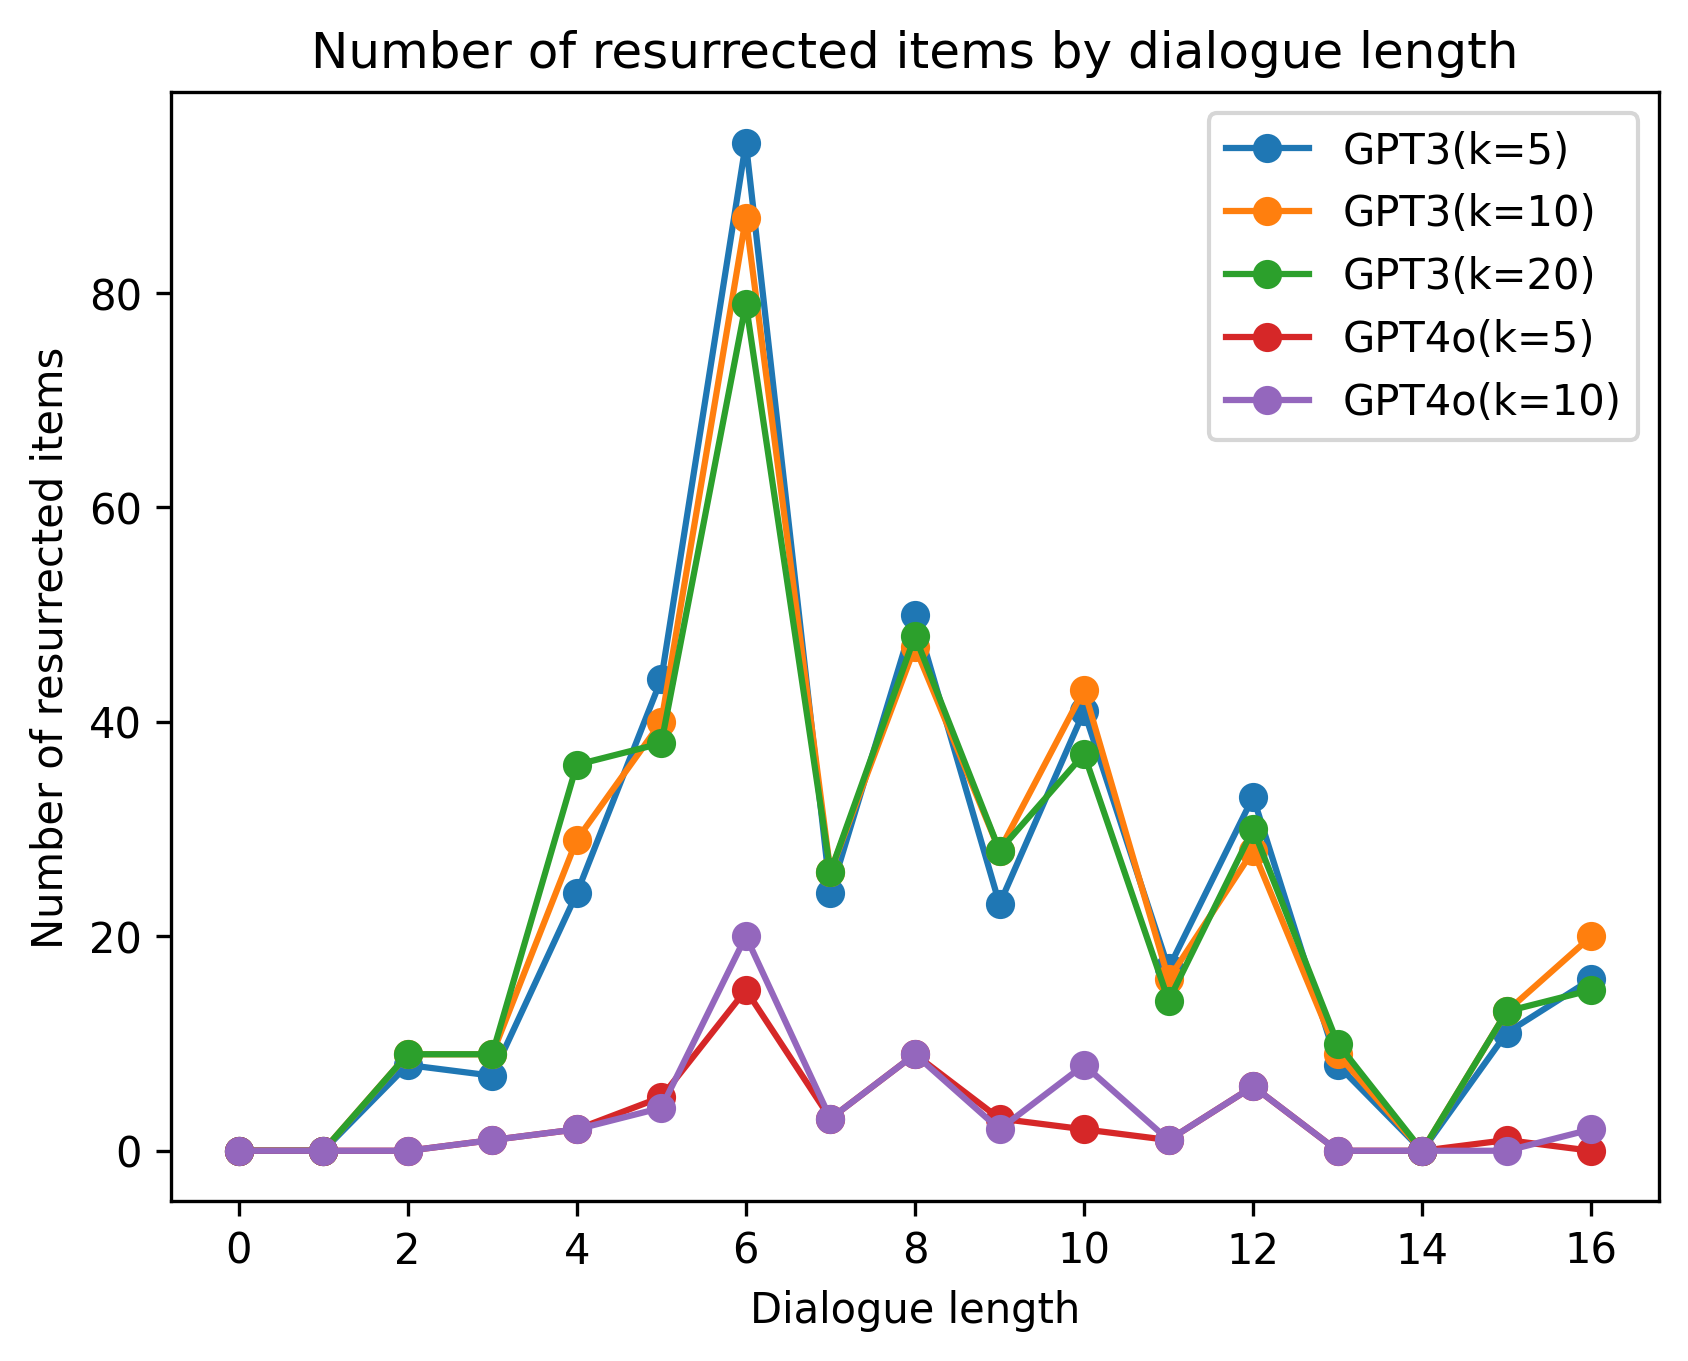

In [54]:
def resurected_items_length(grouped_data):
  resurected_items_by_lengt = []
  for _ in range(0, max_dialogue_length, 1):
    resurected_items_by_lengt.append(0)
  
  for dialogue in grouped_data:
    dialogue_id = dialogue["dialogue_id"]
    intra_dialogues = dialogue["intra_dialogues"]
    for step in intra_dialogues:
      resurected_items_by_lengt[len(intra_dialogues)-1] += len(step['resurrected_items'])
  print(resurected_items_by_lengt)
  return resurected_items_by_lengt

resurected_items_five_gpt3 = resurected_items_length(five_analyzed_data)
resurected_items_ten_gpt3 = resurected_items_length(ten_analyzed_data)
resurected_items_twenty_gpt3 = resurected_items_length(twenty_analyzed_data)
resurected_items_five_gpt4o = resurected_items_length(five_gpt4o_analyzed_data)
resurected_items_ten_gpt4o = resurected_items_length(ten_gpt4o_analyzed_data)

plt.figure(dpi=300)
plt.plot(resurected_items_five_gpt3, marker = 'o')
plt.plot(resurected_items_ten_gpt3, marker = 'o')
plt.plot(resurected_items_twenty_gpt3, marker = 'o')
plt.plot(resurected_items_five_gpt4o, marker = 'o')
plt.plot(resurected_items_ten_gpt4o, marker = 'o')
plt.xlabel('Dialogue length')
plt.ylabel('Number of resurrected items')
plt.title('Number of resurrected items by dialogue length')
plt.legend(['GPT3(k=5)', 'GPT3(k=10)', 'GPT3(k=20)', 'GPT4o(k=5)', 'GPT4o(k=10)'])
plt.show()


[0, 0, 0.12302222222222221, 0.027299999999999998, 0.049561666666666664, 0.09048666666666667, 0.08647888198757762, 0.05913214285714286, 0.14861269841269842, 0.09829249999999999, 0.09876818181818181, 0.08345416666666665, 0.3161076923076923, 0.07267142857142857, 0, 0.12026875000000001, 0.12064705882352943]
[0, 0, 0.1036111111111111, 0.02955625, 0.03219, 0.07317, 0.0702888198757764, 0.04256964285714286, 0.10349682539682538, 0.089855, 0.07651363636363637, 0.0678375, 0.2840153846153846, 0.06865, 0, 0.11503750000000001, 0.10791176470588236]
[0, 0, 0.1136777777777778, 0.019084375, 0.039733333333333336, 0.06293333333333333, 0.04527826086956522, 0.03723928571428571, 0.09170634920634922, 0.08047, 0.03911969696969697, 0.047558333333333334, 0.24815384615384614, 0.07345714285714286, 0, 0.10385, 0.052241176470588235]
[0, 0, 0.0, 0.01953125, 0.010740000000000001, 0.02976166666666667, 0.034991925465838514, 0.024582142857142858, 0.10582063492063491, 0.0541675, 0.02020151515151515, 0.041666666666666664, 

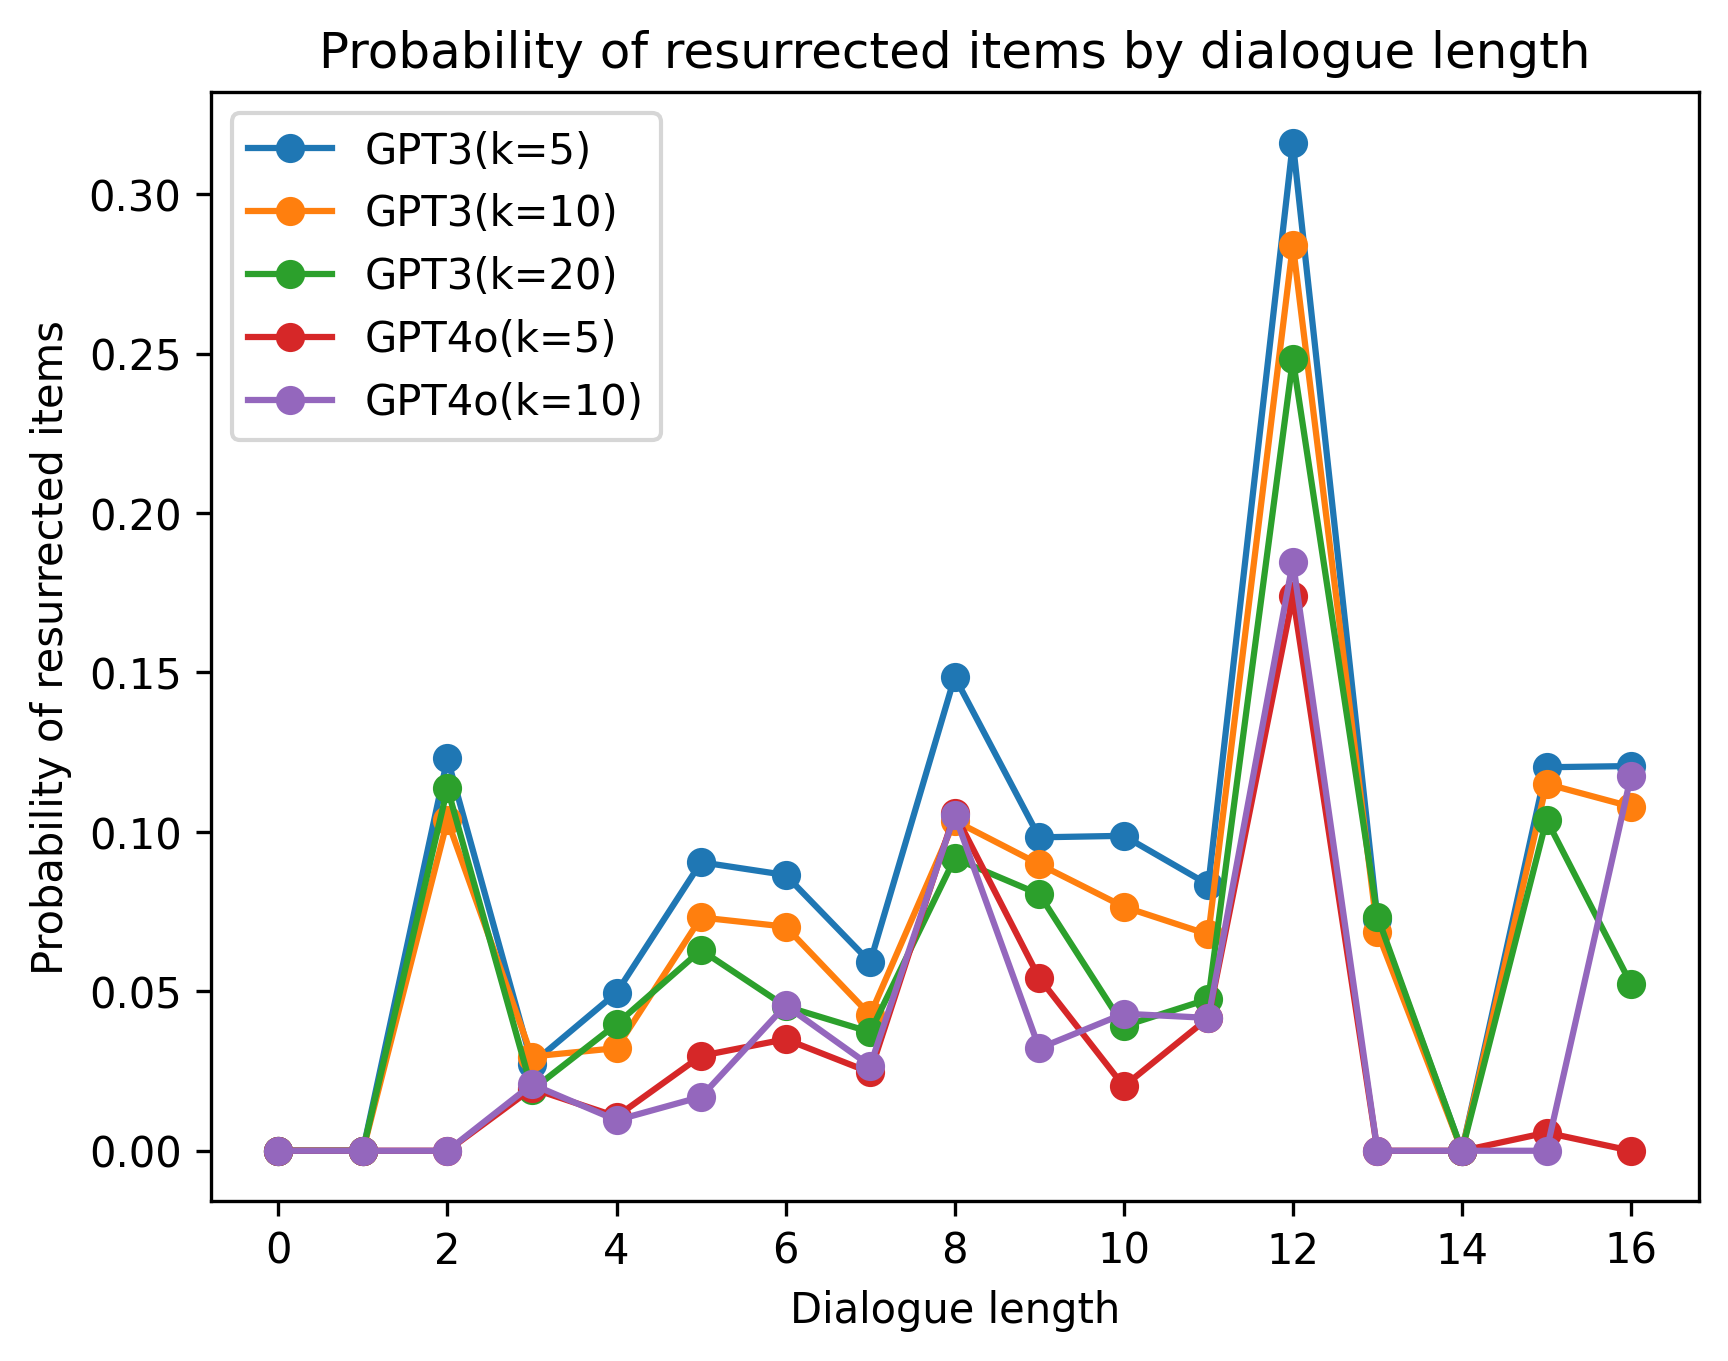

In [75]:
def prob_resurected_items_length(grouped_data):
  resurected_items_by_lengt = []
  counter = []
  for _ in range(0, max_dialogue_length, 1):
    resurected_items_by_lengt.append(0)
    counter.append(0)
  
  for dialogue in grouped_data:
    dialogue_id = dialogue["dialogue_id"]
    intra_dialogues = dialogue["intra_dialogues"]
    for step in intra_dialogues:
      resurected_items_by_lengt[len(intra_dialogues)-1] += step['resurrected_items_p']
      counter[len(intra_dialogues)-1] += 1

  for i in range(len(resurected_items_by_lengt)):
    if counter[i] != 0:
      resurected_items_by_lengt[i] = resurected_items_by_lengt[i] / counter[i]
  print(resurected_items_by_lengt)
  
  return resurected_items_by_lengt

resurected_items_five_gpt3 = prob_resurected_items_length(five_analyzed_data)
resurected_items_ten_gpt3 = prob_resurected_items_length(ten_analyzed_data)
resurected_items_twenty_gpt3 = prob_resurected_items_length(twenty_analyzed_data)
resurected_items_five_gpt4o = prob_resurected_items_length(five_gpt4o_analyzed_data)
resurected_items_ten_gpt4o = prob_resurected_items_length(ten_gpt4o_analyzed_data)

plt.figure(dpi=300)
plt.plot(resurected_items_five_gpt3, marker = 'o')
plt.plot(resurected_items_ten_gpt3, marker = 'o')
plt.plot(resurected_items_twenty_gpt3, marker = 'o')
plt.plot(resurected_items_five_gpt4o, marker = 'o')
plt.plot(resurected_items_ten_gpt4o, marker = 'o')
plt.xlabel('Dialogue length')
plt.ylabel('Probability of resurrected items')
plt.title('Probability of resurrected items by dialogue length')
plt.legend(['GPT3(k=5)', 'GPT3(k=10)', 'GPT3(k=20)', 'GPT4o(k=5)', 'GPT4o(k=10)'])
plt.show()

## Bayesian apocalypse

[0, 0, 0, 0, 0, 0, 8, 2, 9, 6, 4, 0, 11, 2, 0, 1, 10]
[0, 0, 0, 0, 0, 0, 6, 2, 9, 5, 3, 1, 11, 2, 0, 0, 7]


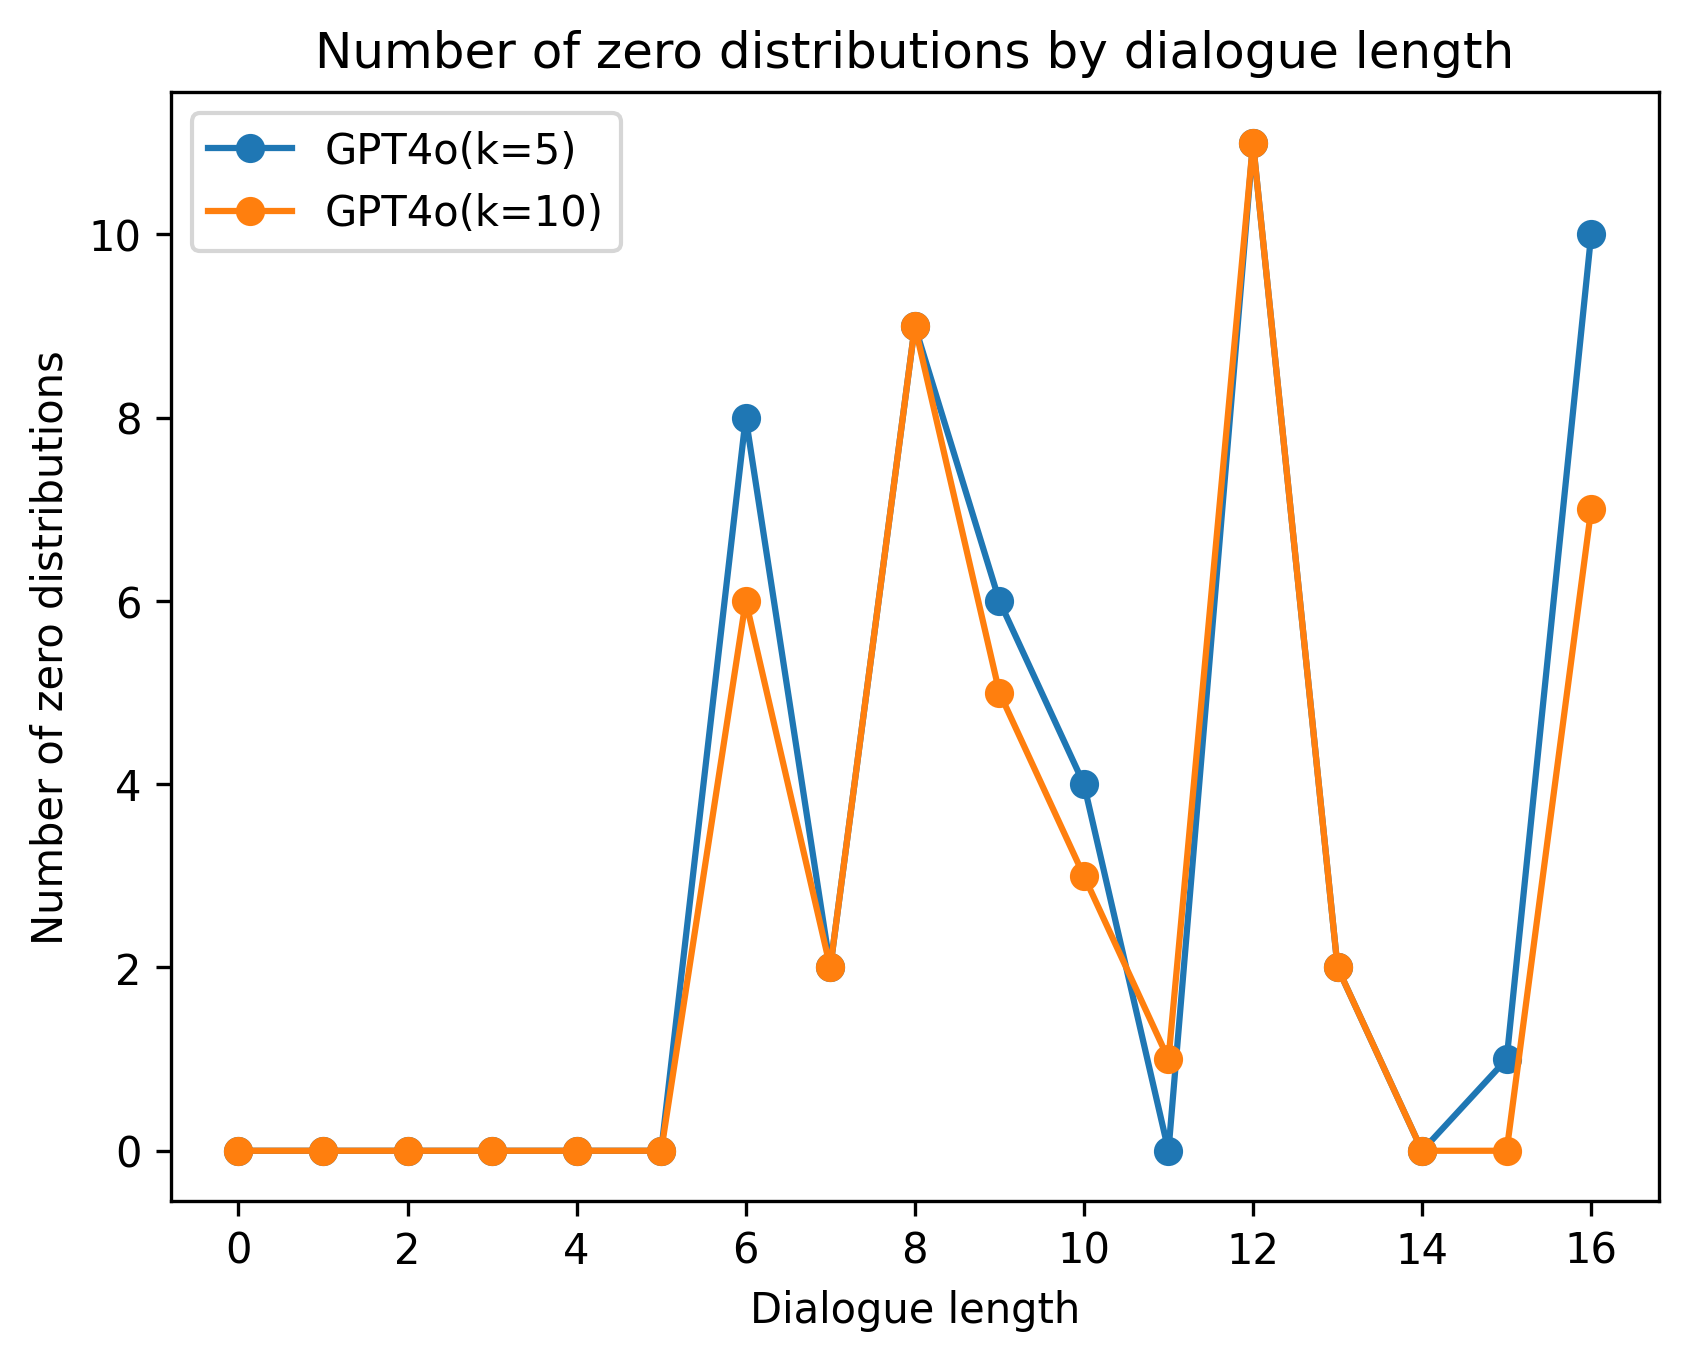

In [87]:
def apocalypse_dist_length(grouped_data):
  apocalypse_dist_by_length = []
  apocalypse_dist_by_length_norm = []
  counter = []
  for _ in range(0, max_dialogue_length, 1):
    apocalypse_dist_by_length.append(0)
    counter.append(0)
    apocalypse_dist_by_length_norm.append(0)
  
  for dialogue in grouped_data:
    dialogue_id = dialogue["dialogue_id"]
    intra_dialogues = dialogue["intra_dialogues"]
    for step in intra_dialogues:
      dist = list(step['p_distribuition'].values())
      if dist == [0, 0, 0, 0, 0, 0, 0, 0]:
        apocalypse_dist_by_length[len(intra_dialogues)-1] += 1
      counter[len(intra_dialogues)-1] += 1
      
  for i in range(len(apocalypse_dist_by_length)):
    if counter[i] != 0:
      apocalypse_dist_by_length_norm[i] = apocalypse_dist_by_length[i] / counter[i]
  print(apocalypse_dist_by_length)
  
  return apocalypse_dist_by_length, apocalypse_dist_by_length_norm

apocalypse_five_gpt4o, apocalypse_norm_five_gpt4o = apocalypse_dist_length(five_gpt4o_analyzed_data)
apocalypse_ten_gpt4o, apocalypse_norm_ten_gpt4o = apocalypse_dist_length(ten_gpt4o_analyzed_data)

plt.figure(dpi=300)
plt.plot(apocalypse_five_gpt4o, marker = 'o')
plt.plot(apocalypse_ten_gpt4o, marker = 'o')
plt.xlabel('Dialogue length')
plt.ylabel('Number of zero distributions')
plt.title('Number of zero distributions by dialogue length')
plt.legend(['GPT4o(k=5)', 'GPT4o(k=10)'])
plt.show()

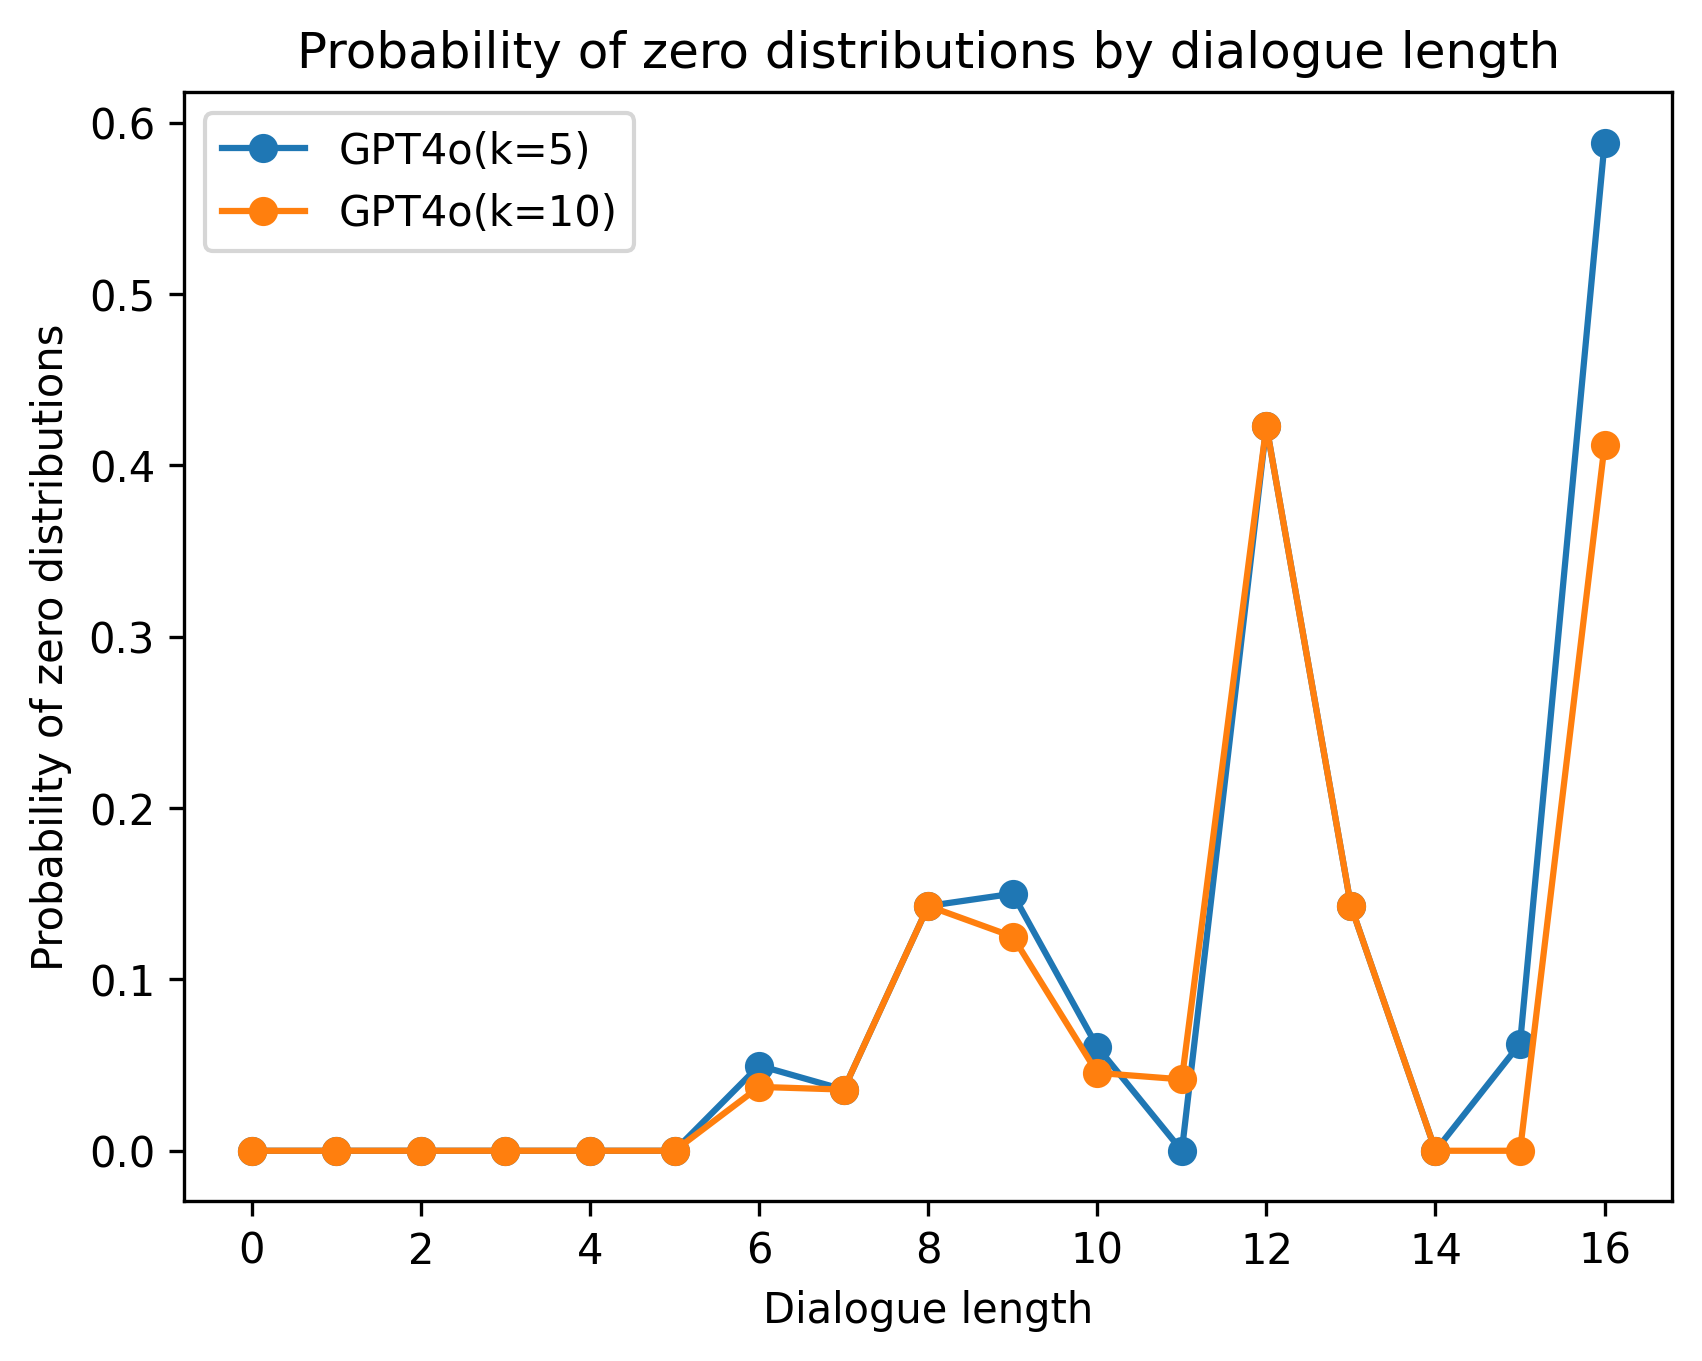

In [88]:
plt.figure(dpi=300)
plt.plot(apocalypse_norm_five_gpt4o, marker = 'o')
plt.plot(apocalypse_norm_ten_gpt4o, marker = 'o')
plt.xlabel('Dialogue length')
plt.ylabel('Probability of zero distributions')
plt.title('Probability of zero distributions by dialogue length')
plt.legend(['GPT4o(k=5)', 'GPT4o(k=10)'])
plt.show()